In [27]:
from scripts.imports import *
from scripts.show_tracks import *
from scripts.track_pairs import *
import geopandas as gpd
from shapely.geometry import Point, box as shapely_box
from scipy.optimize import least_squares
from sklearn.metrics import r2_score, mean_squared_error
from scripts.odr import *

import sys

# sys.path.insert(1,'/home/s1803229/src/PhoREAL')
sys.path.insert(1,'C:/Users/s1803229/Documents/PhoREAL')

from phoreal.reader import get_atl03_struct, get_atl08_struct

dirpath = '../data/sodankyla_cam'
all_ATL03, all_ATL08 = track_pairs(dirpath)

N = len(all_ATL03)
# print(all_ATL03[0],all_ATL08[0])
for i in range(0,1):
#     pvpg(all_ATL03[i], all_ATL08[i],i)
    atl03 = get_atl03_struct(all_ATL03[i], 'gt3r', all_ATL08[i])
    atl08 = get_atl08_struct(all_ATL08[i], 'gt3r')

# print(atl03.df.columns.values.tolist())
# print(atl08.df.columns.values.tolist())

atl08.df

asr  atlas_pa  beam_azimuth  beam_coelev  brightness_flag  \
0   0.360345  0.003437      1.491565     1.567359                0   
1   0.360345  0.003437      1.491459     1.567359                0   
2   0.360345  0.003438      1.491228     1.567359                0   
3   0.323276  0.003437      1.491404     1.567359                0   
4   0.323276  0.003437      1.491303     1.567359                0   
5   0.361272  0.003438      1.491178     1.567359                0   
6   0.361272  0.003438      1.491369     1.567359                0   
7   0.361272  0.003437      1.491422     1.567359                0   
8   0.368551  0.003438      1.491335     1.567359                0   
9   0.368551  0.003438      1.491329     1.567358                0   
10  0.368551  0.003438      1.491497     1.567358                0   
11  0.270945  0.003438      1.491359     1.567358                0   
12  0.270945  0.003438      1.491149     1.567358                0   
13  0.270945  0.003438      1.491320     1.567358                0   
14  0.298307  0.003438      1.491603     1.567358                0   
15  0.298307  0.003438      1.491619     1.567358                0   
16  0.298307  0.003438      1.491394     1.567358                0   
17  0.258416  0.003439      1.491315     1.567358                0   
18  0.258416  0.003438      1.491408     1.567358                0   
19  0.258416  0.003438      1.491456     1.567359                0   
20  0.275452  0.003438      1.491321     1.567358                0   
21  0.220065  0.003438      1.491248     1.567358                0   
22  0.220065  0.003438      1.491276     1.567358                0   
23  0.220065  0.003439      1.491255     1.567358                0   
24  0.220065  0.003439      1.491091     1.567358                0   
25  0.272843  0.003438      1.490998     1.567358                0   
26  0.272843  0.003438      1.491098     1.567358                0   
27  0.272843  0.003439      1.491234     1.567358                0   
28  0.279285  0.003438      1.491354     1.567358                0   
29  0.279285  0.003438      1.491292     1.567358                0   
30  0.279285  0.003439      1.491056     1.567358                0   
31  0.259858  0.003439      1.491225     1.567358                0   

       can_noise  canopy_h_metrics_0  canopy_h_metrics_1  canopy_h_metrics_2  \
0   3.402823e+38        3.402823e+38        3.402823e+38        3.402823e+38   
1   7.731801e-02        5.695496e-01        5.798340e-01        6.049194e-01   
2   7.529623e-02        9.877014e-01        2.119308e+00        2.507477e+00   
3   9.626171e-02        7.160645e-01        3.072678e+00        3.090485e+00   
4   6.420947e-02        1.874115e+00        2.358536e+00        2.813141e+00   
5   4.768692e-02        2.183701e+00        2.183701e+00        2.186661e+00   
6   3.402823e+38        3.402823e+38        3.402823e+38        3.402823e+38   
7   3.402823e+38        3.402823e+38        3.402823e+38        3.402823e+38   
8   1.134089e-01        2.710678e+00        2.907730e+00        2.907730e+00   
9   8.031856e-02        2.851868e+00        3.871201e+00        5.622528e+00   
10  6.185706e-02        1.728943e+00        1.945496e+00        6.077728e+00   
11  3.030609e-02        1.424789e+00        2.234909e+00        2.576843e+00   
12  3.402823e+38        3.402823e+38        3.402823e+38        3.402823e+38   
13  3.402823e+38        3.402823e+38        3.402823e+38        3.402823e+38   
14  3.402823e+38        3.402823e+38        3.402823e+38        3.402823e+38   
15  3.402823e+38        3.402823e+38        3.402823e+38        3.402823e+38   
16  3.402823e+38        3.402823e+38        3.402823e+38        3.402823e+38   
17  1.025817e-01        6.209869e-01        6.820221e-01        7.029266e-01   
18  3.402823e+38        3.402823e+38        3.402823e+38        3.402823e+38   
19  3.402823e+38        3.402823e+38        3.402823e+38        3.402823e+38   
20  3.402823e+38  

# Rebinning

In [1]:
# Import packages
import os
import numpy as np
import scipy.io as sio
import pandas as pd
import random
import sys

# Read specific packages from PhoREAL
sys.path.insert(1,'/home/s1803229/src/PhoREAL')
from phoreal.reader import get_atl03_struct
from phoreal.reader import get_atl08_struct
from phoreal.reader import get_atl_alongtrack
from phoreal.binner import rebin_atl08
# from phoreal.binner import rebin_truth
# from phoreal.binner import match_truth_fields
# from phoreal.io import getTruthFilePaths, getTruthHeaders
# from phoreal.reference import reprojectHeaderData
# from phoreal.reference import findMatchingTruthFiles
# from phoreal.reference import loadLasFile
# from phoreal.reference import make_buffer
# from phoreal.ace import ace
# from phoreal.CalVal import perfect_classifier
# from phoreal.getMeasurementError import getMeasurementError

In [7]:
from scripts.parallel_blocks import *

# dirpath = 'R:/data/sodankyla_full/'
dirpath = '../data_store/data/sodankyla_full/'

# data = []

all_ATL03, all_ATL08 = track_pairs(dirpath)
N = len(all_ATL03)

coords = (26.634154, 67.361833)
i = 9

atl03 = get_atl03_struct(all_ATL03[i], 'gt1r', all_ATL08[i])
atl08 = get_atl08_struct(all_ATL08[i], 'gt1r', atl03)
# print(atl08.df)

res_field = 'alongtrack'
res = 30
atl08_bin = rebin_atl08(atl03, atl08, 'gt3r', res, res_field)

atl08_bin#.columns.values

KeyError: 'classification'

Beam 2, box 60 in file 9 has insufficient data.
Beam 2, box 122 in file 9 has insufficient data.
Beam 3, box 224 in file 9 has insufficient data.
Beam 4, box 36 in file 9 has insufficient data.
Beam 4, box 99 in file 9 has insufficient data.
Beam 4, box 161 in file 9 has insufficient data.
Beam 5, box 284 in file 9 has insufficient data.
Beam 5, box 304 in file 9 has insufficient data.
Beam 6, box 96 in file 9 has insufficient data.


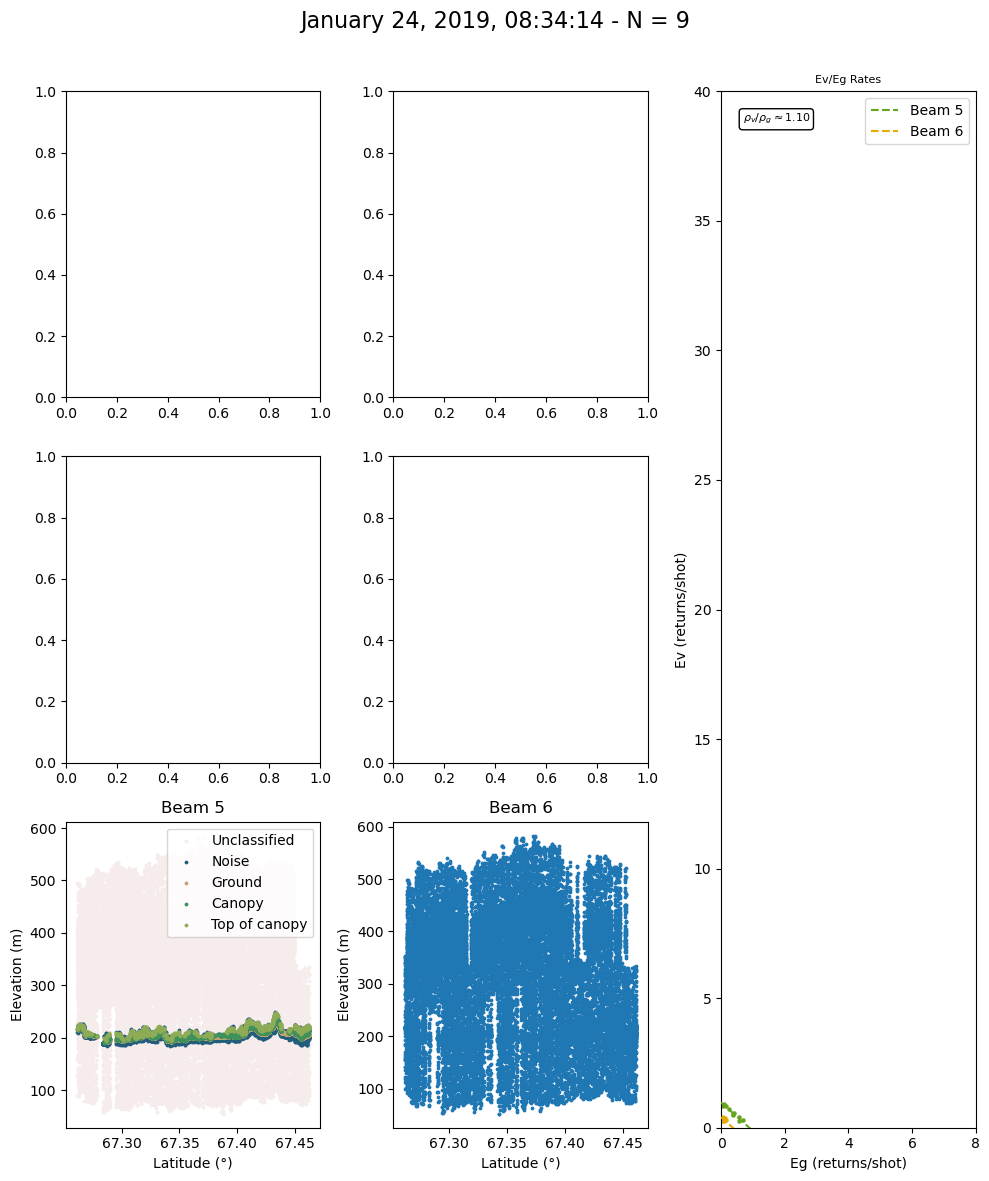

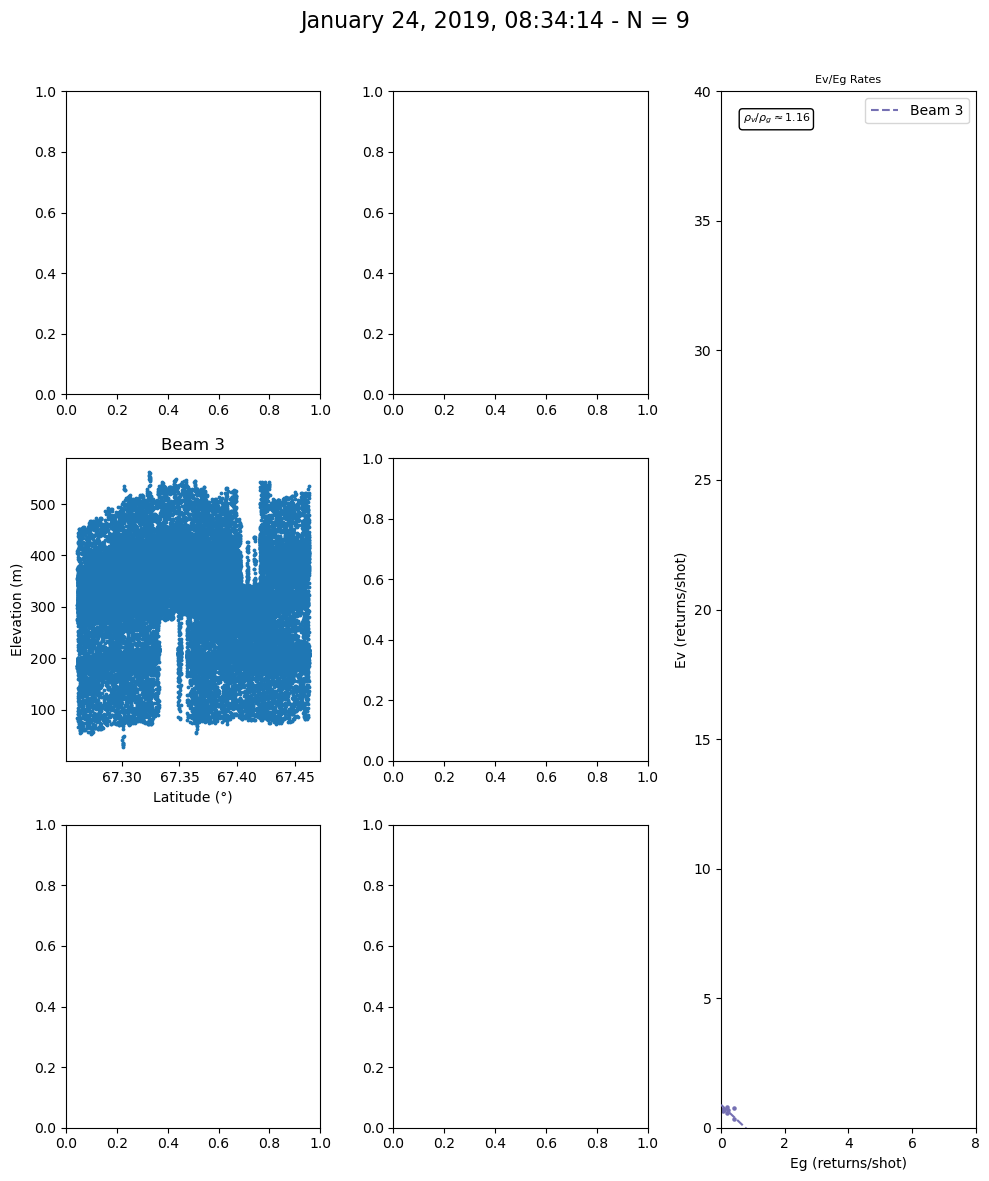

/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


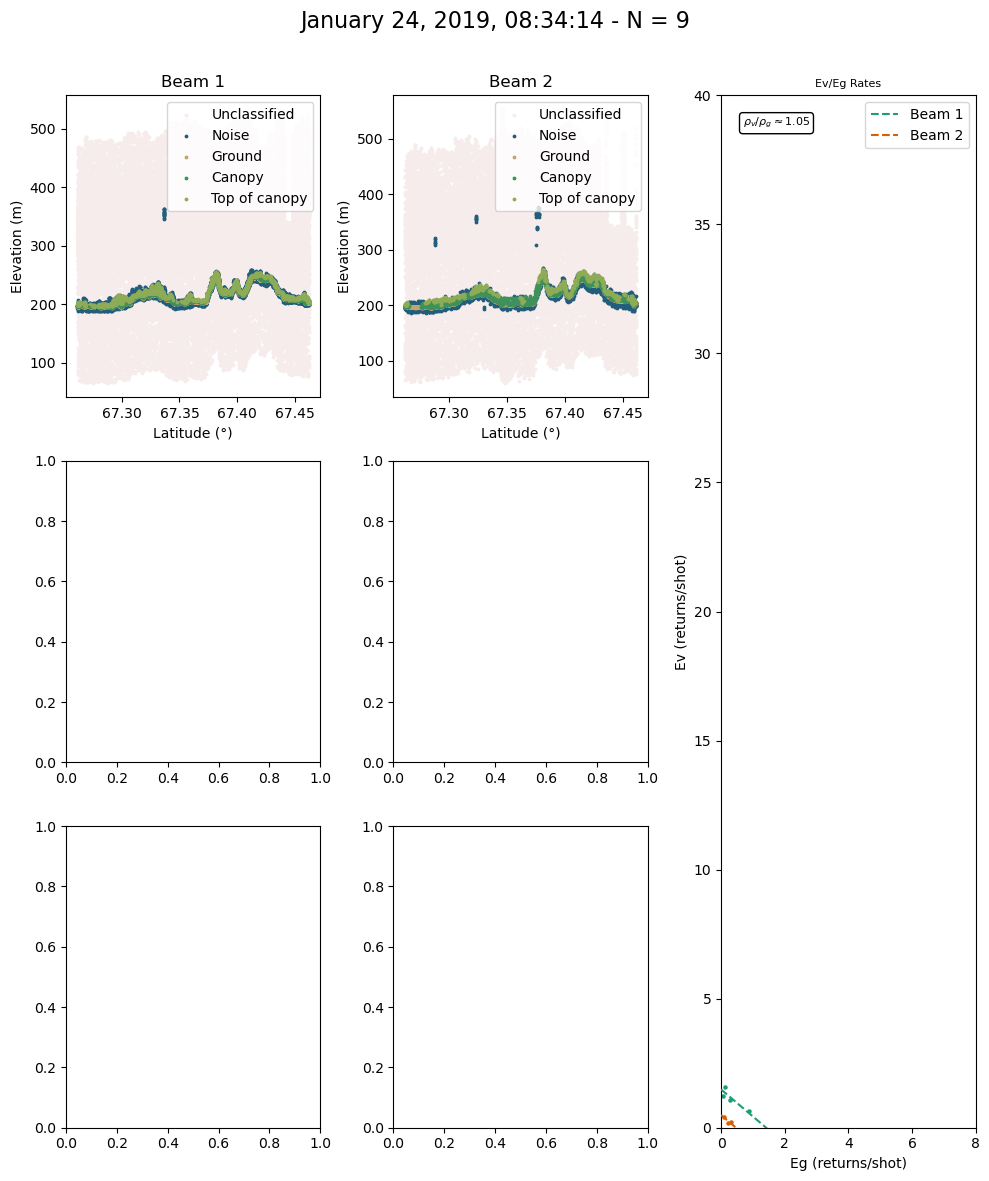

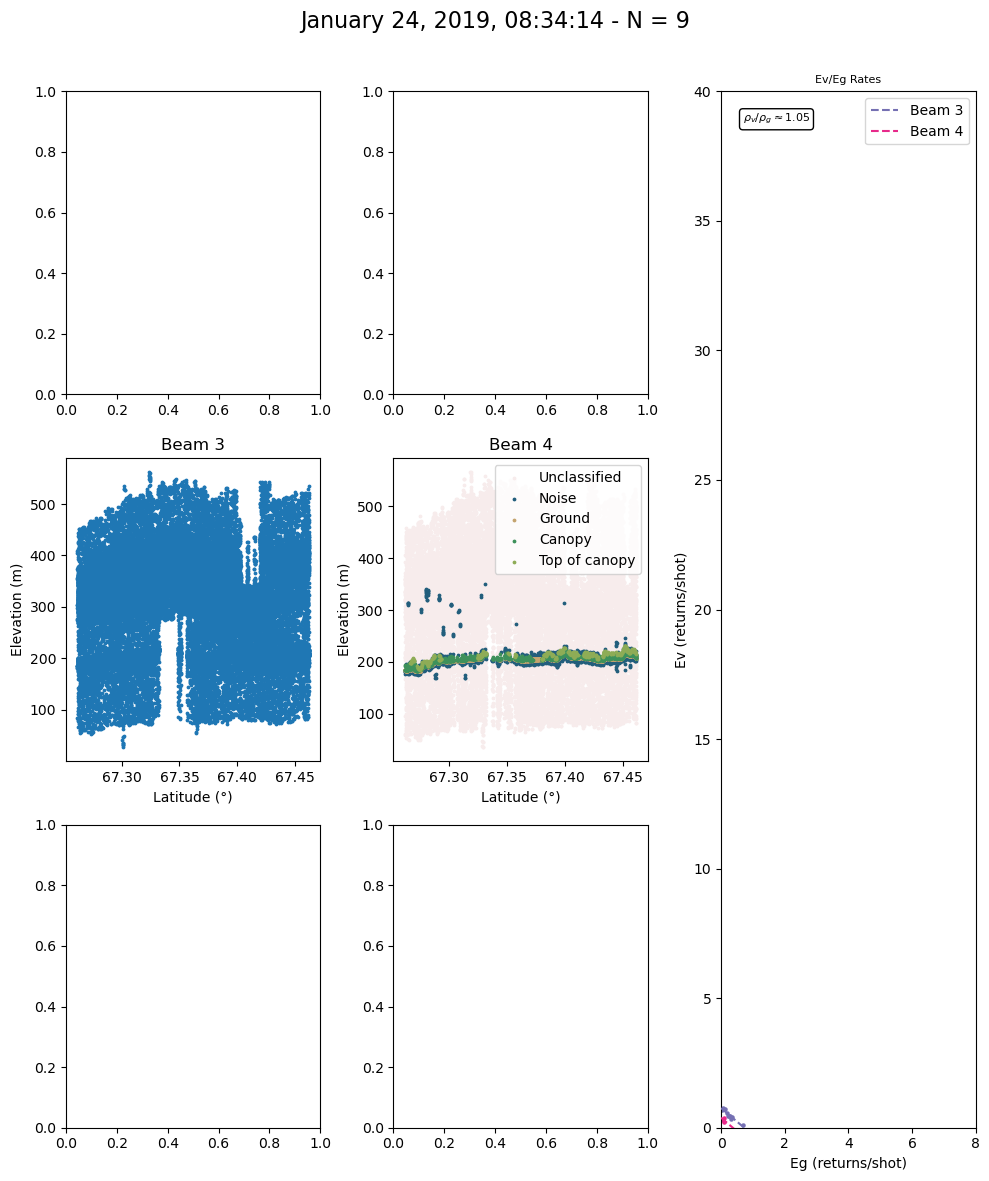

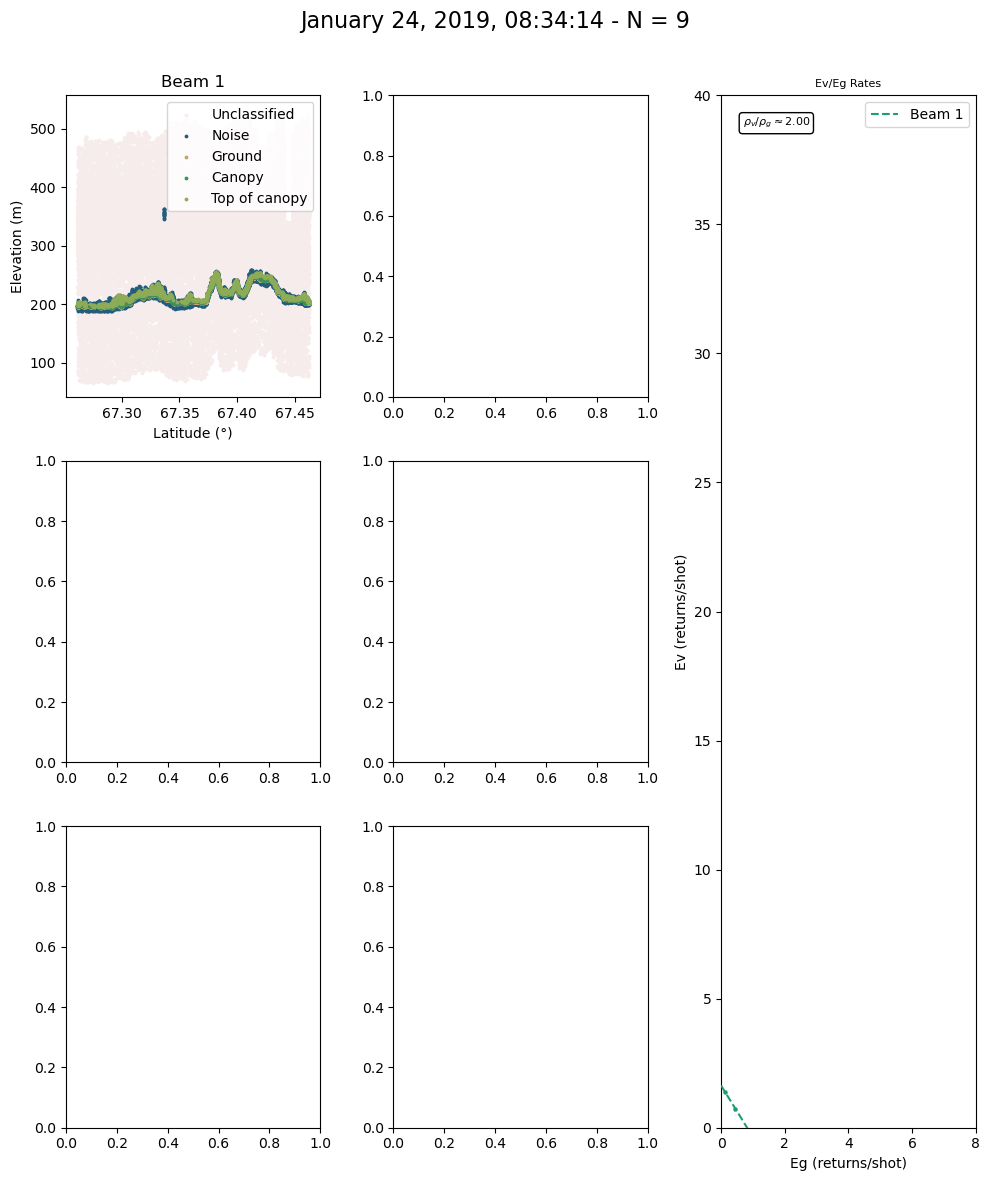

/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


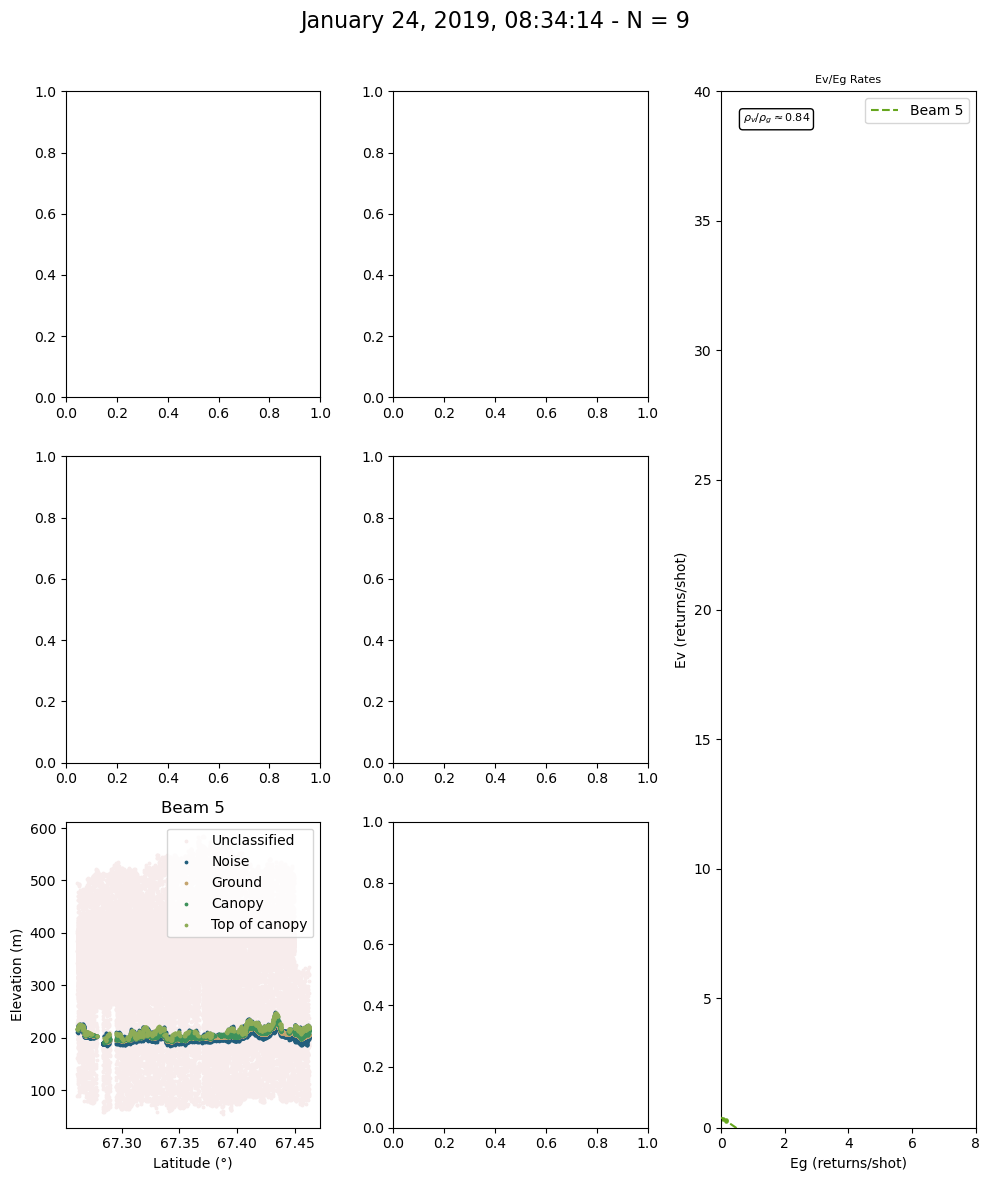

/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


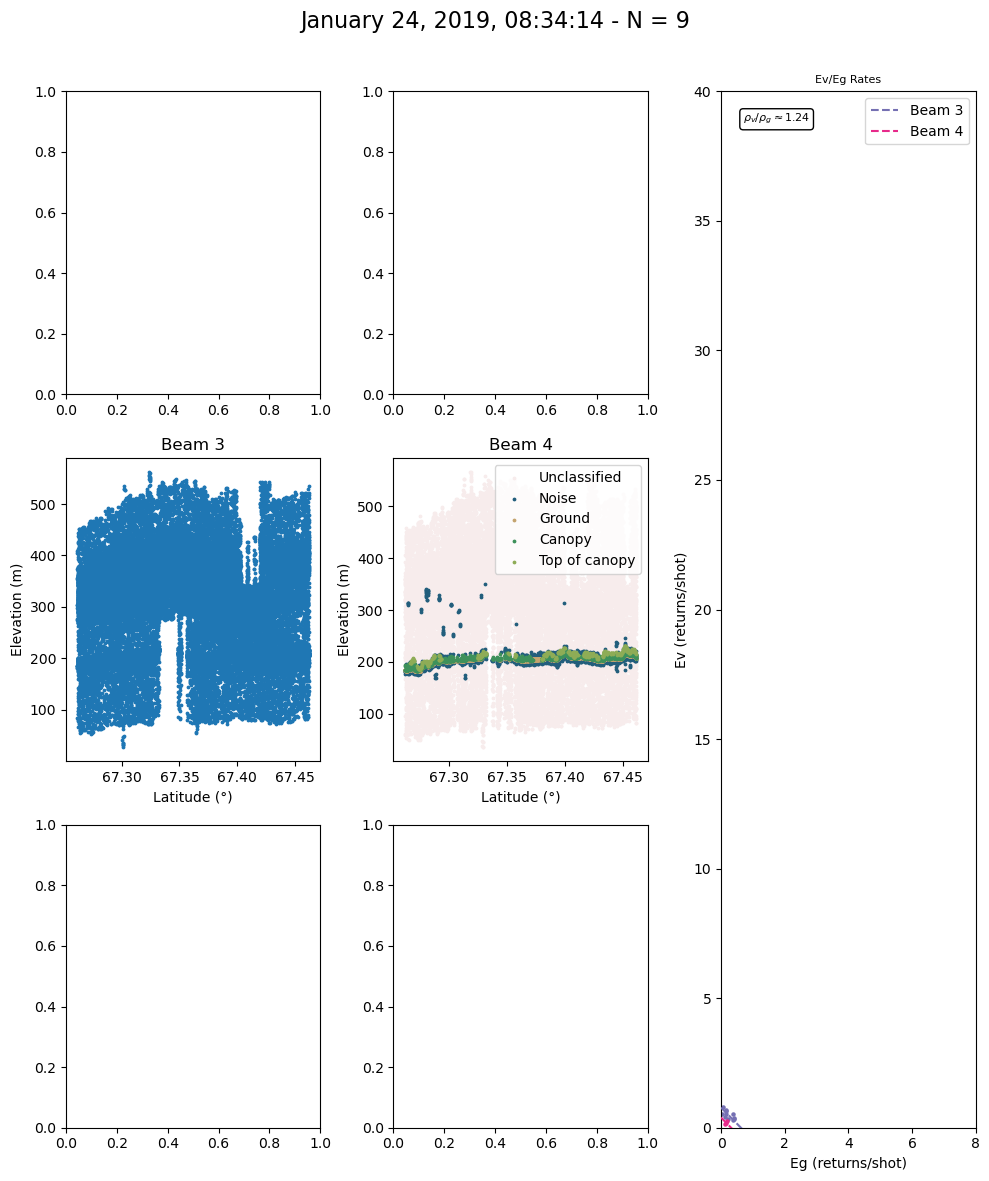

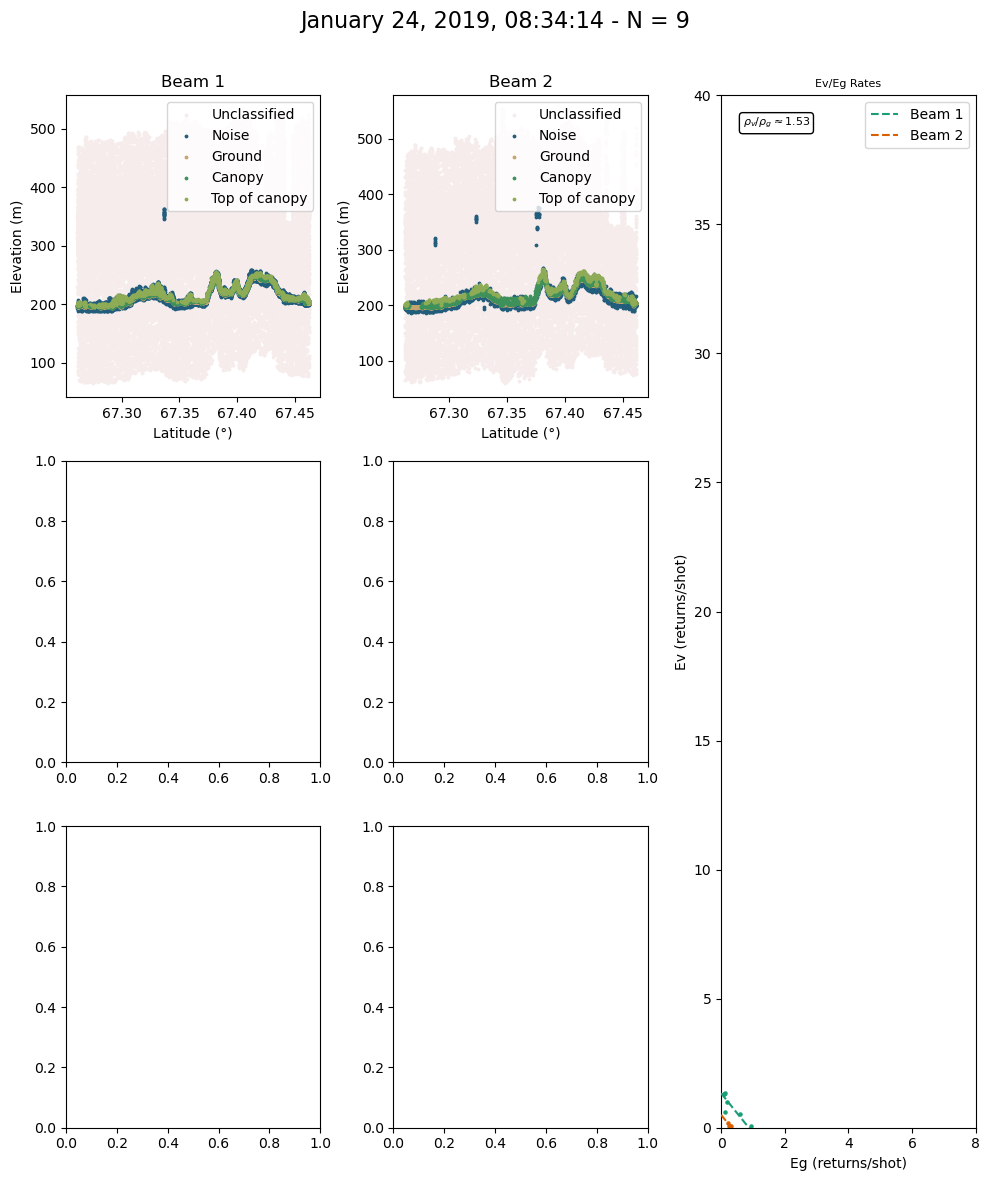

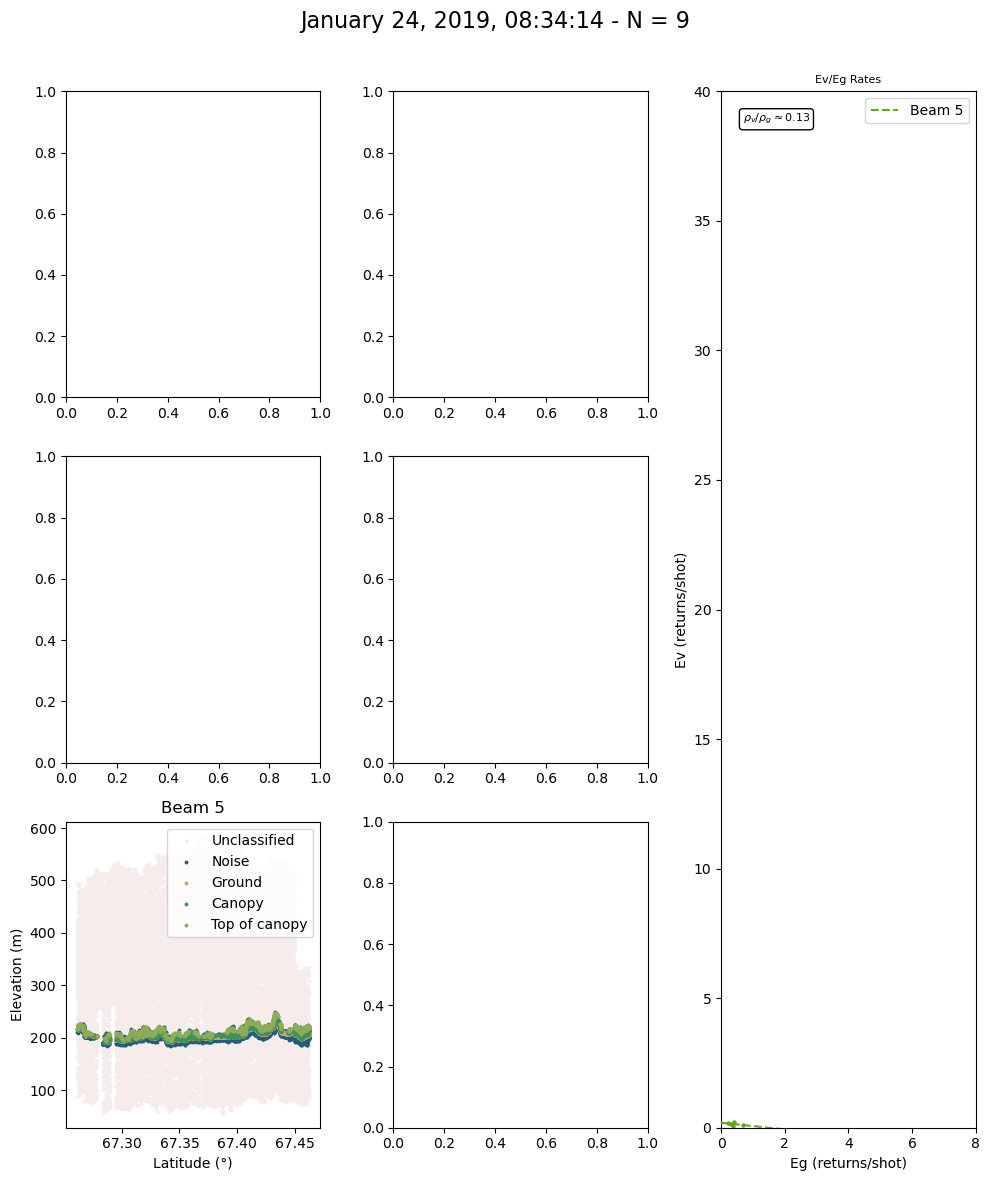

/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


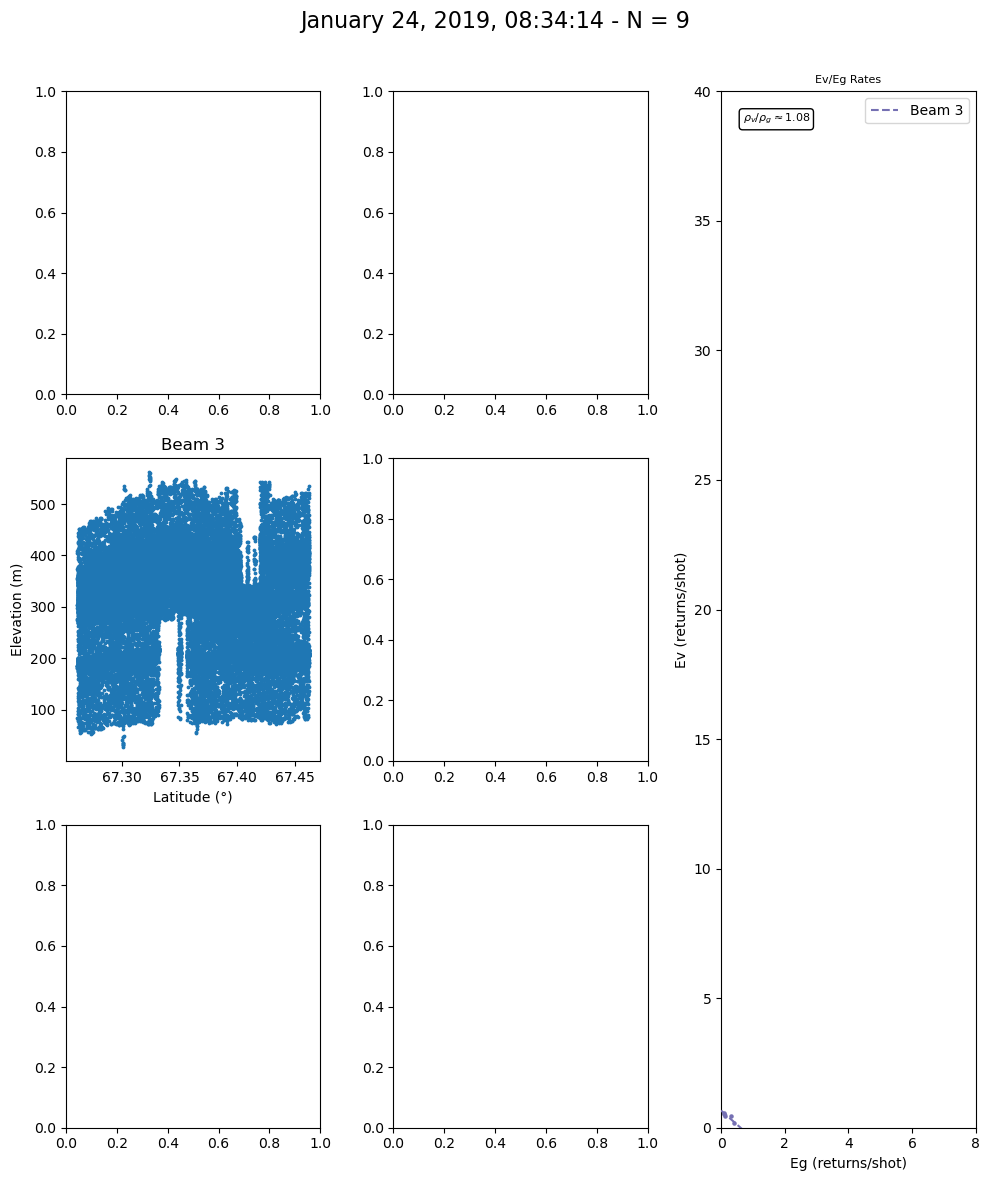

/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


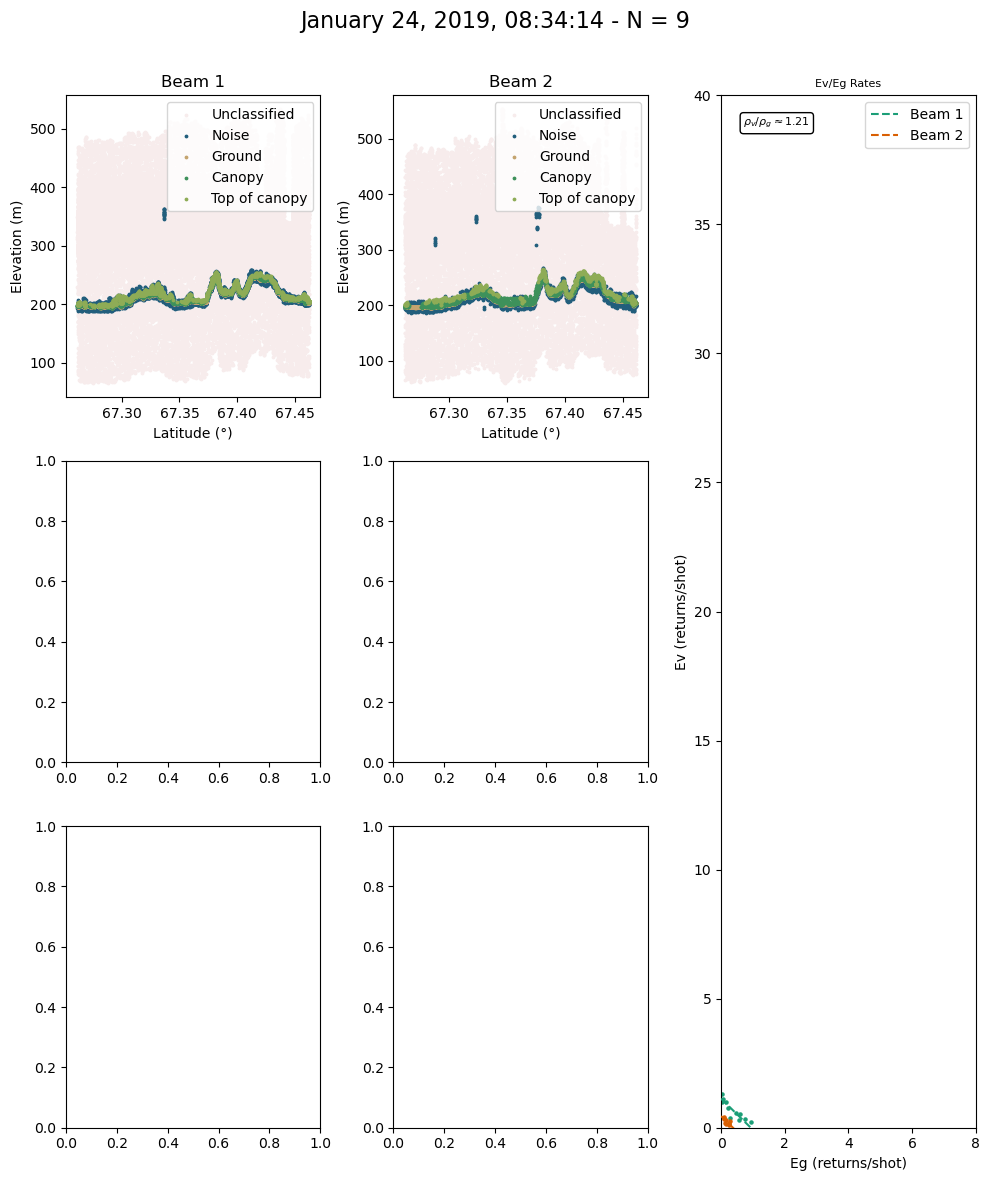

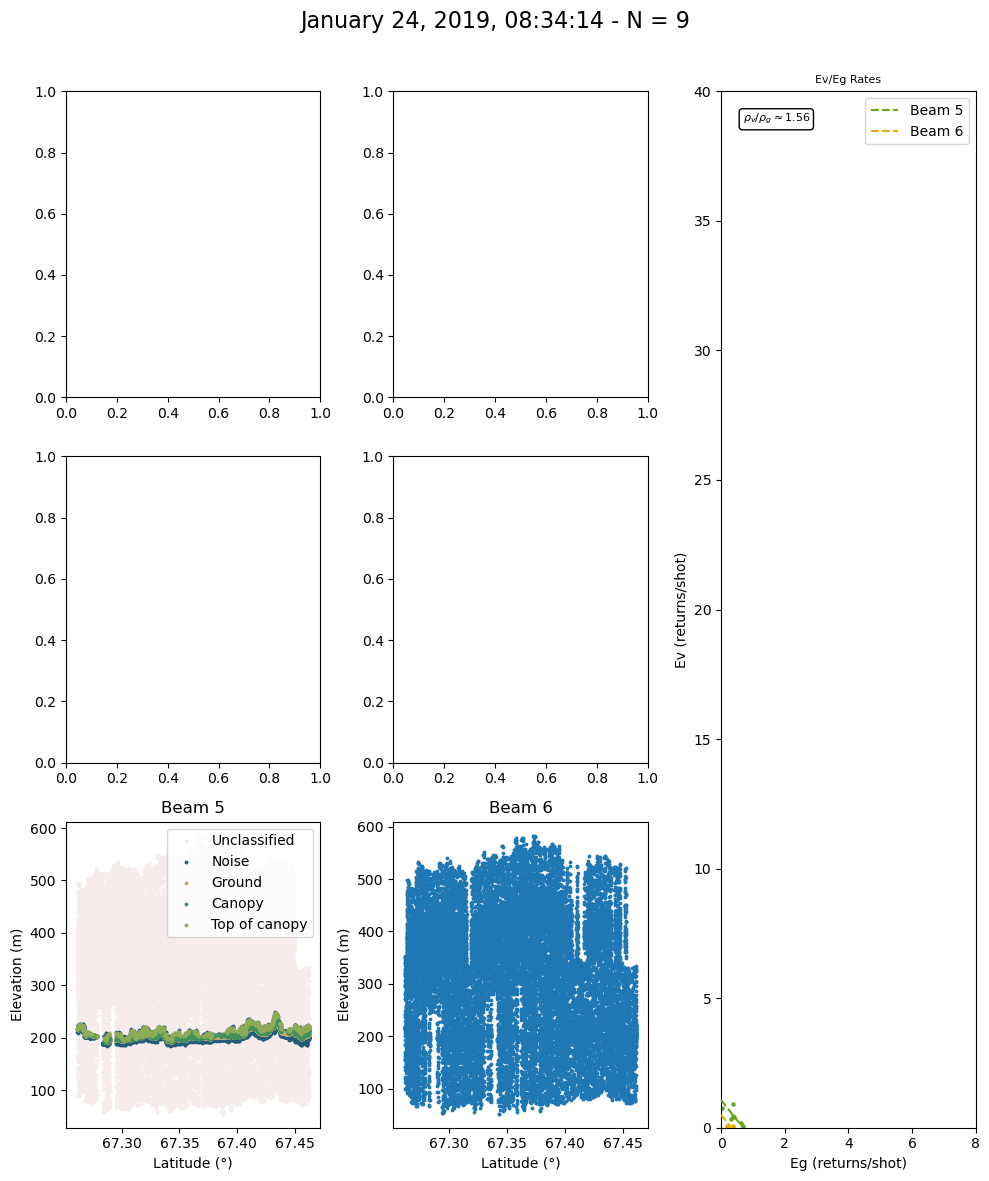

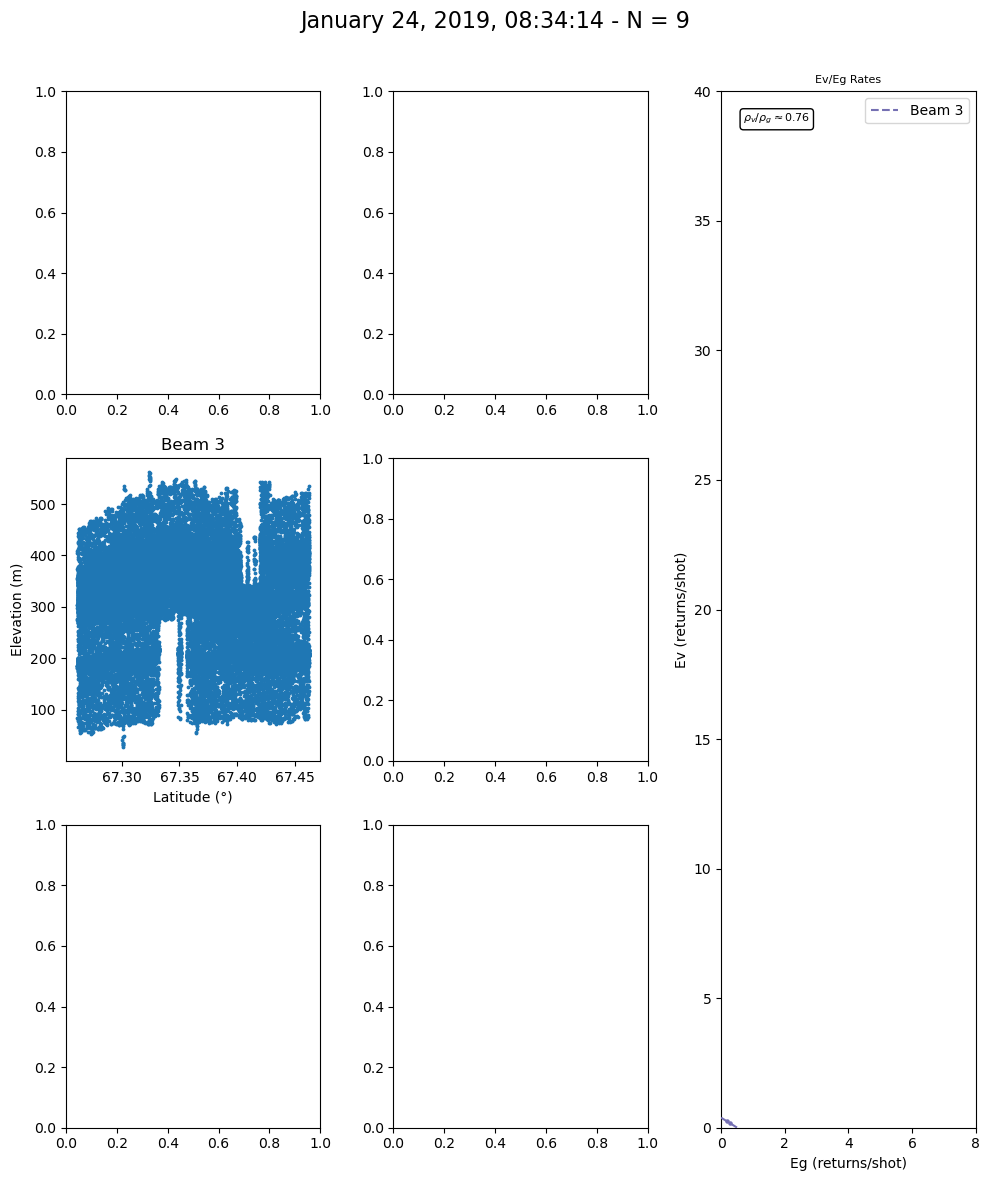

/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


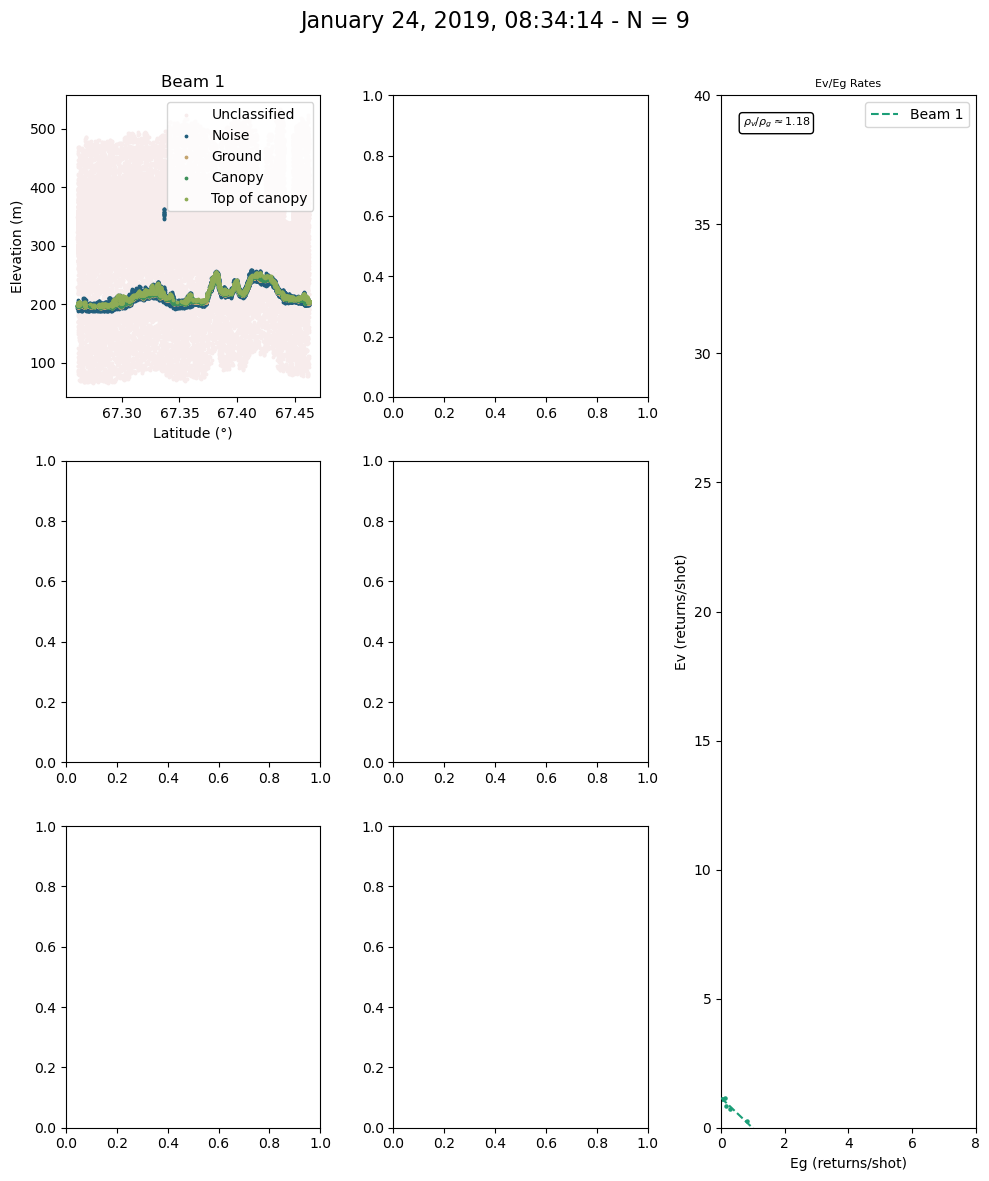

/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


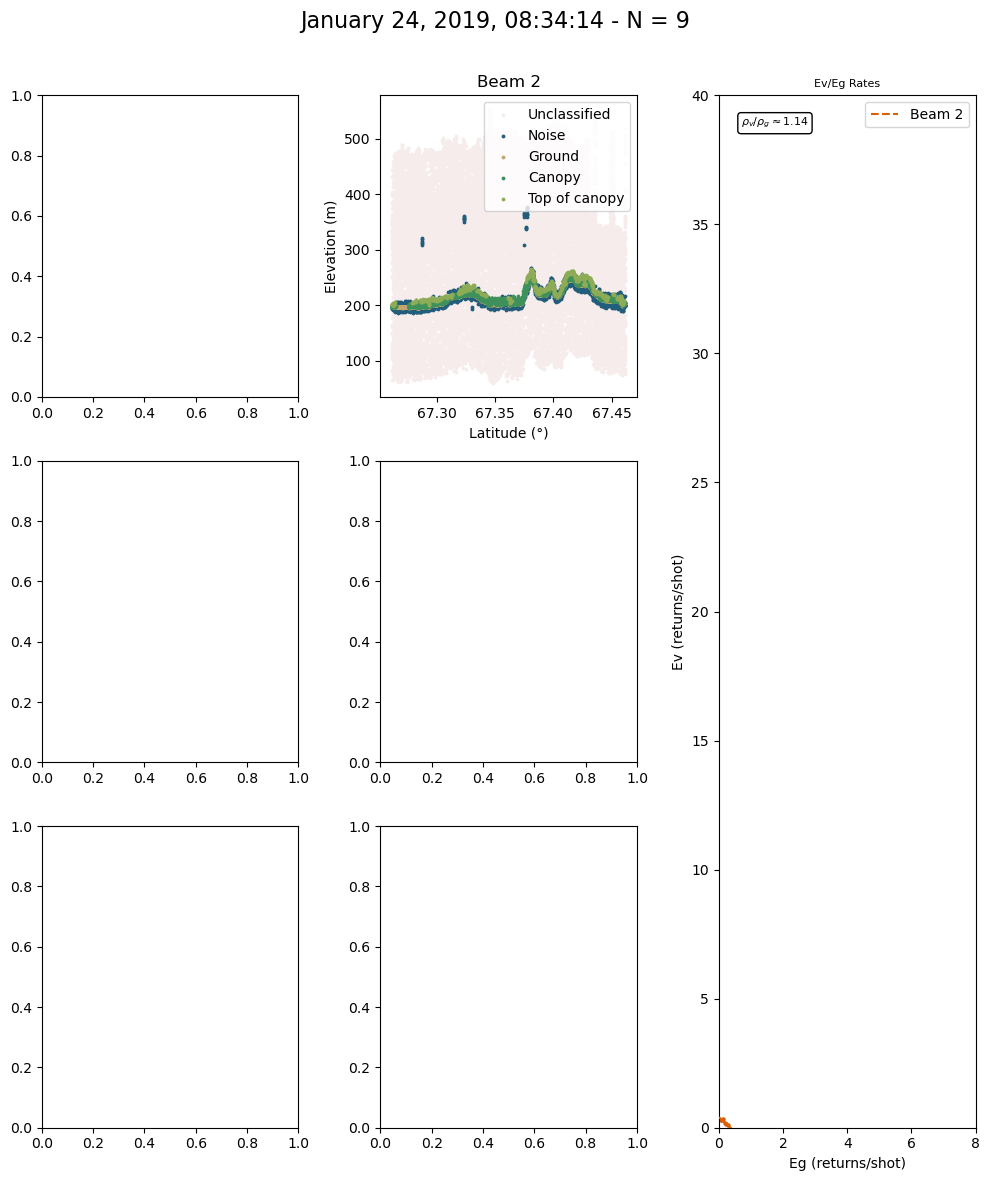

/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


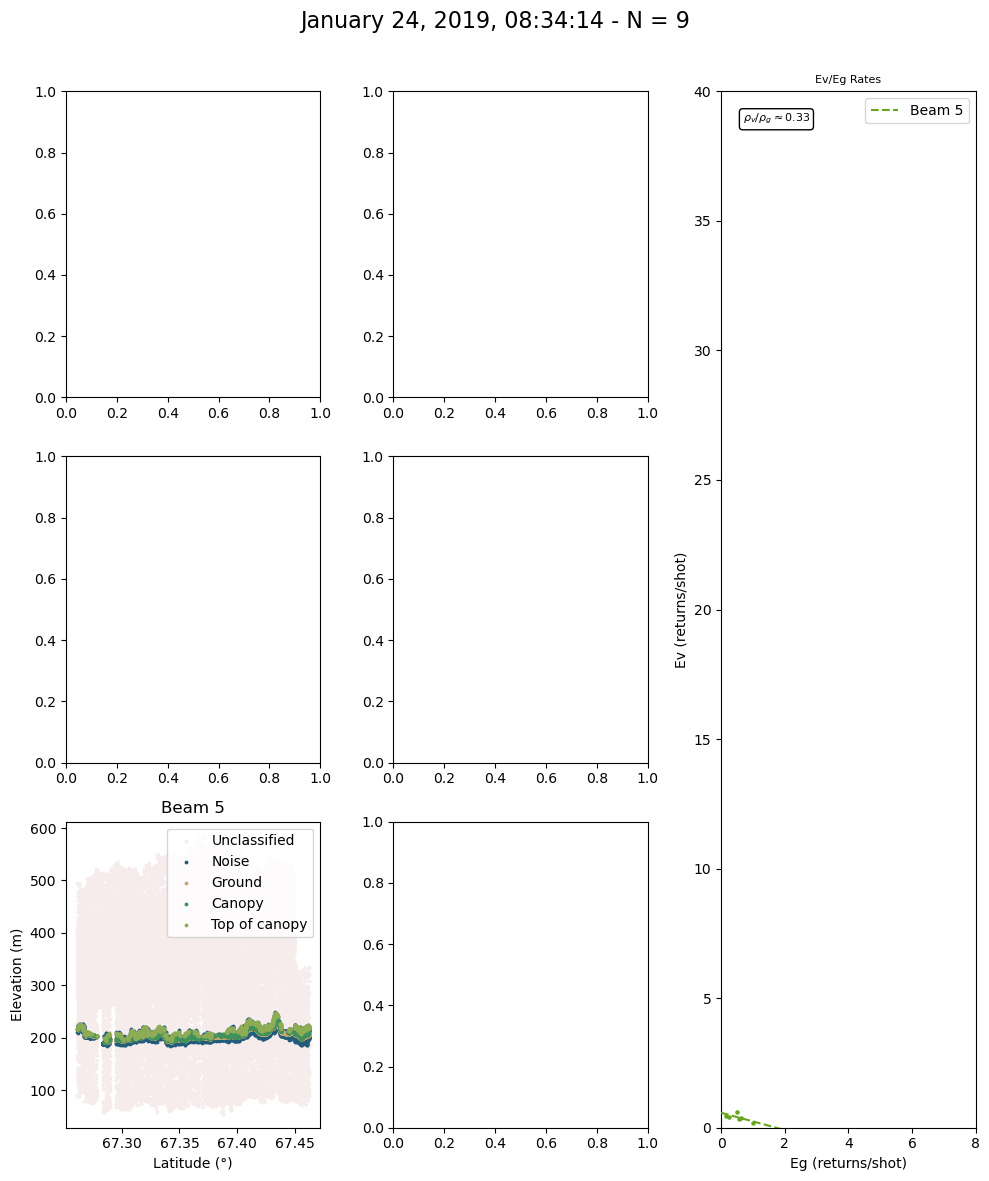

/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


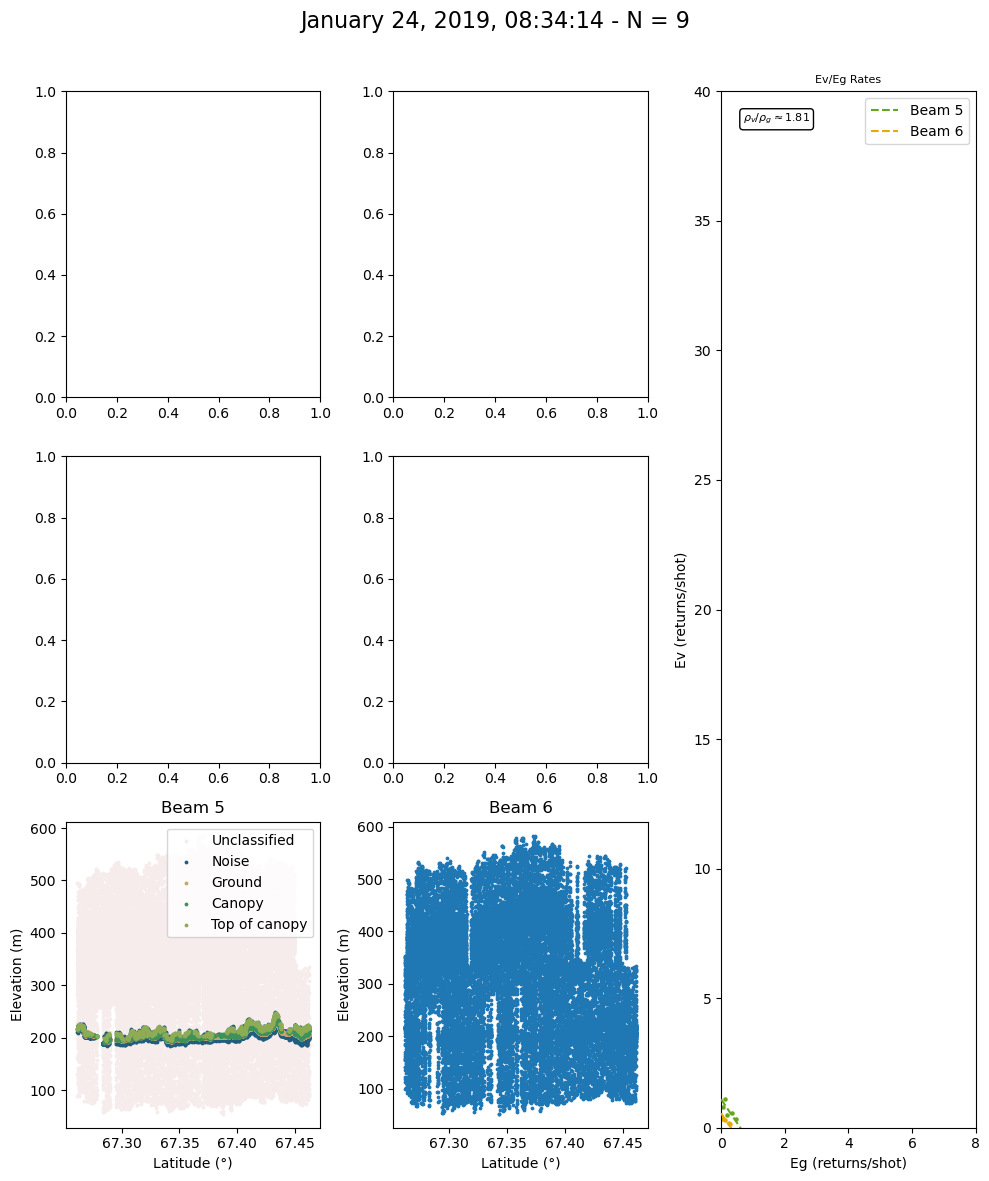

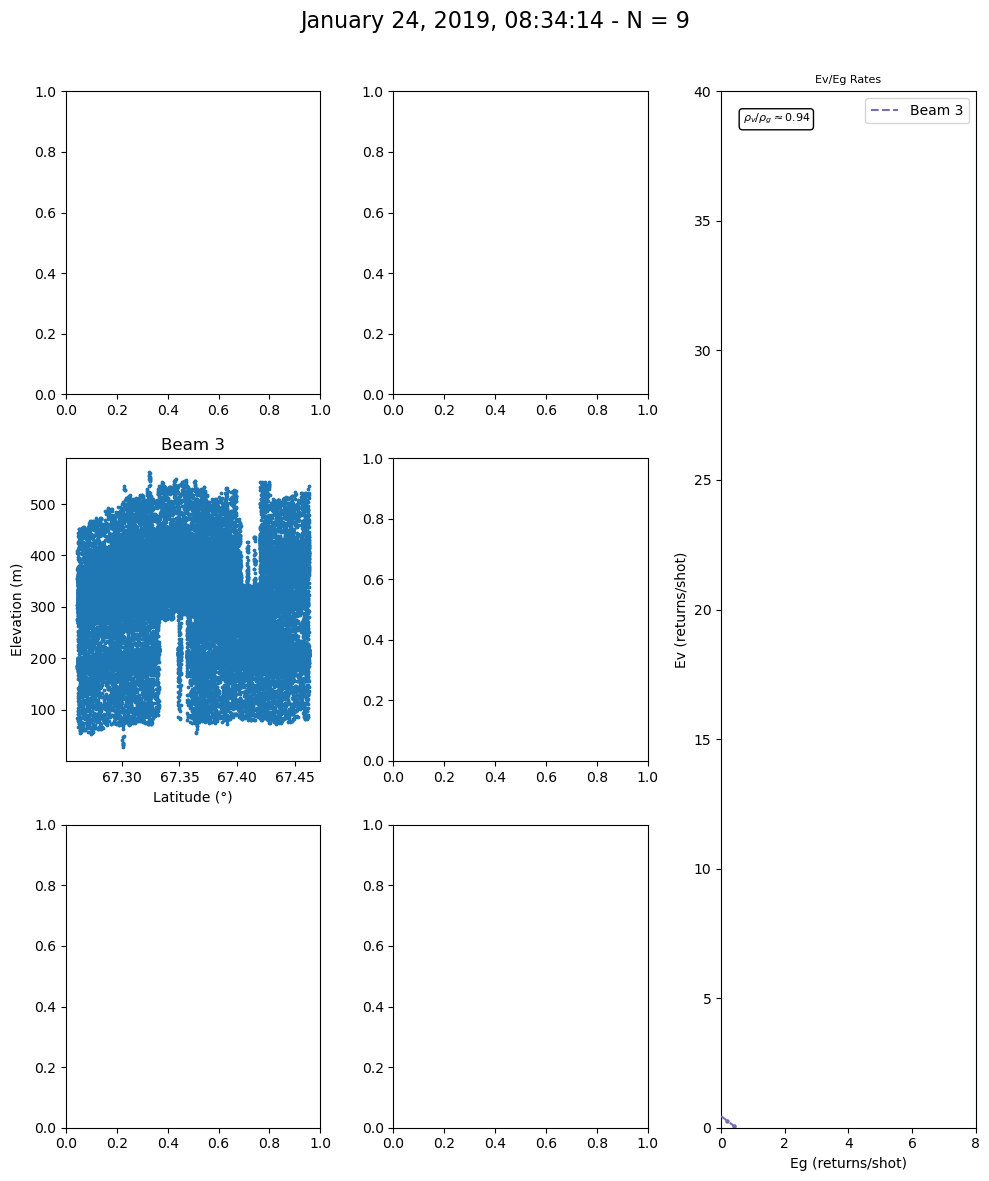

/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


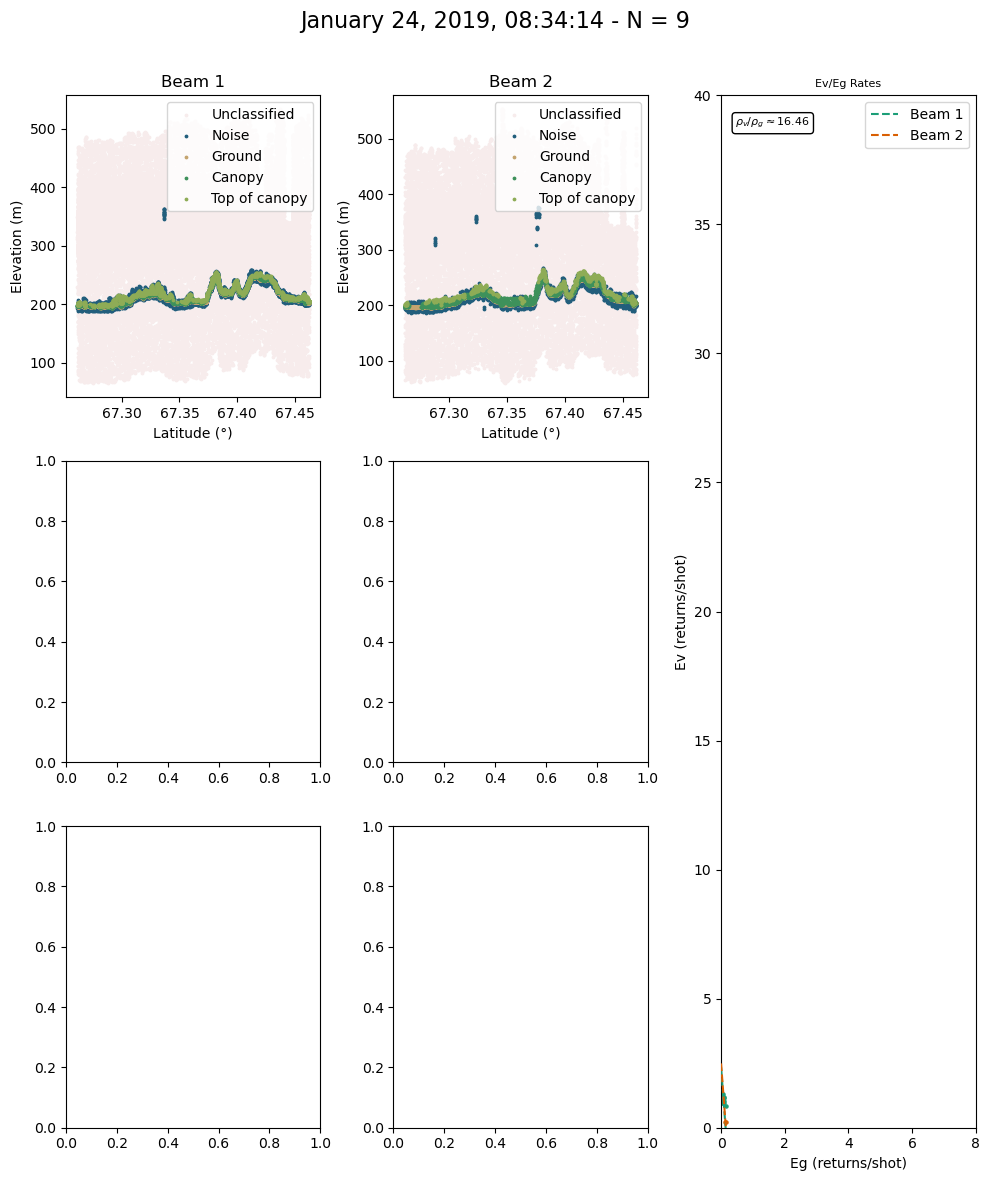

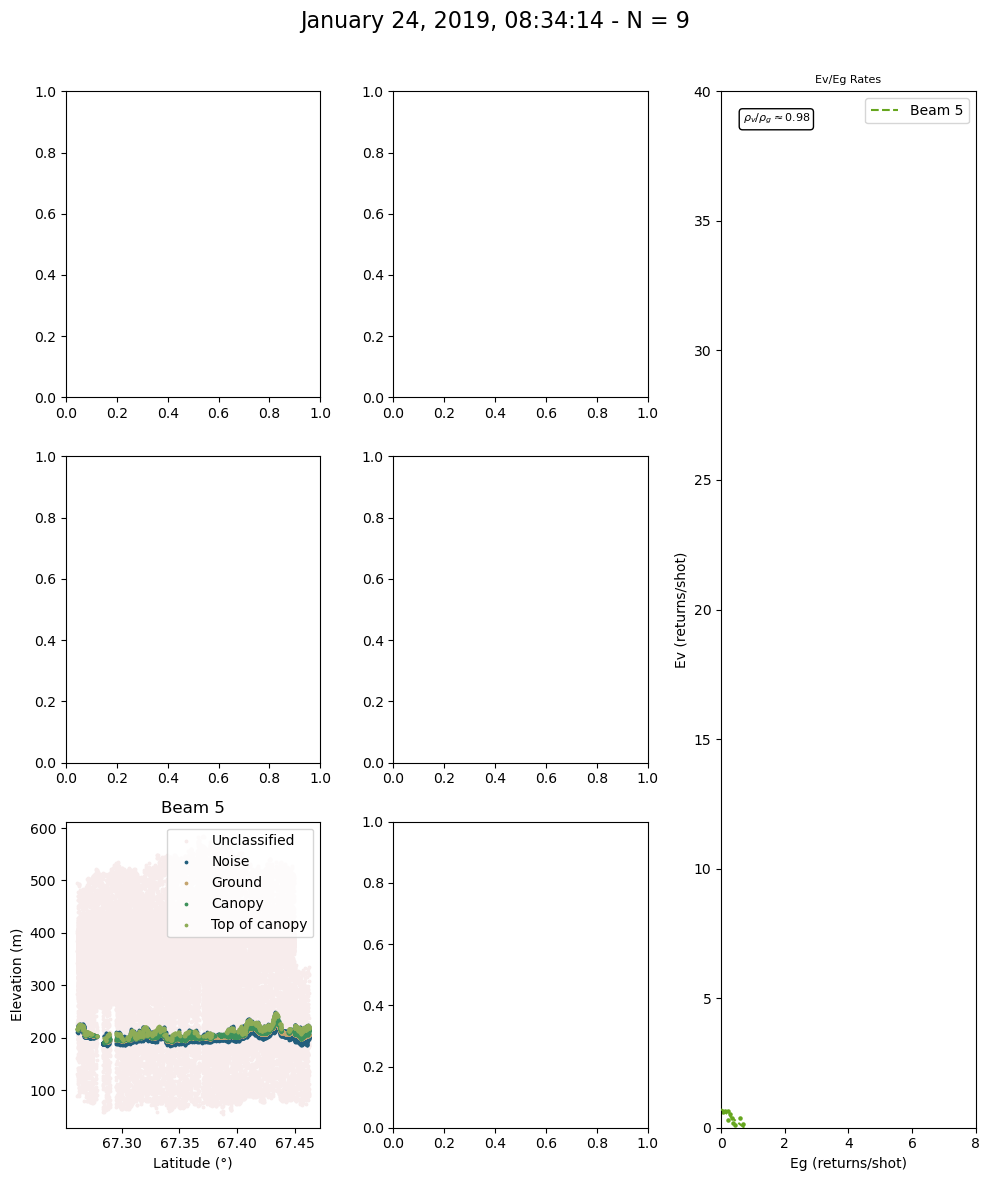

/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


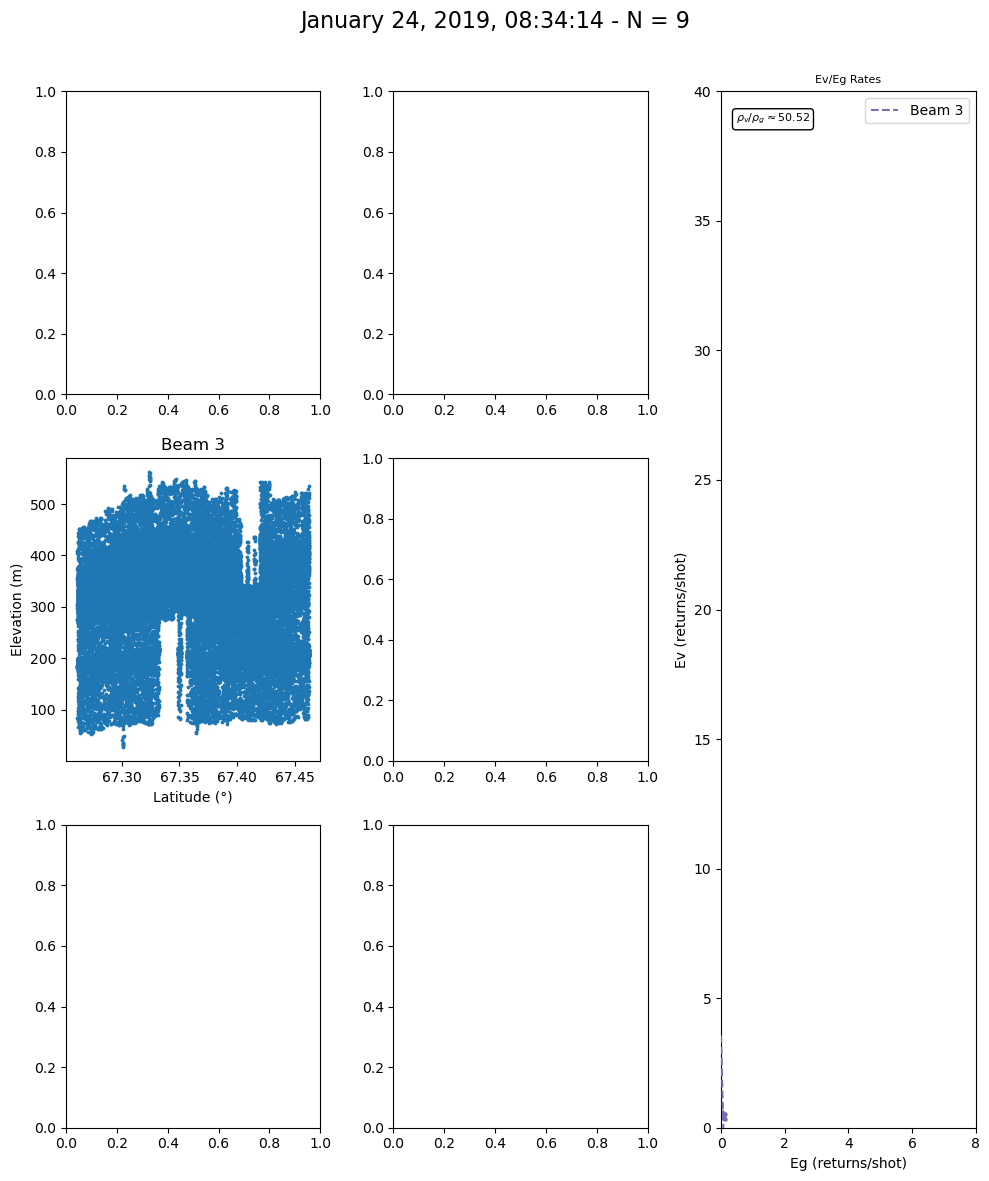

/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


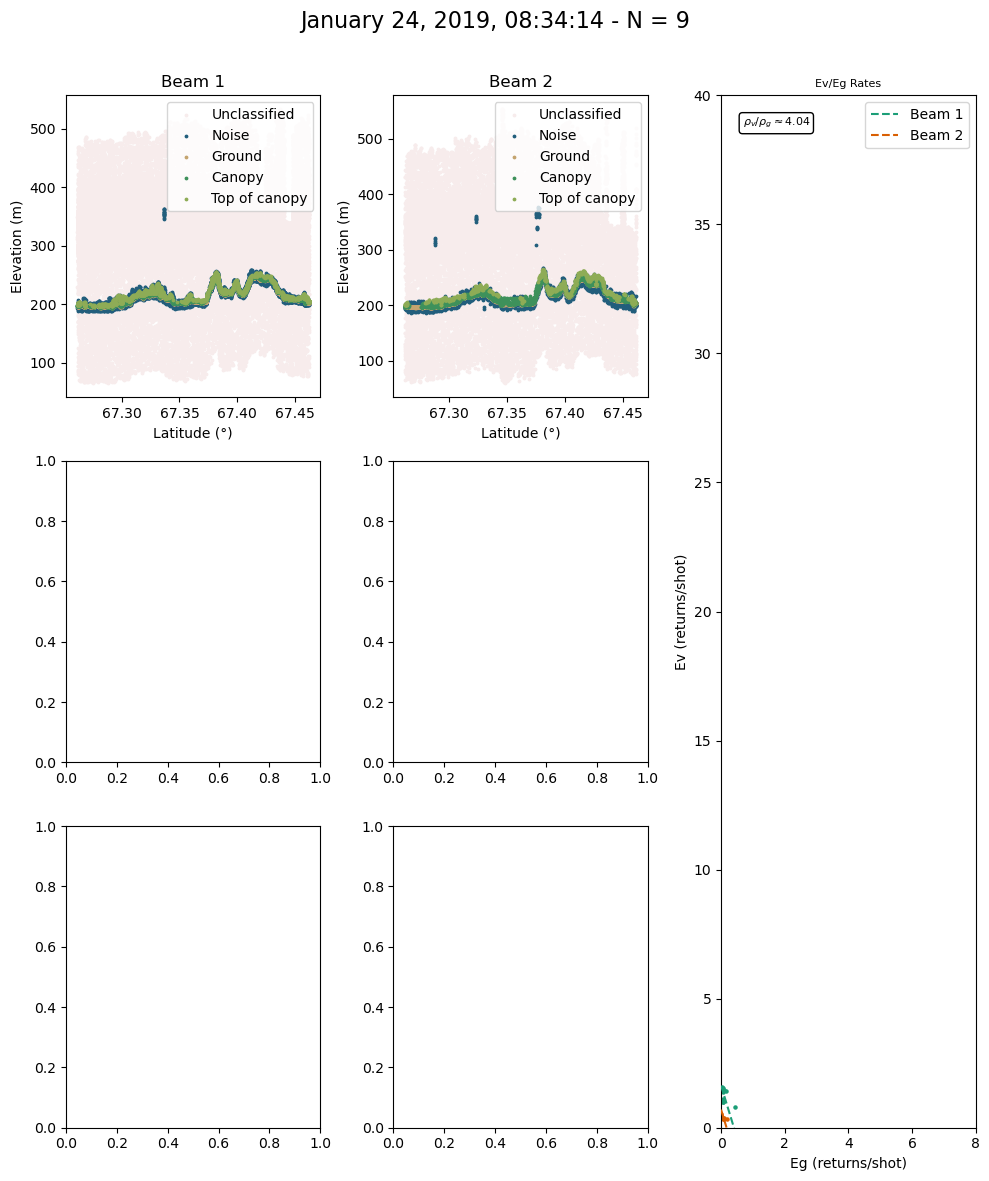

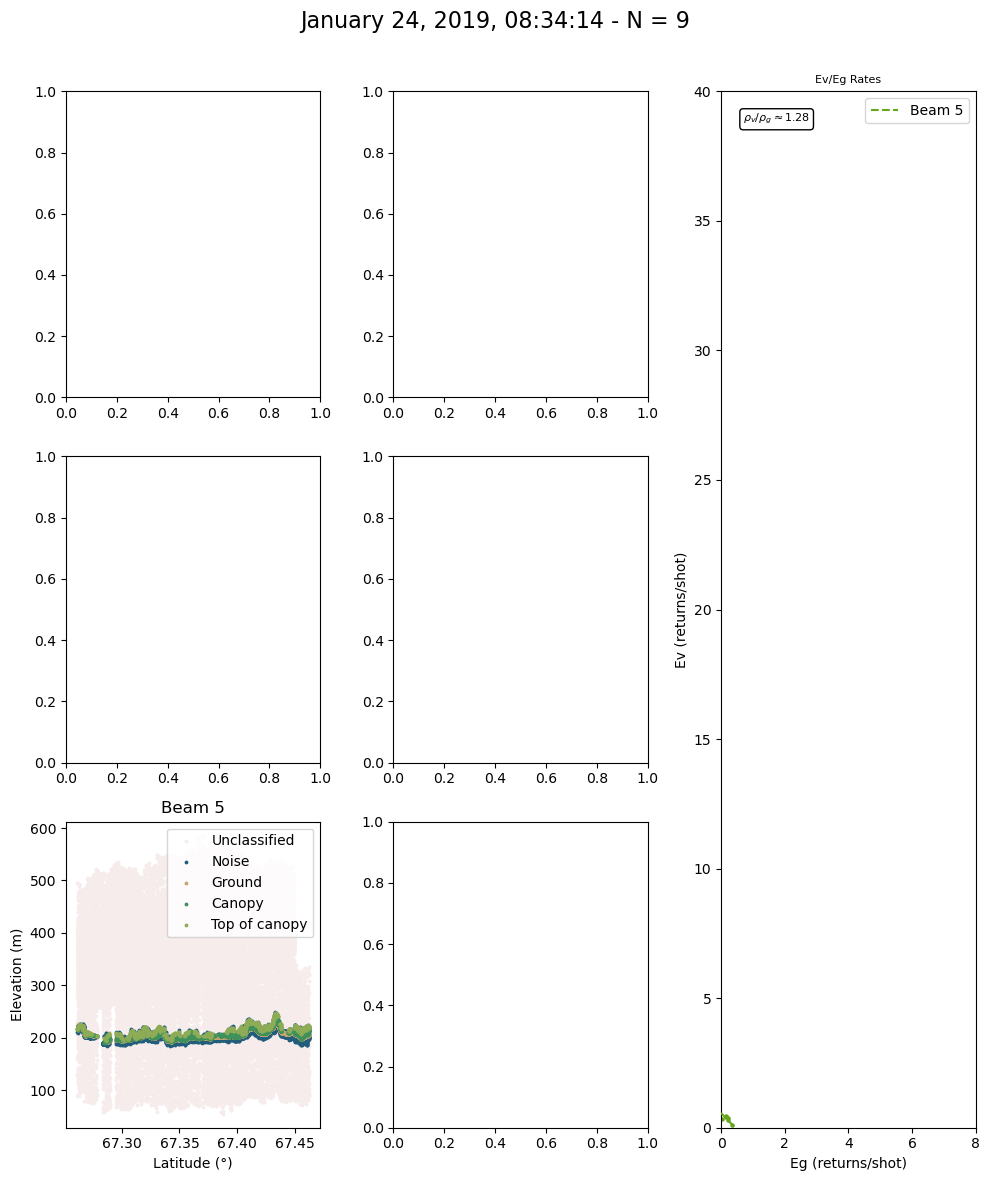

/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


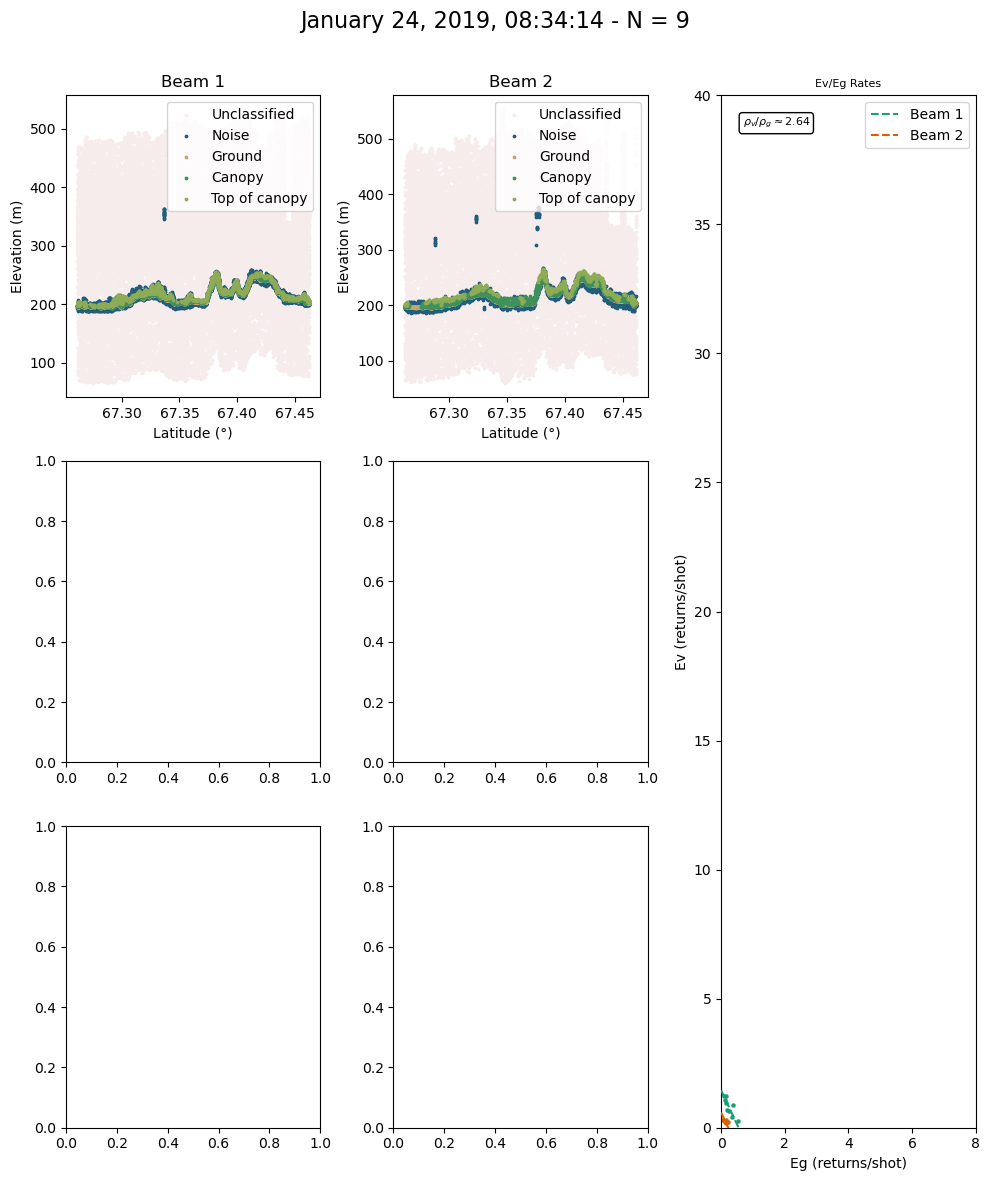

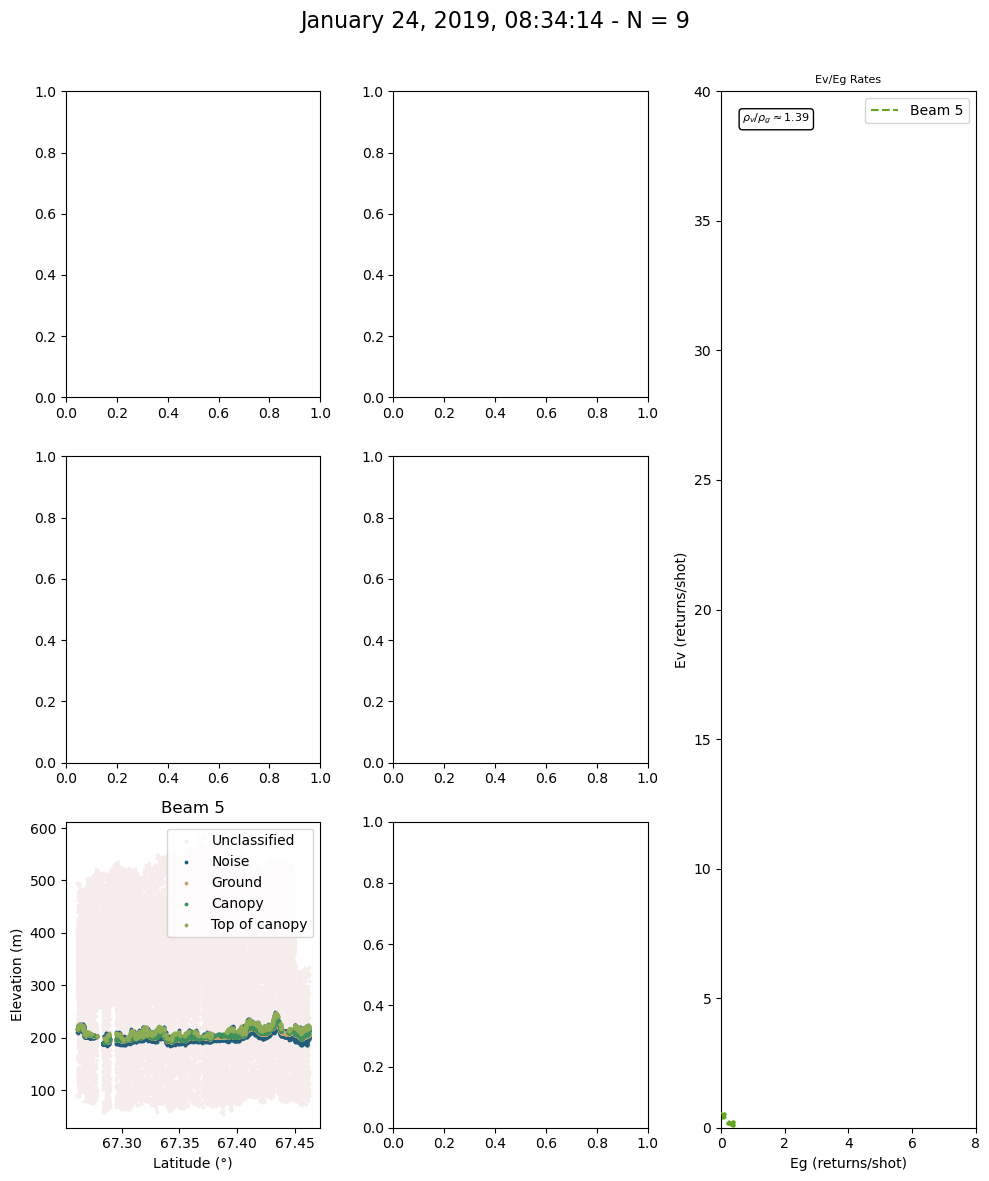

/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


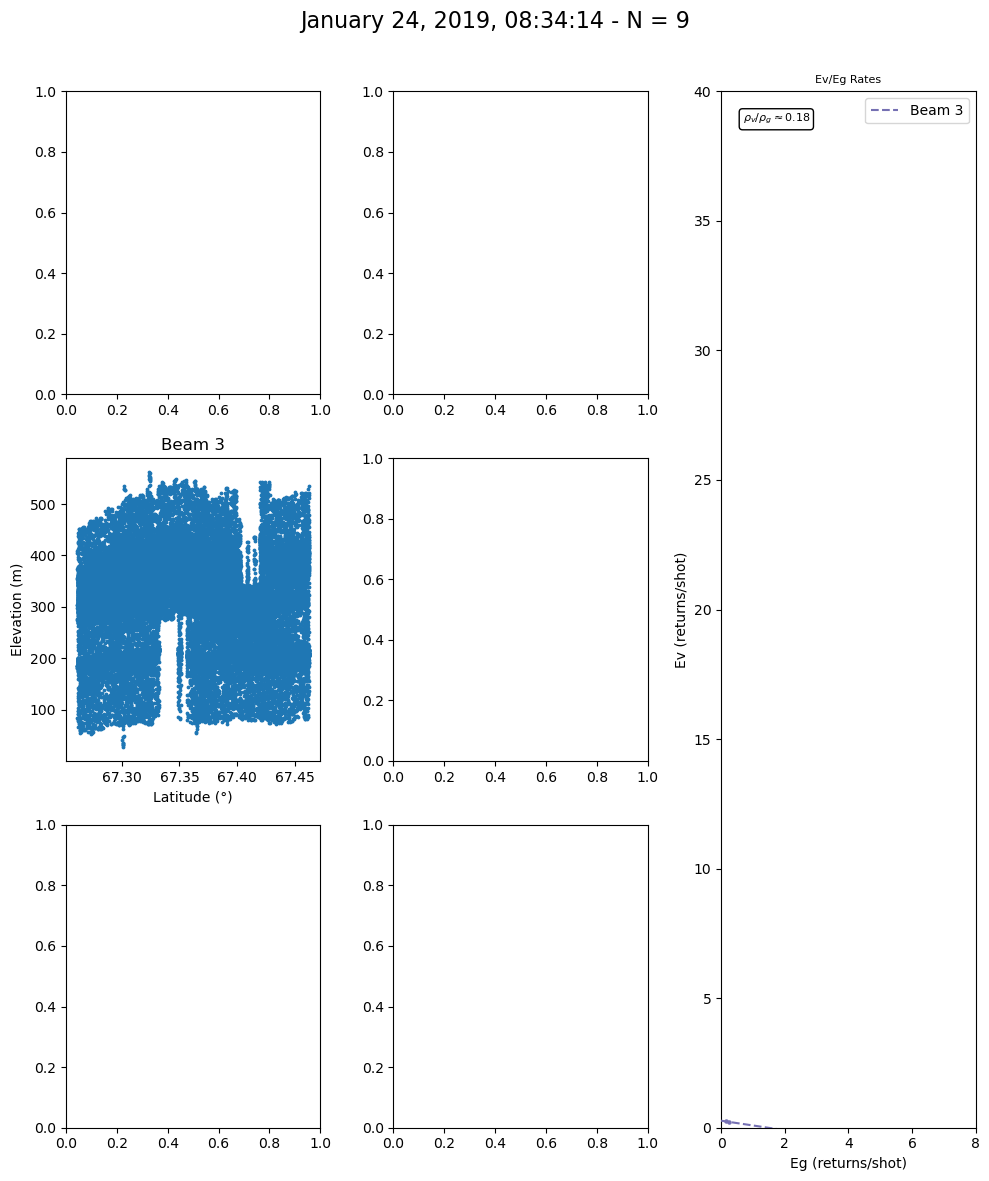

/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


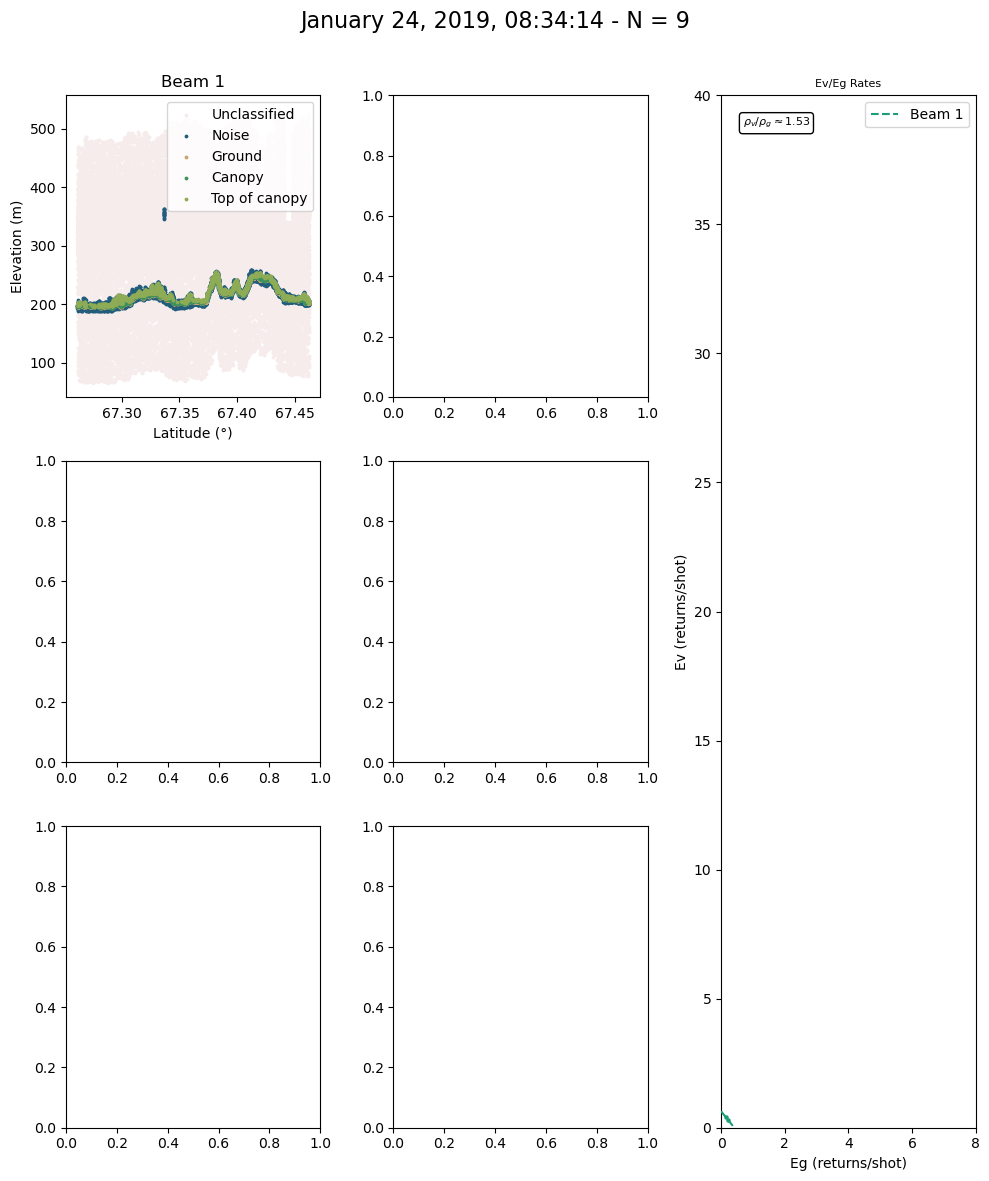

/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


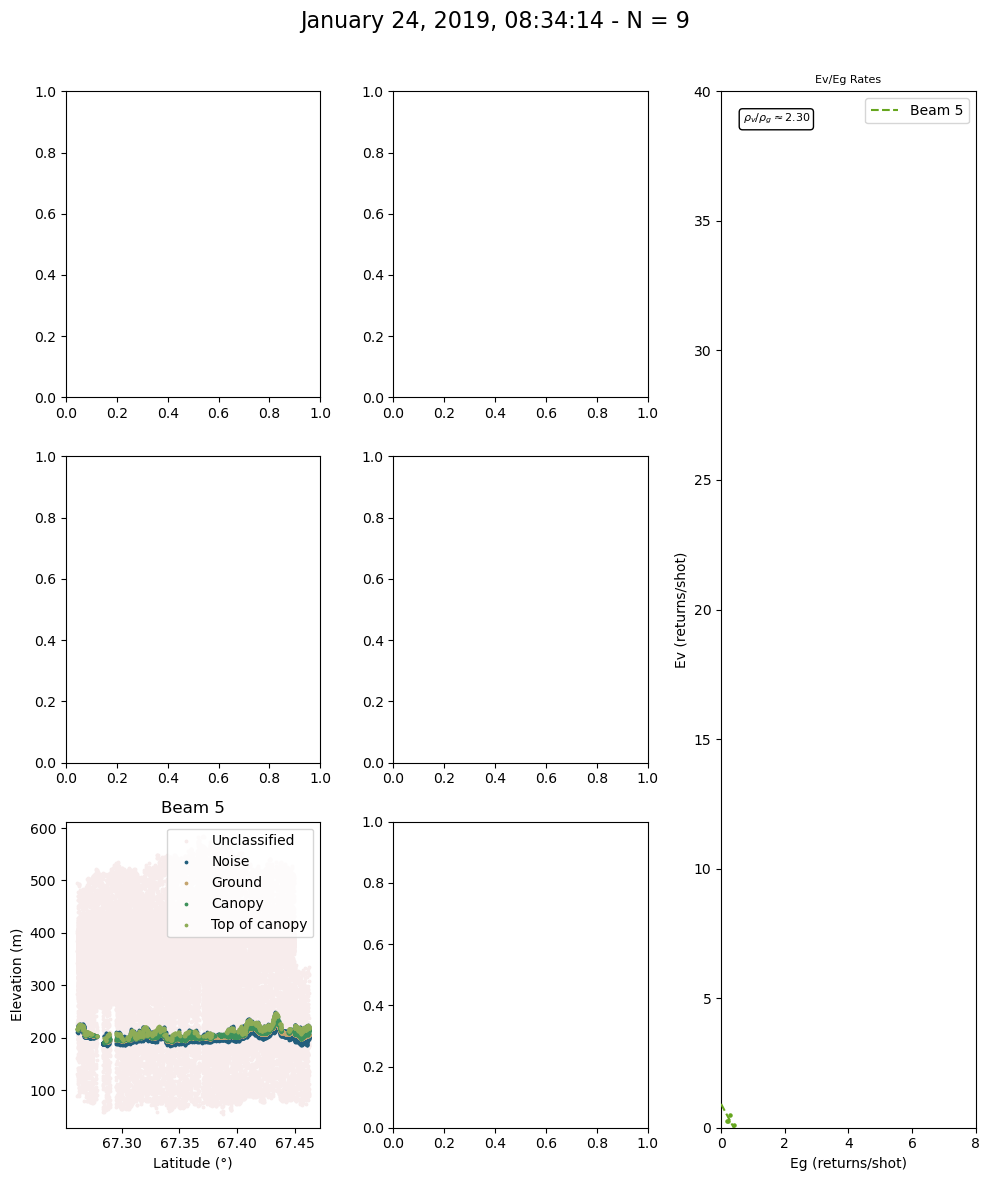

/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


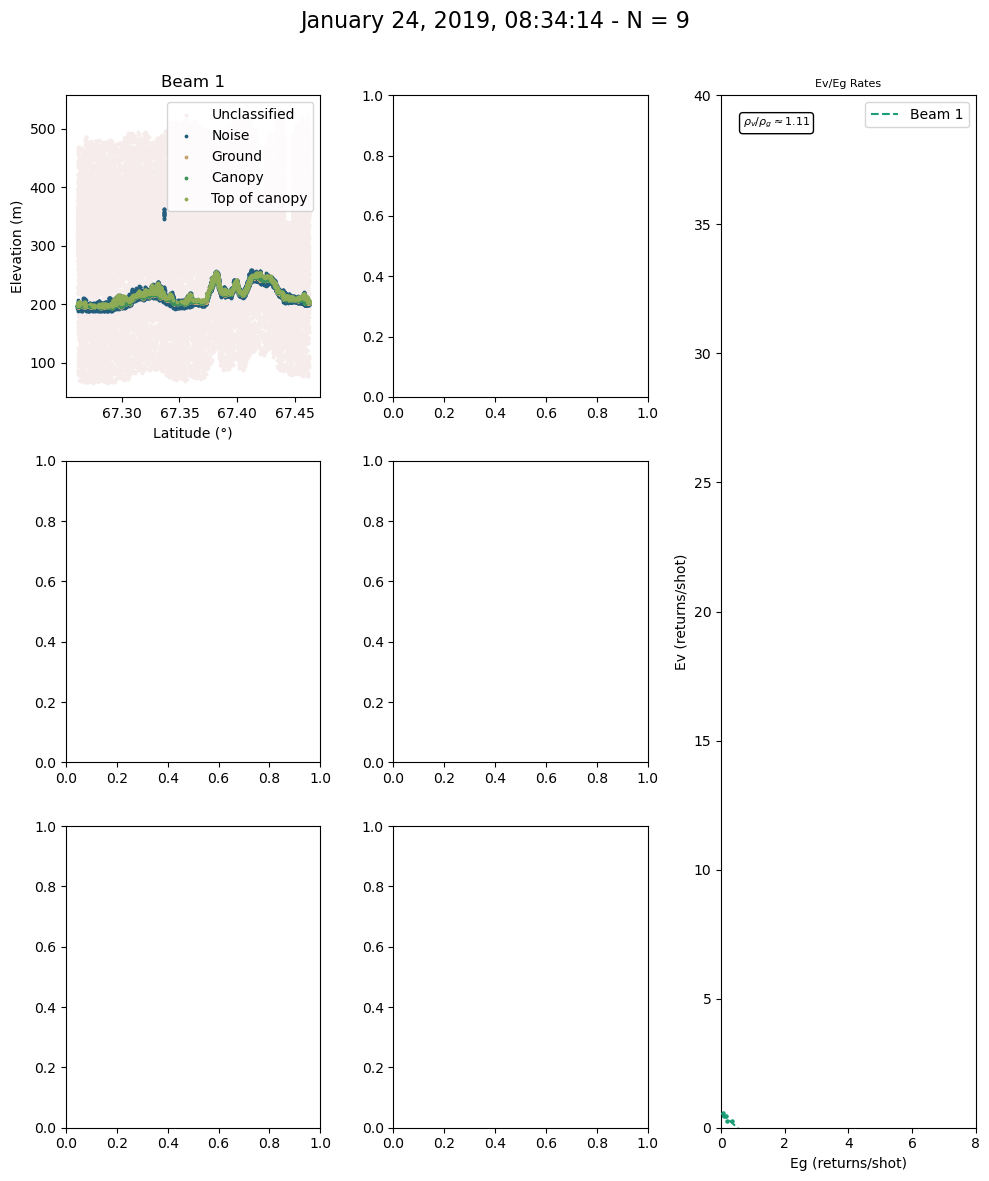

/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


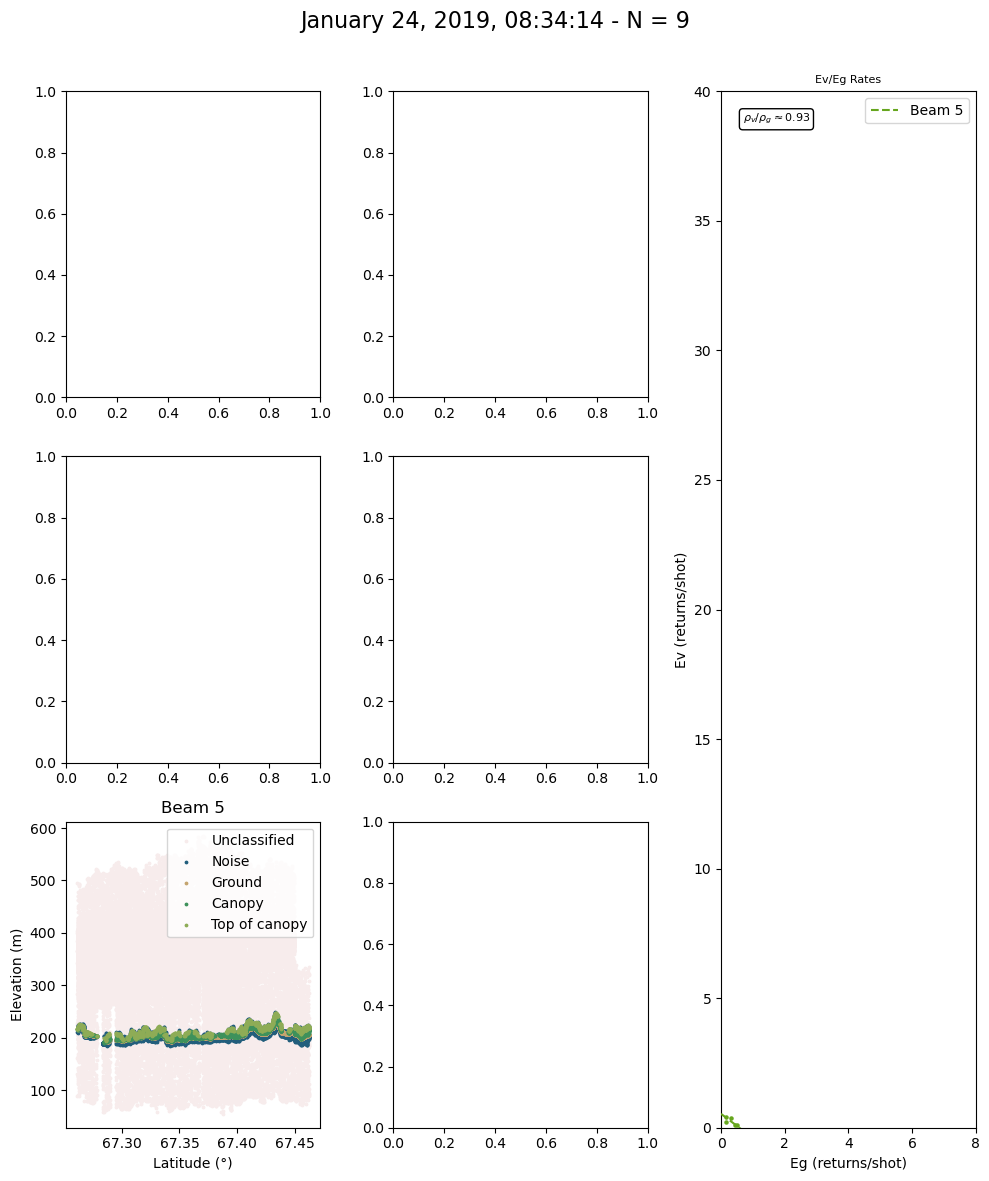

/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


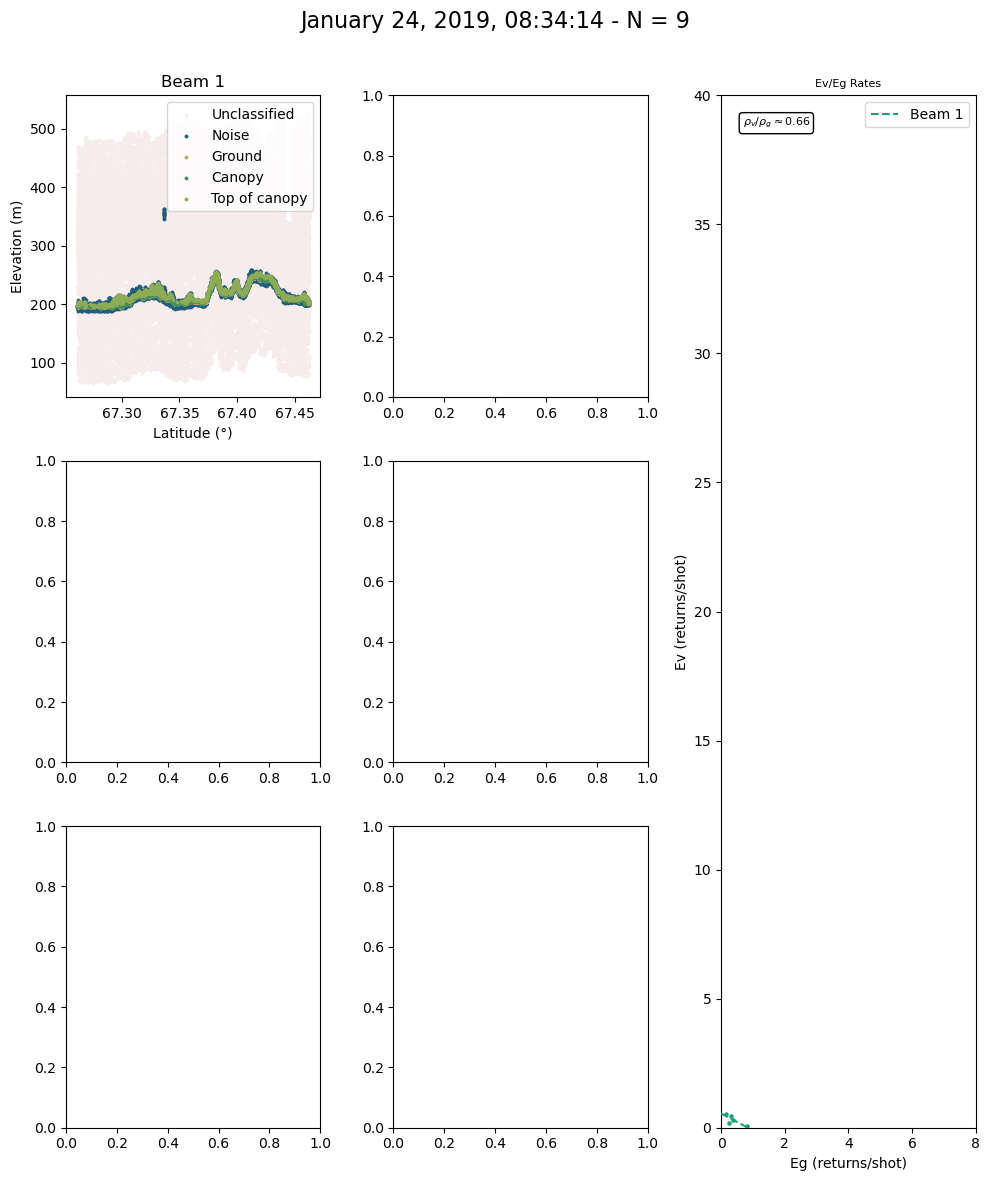

/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


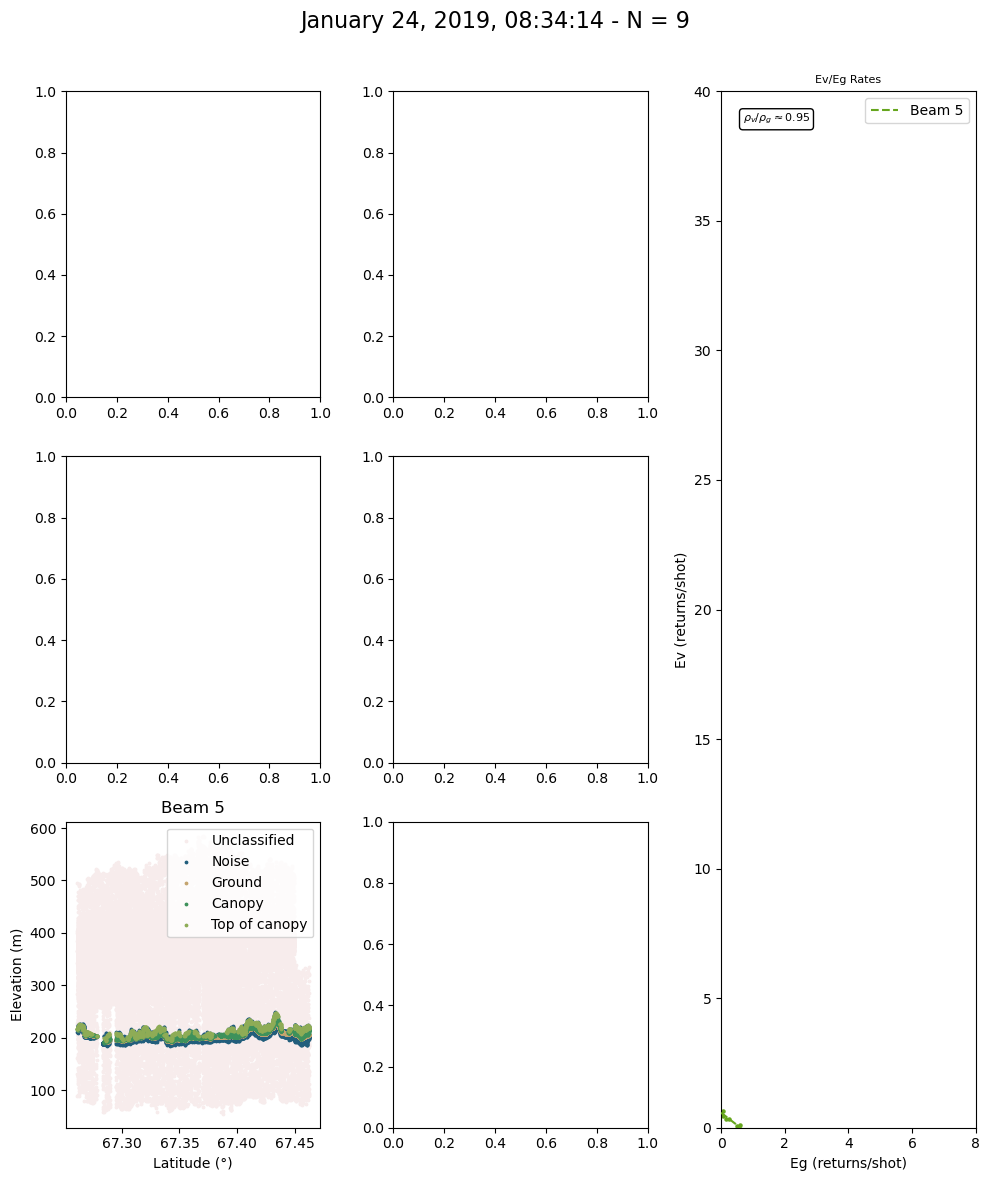

/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


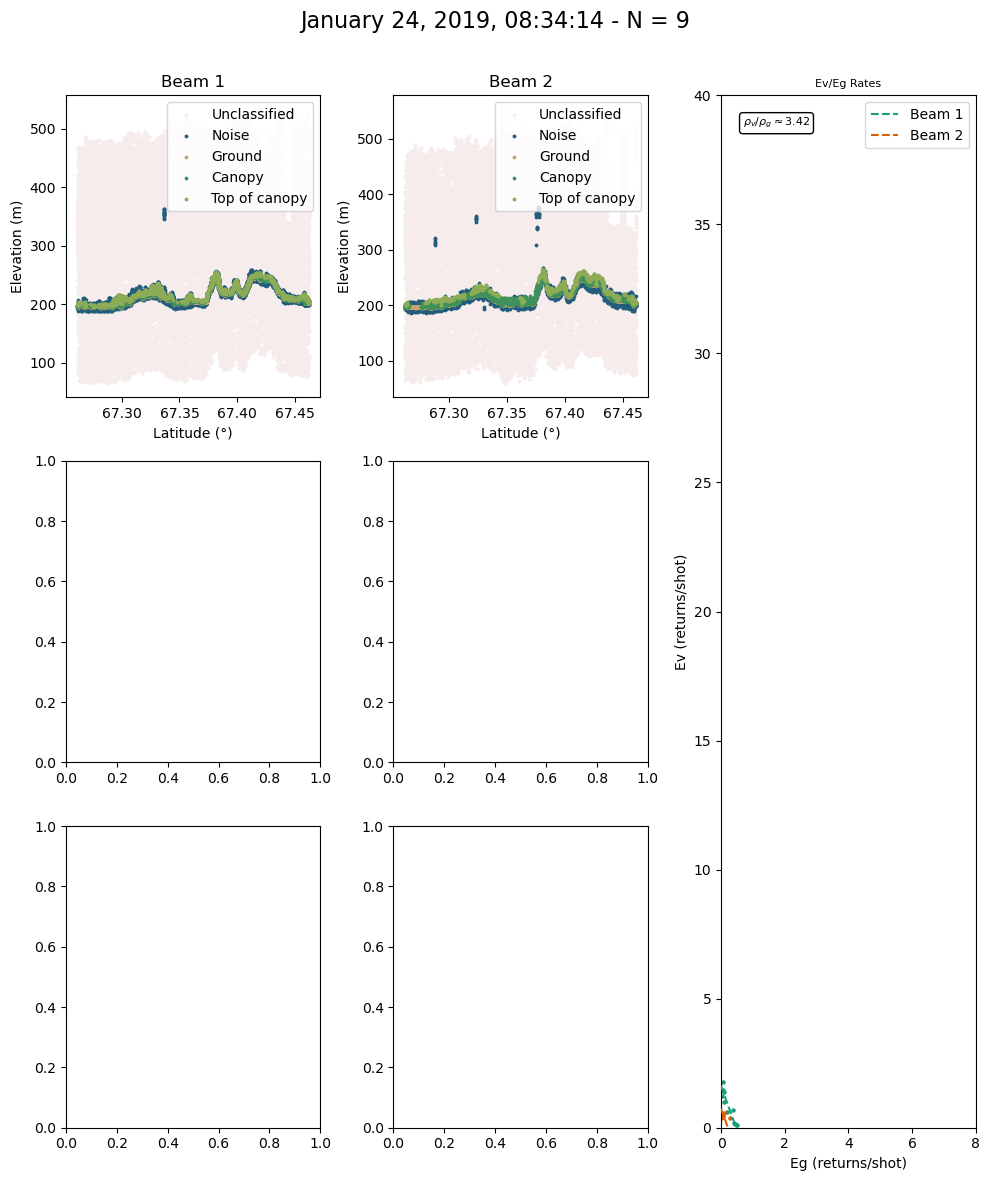

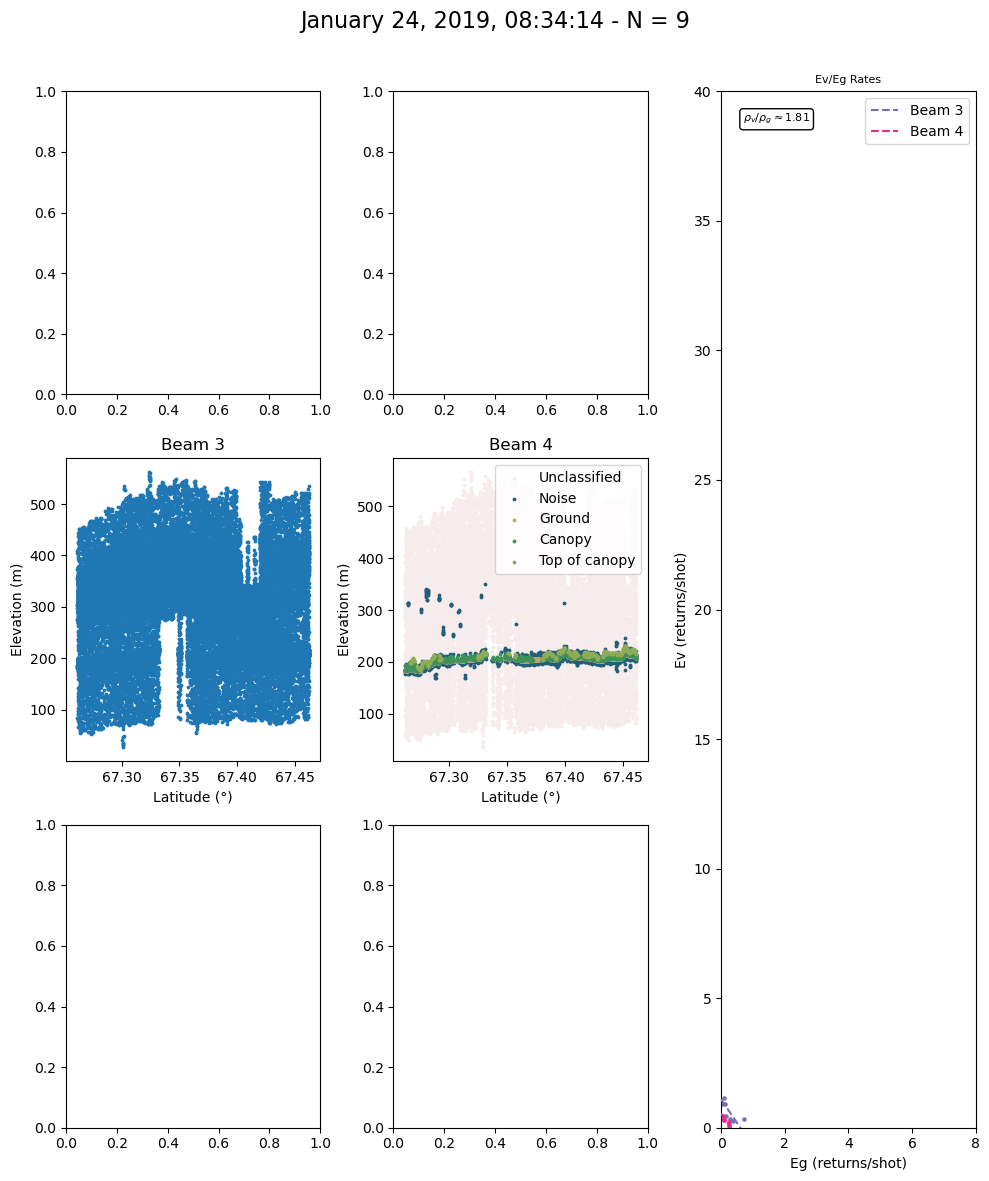

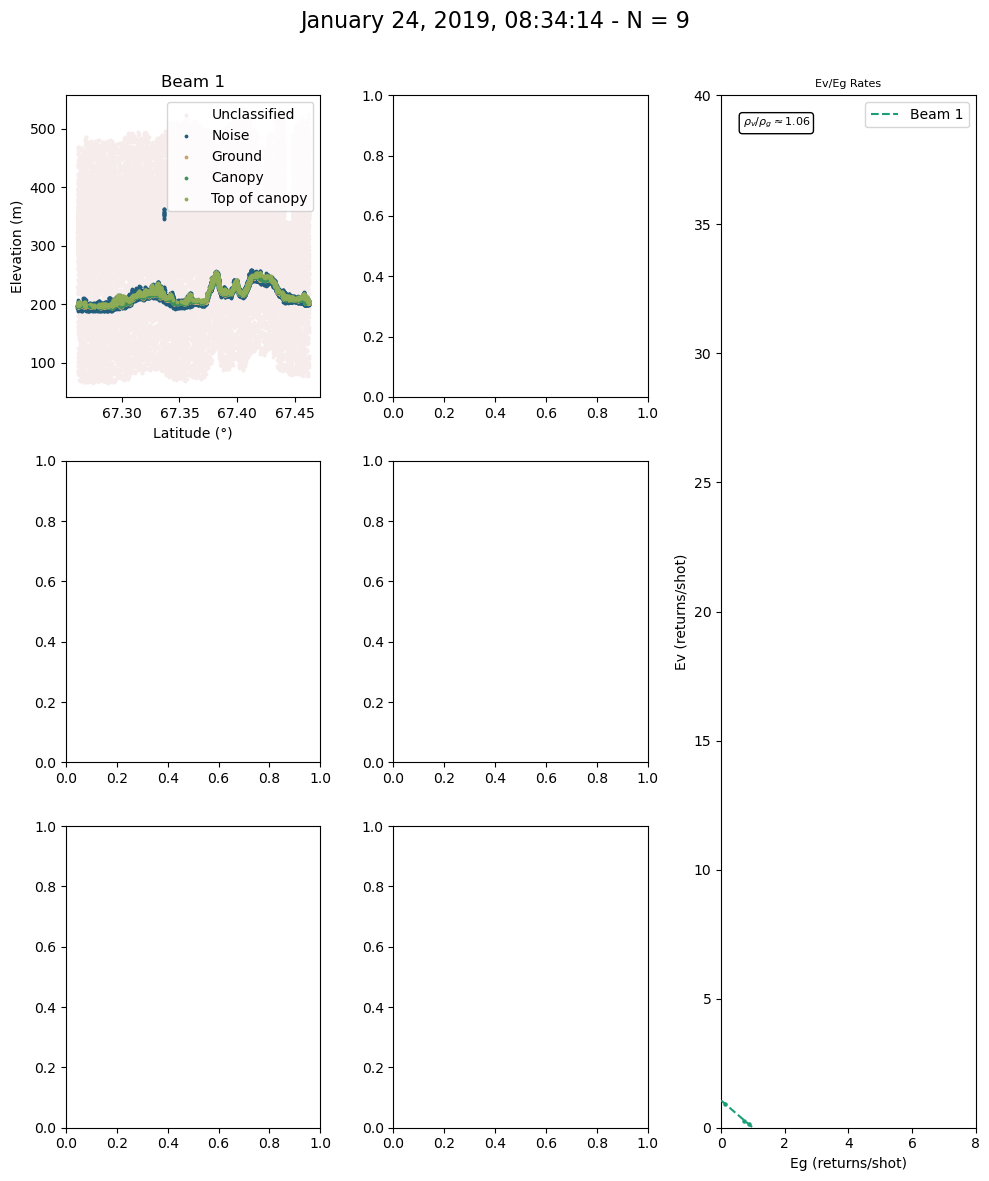

/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


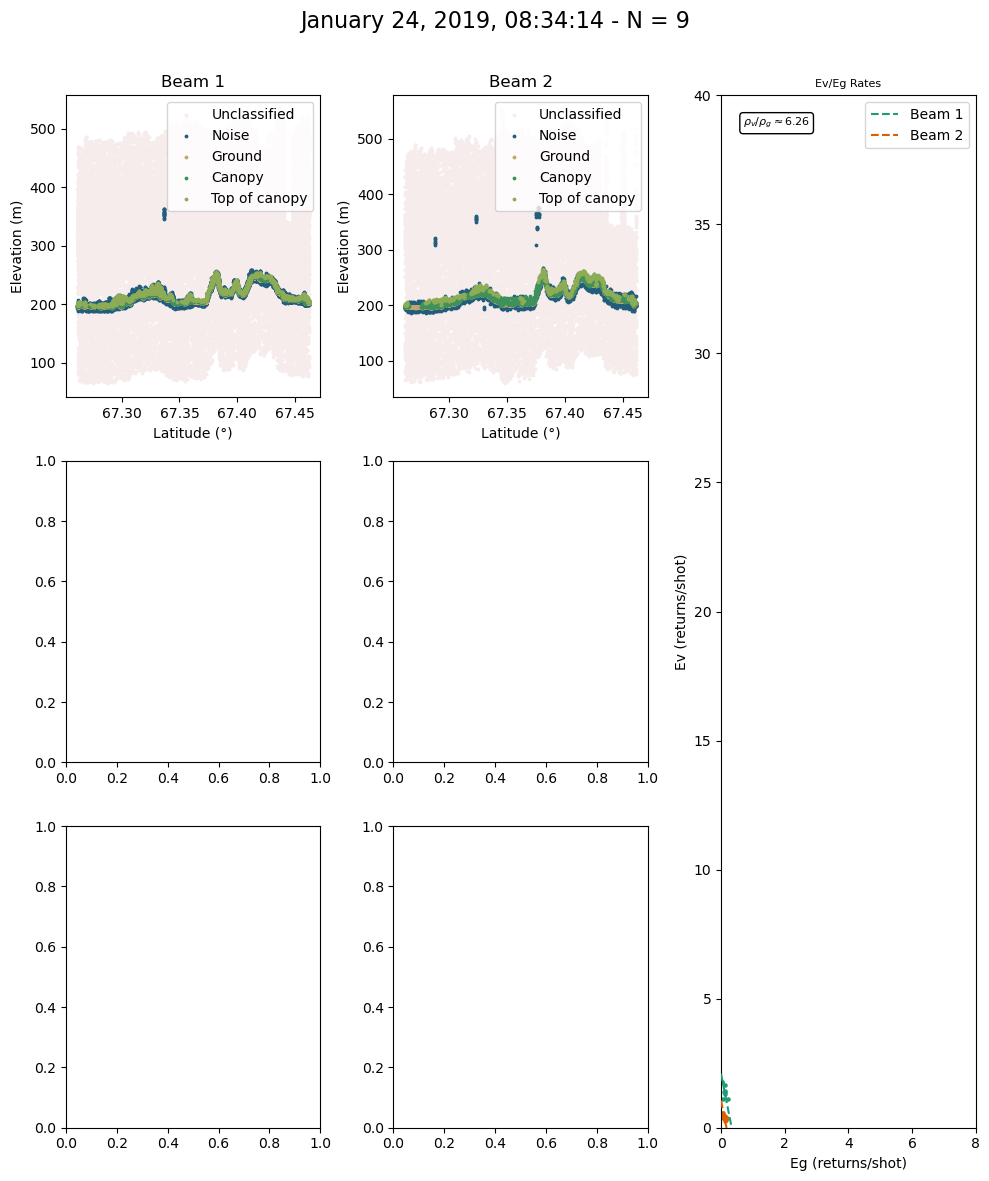

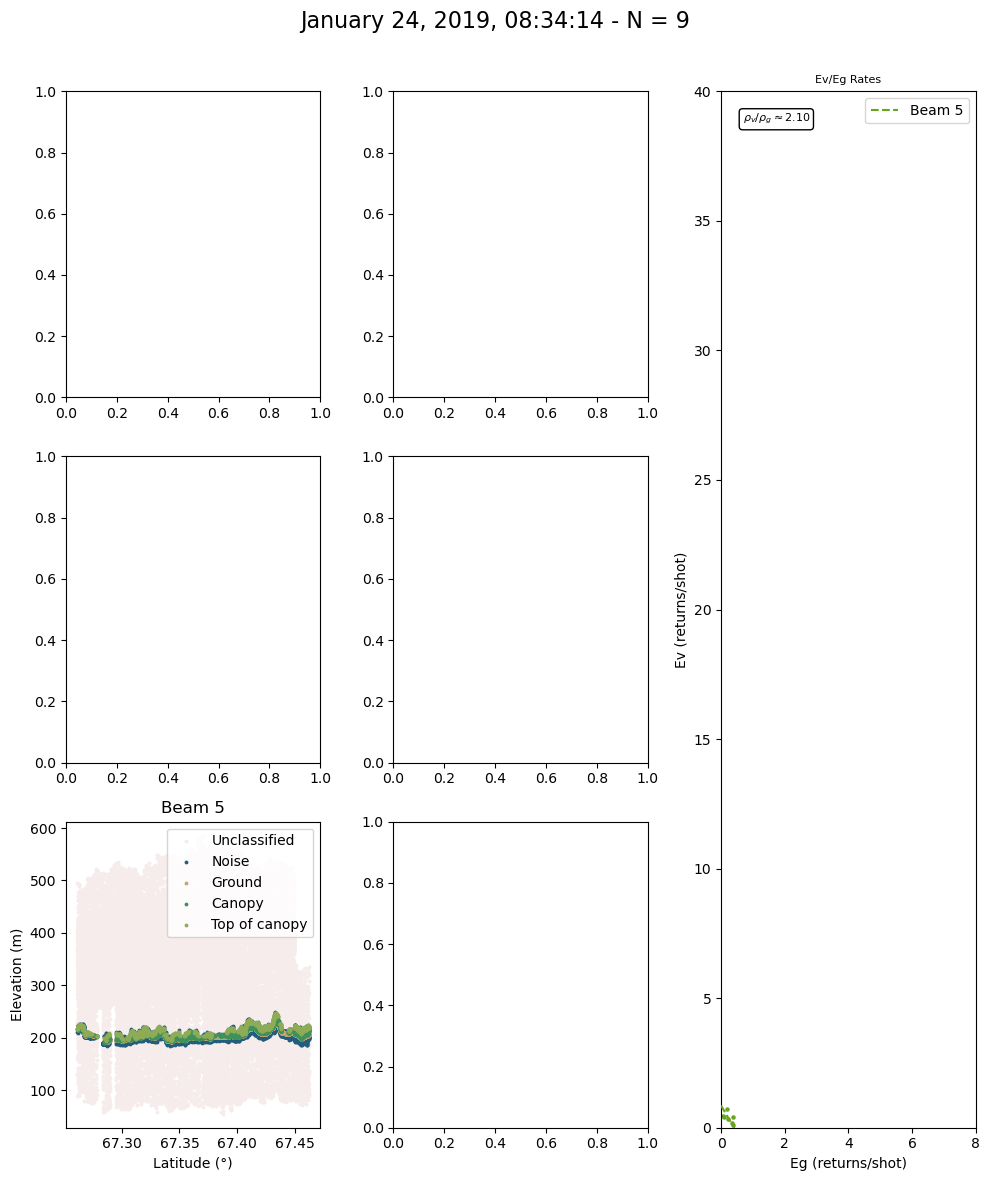

/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


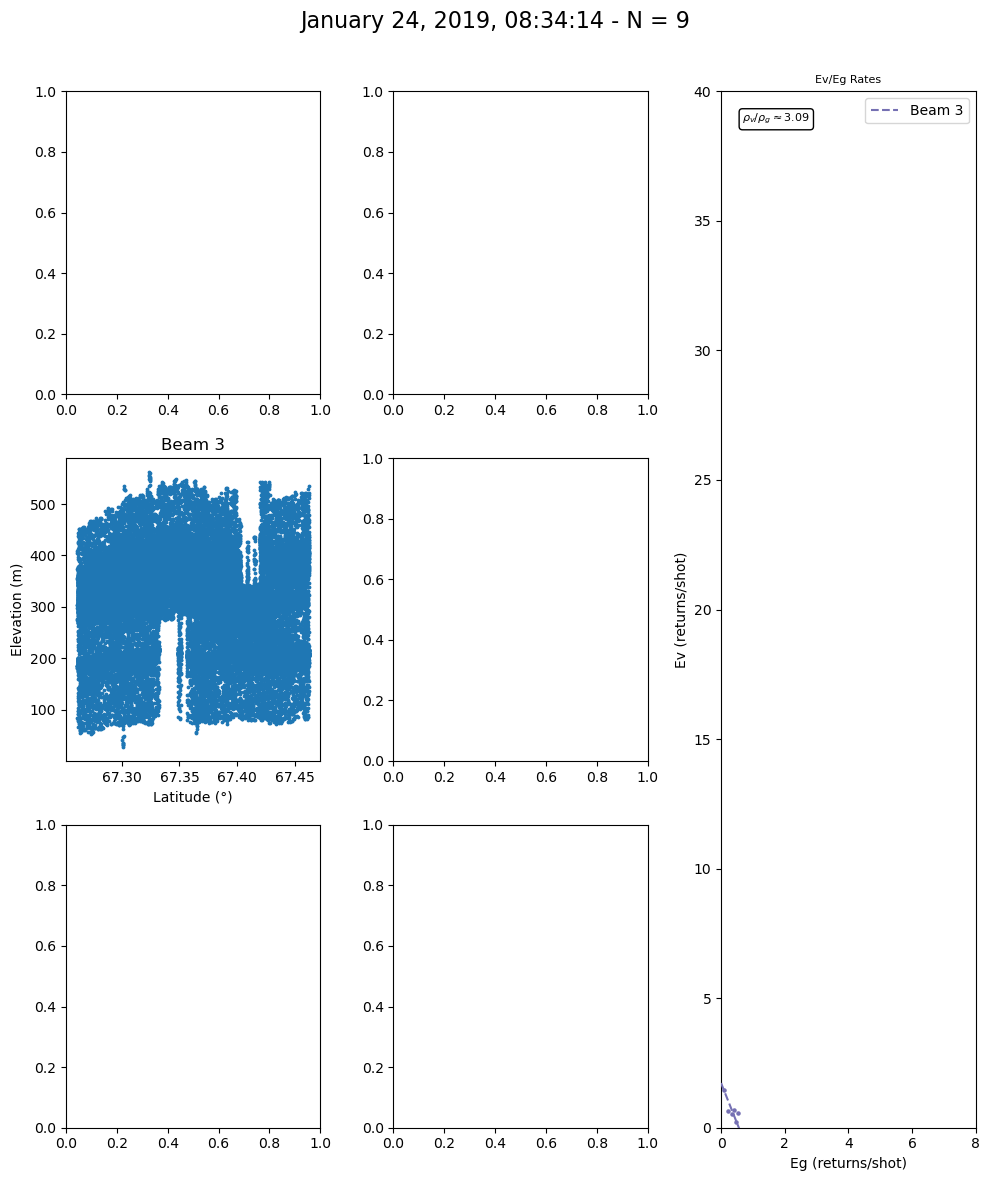

/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


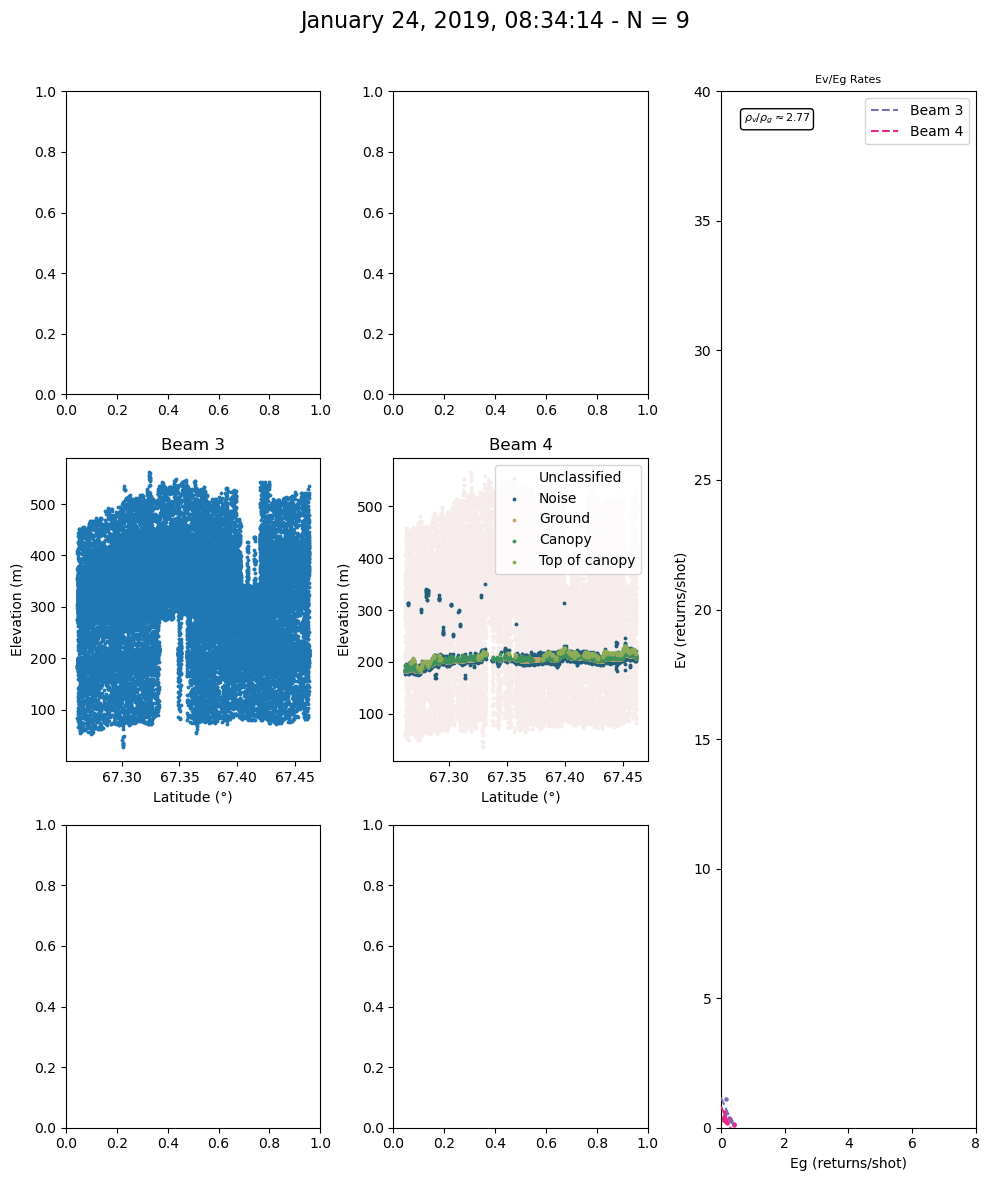

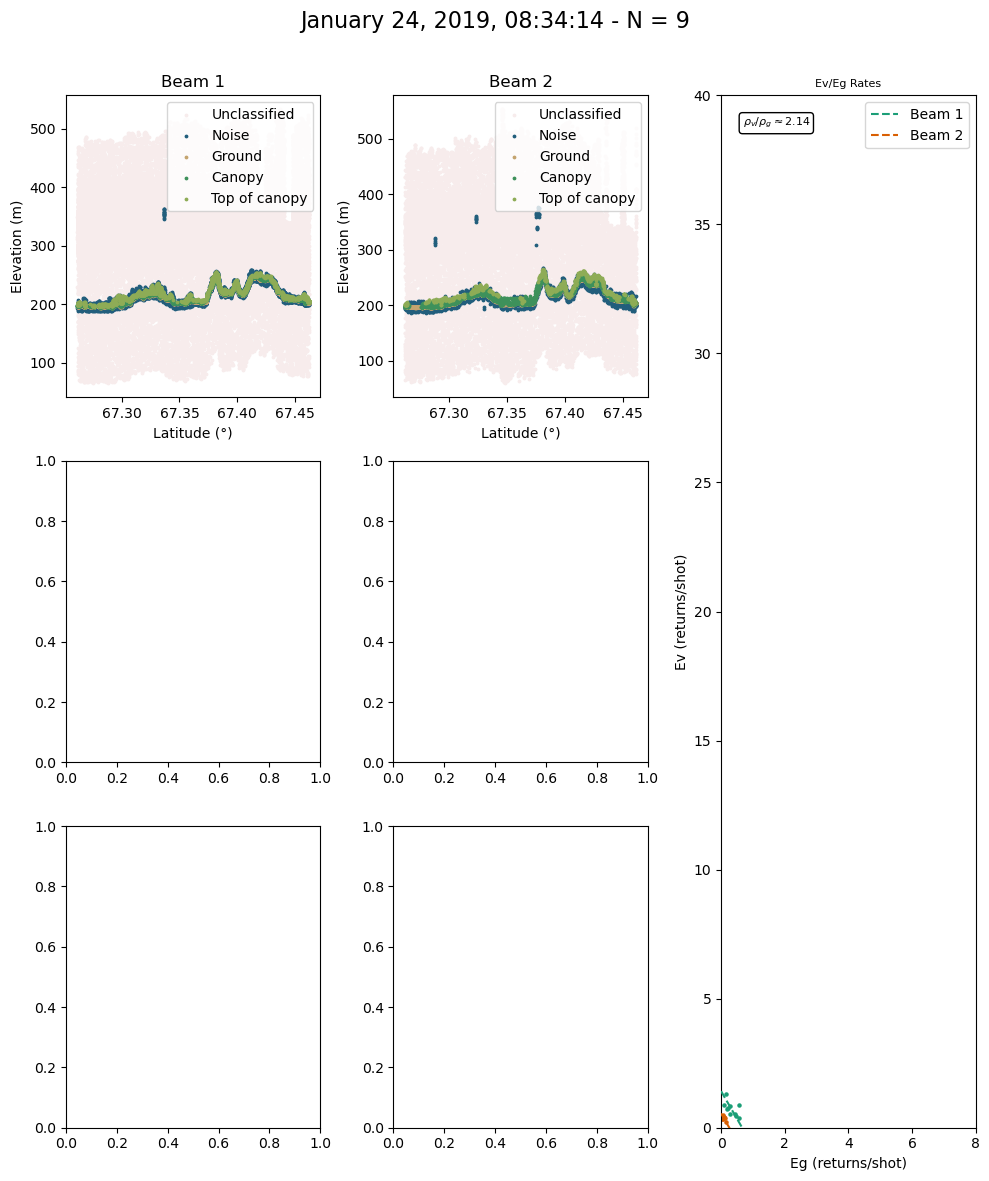

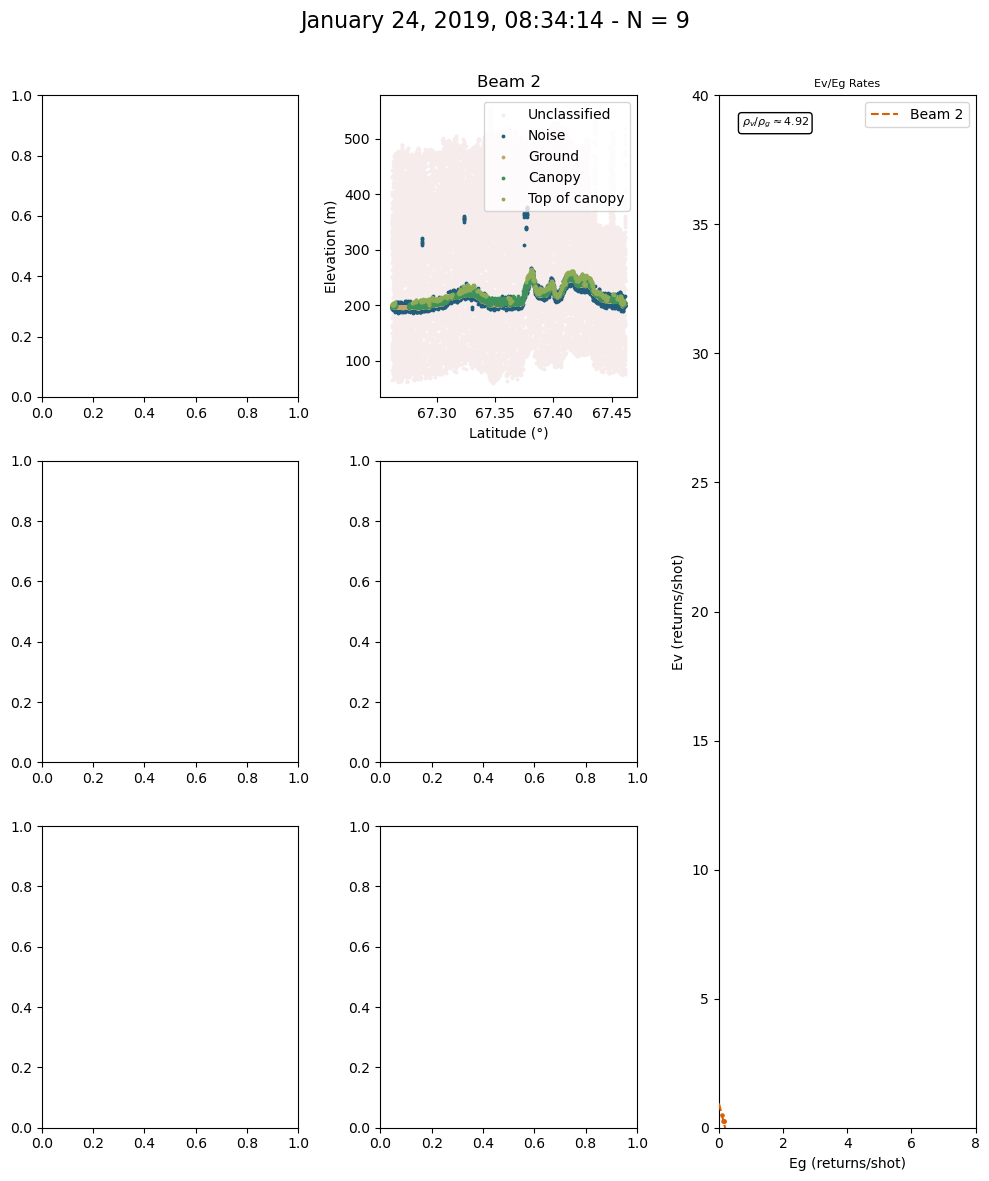

/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


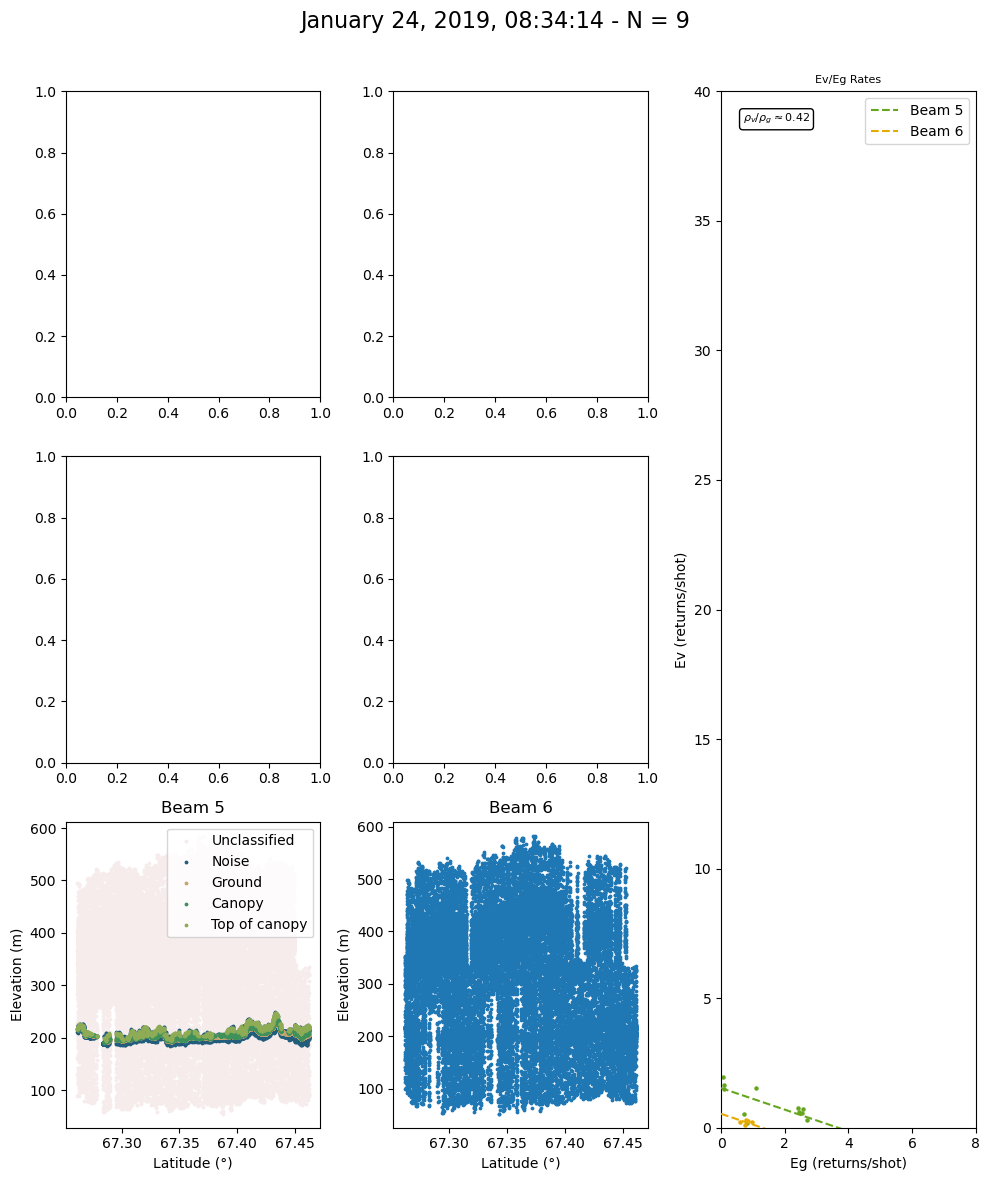

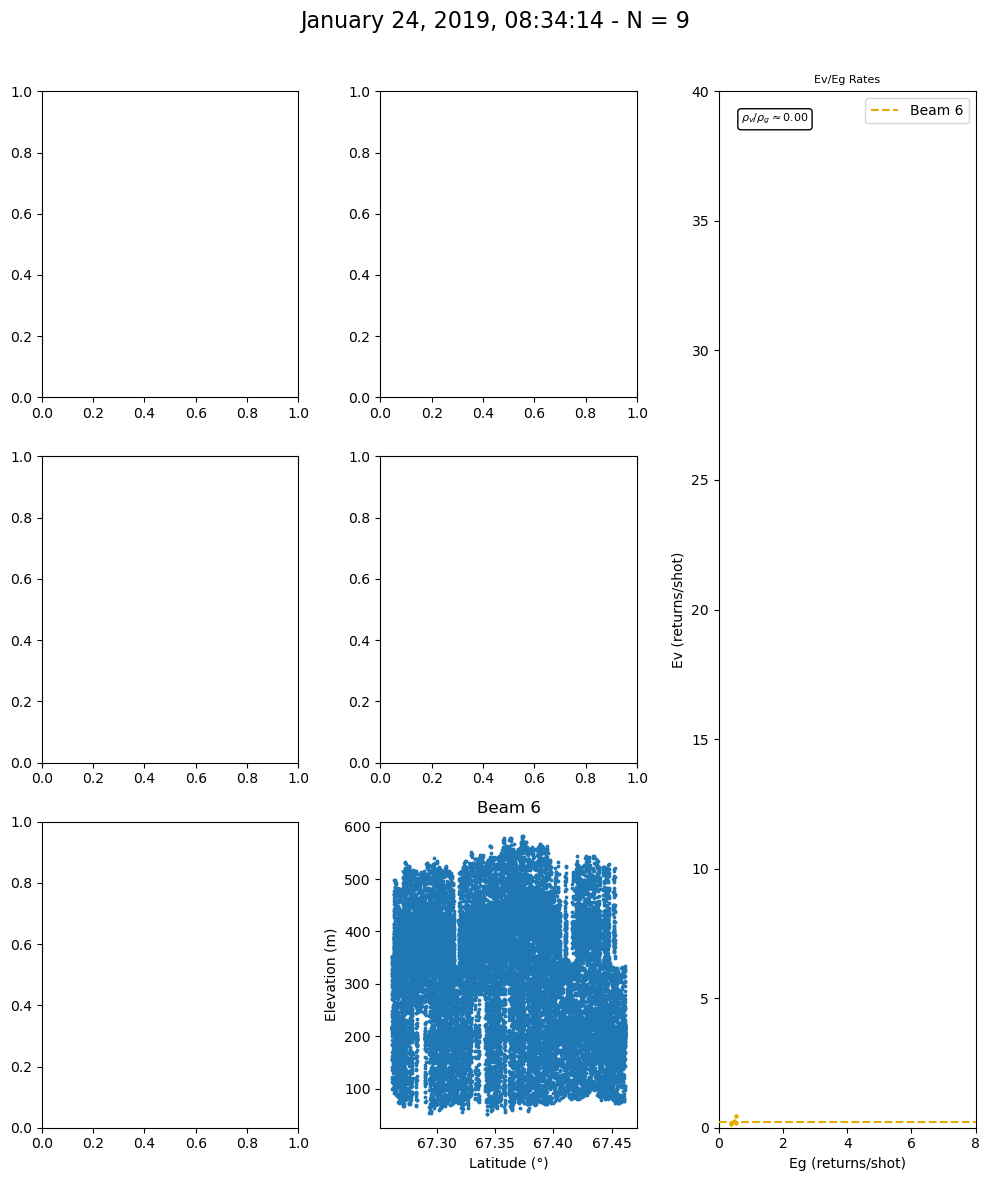

/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/scratch/s1803229/.conda/envs/snow_env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


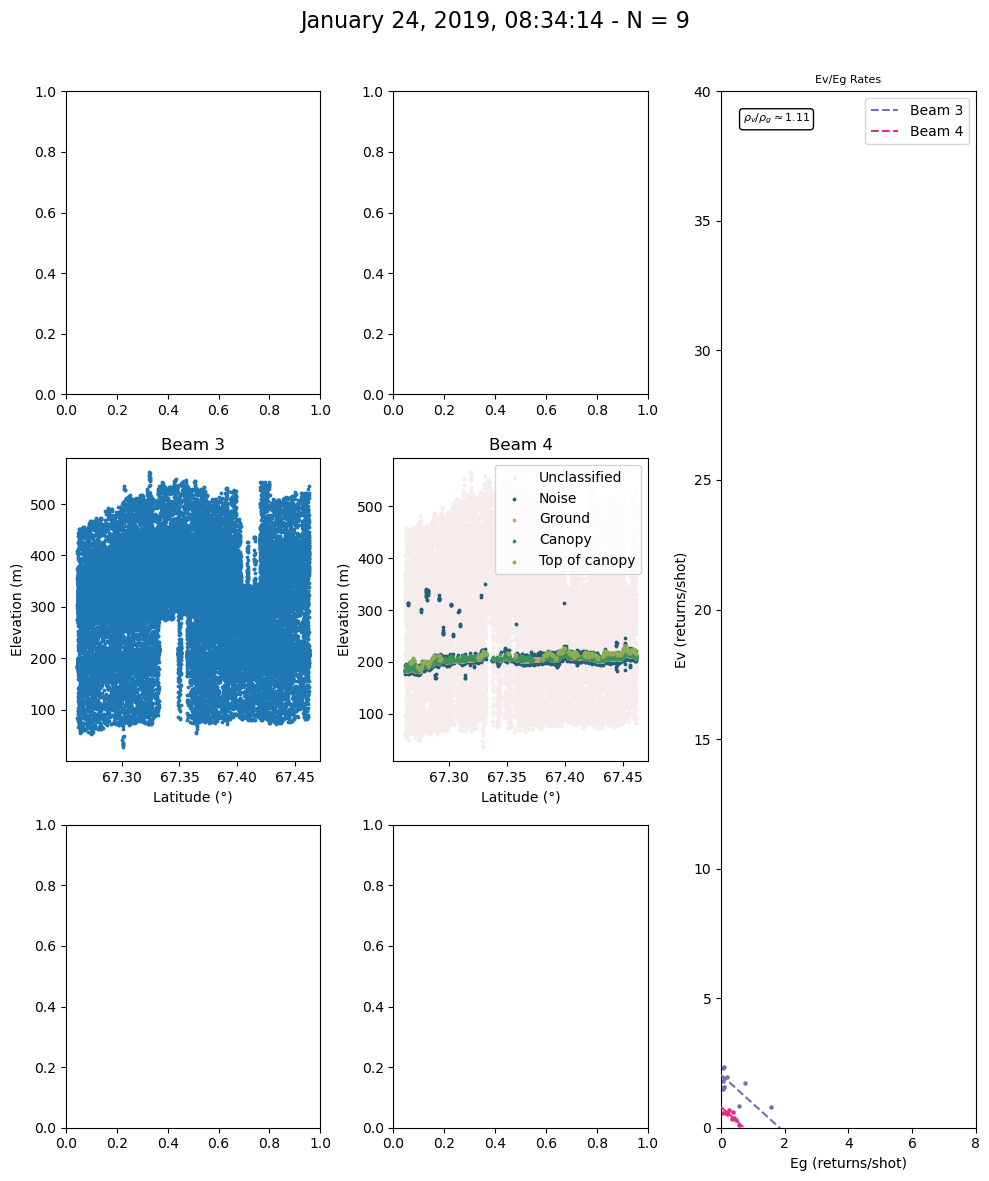

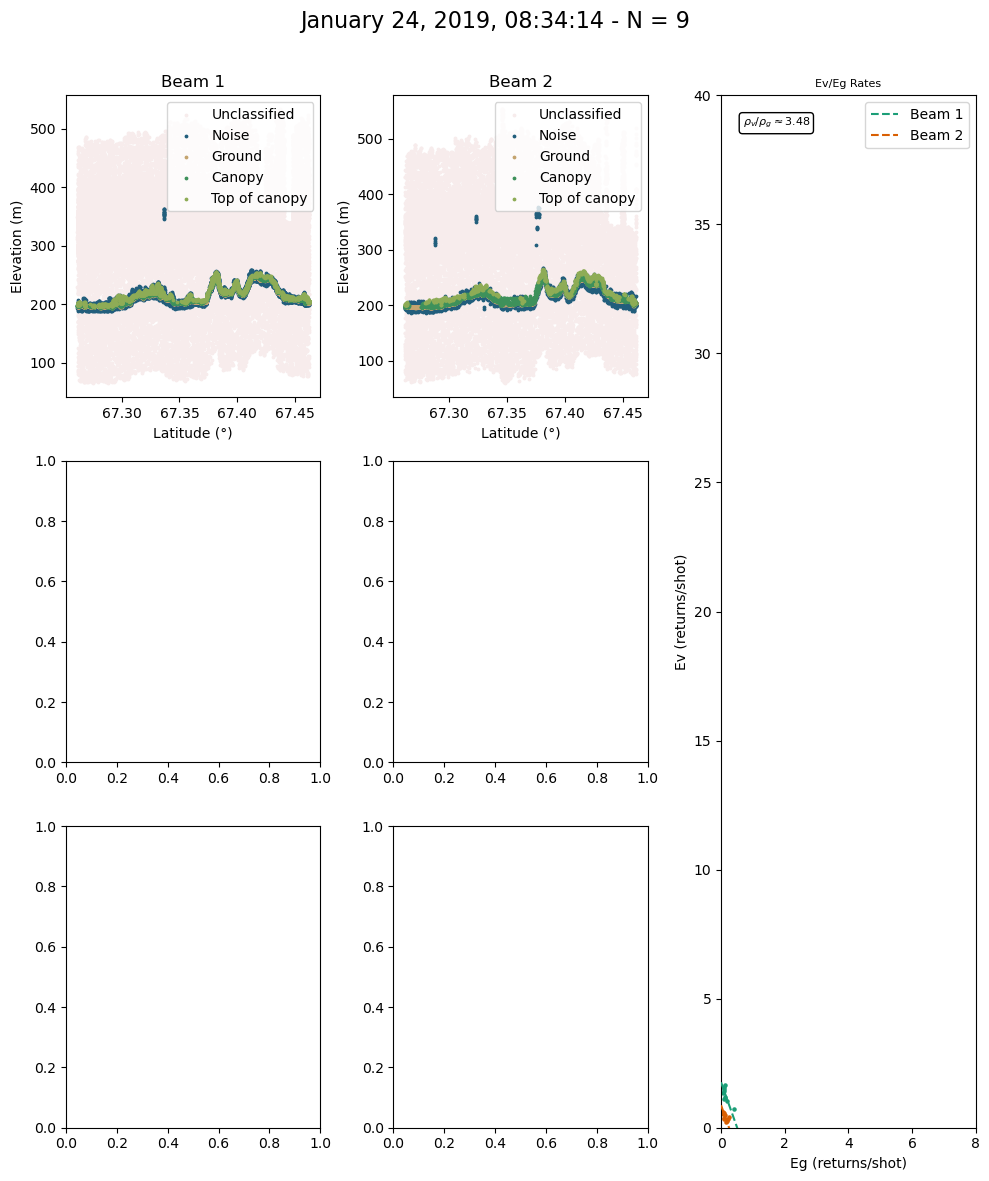

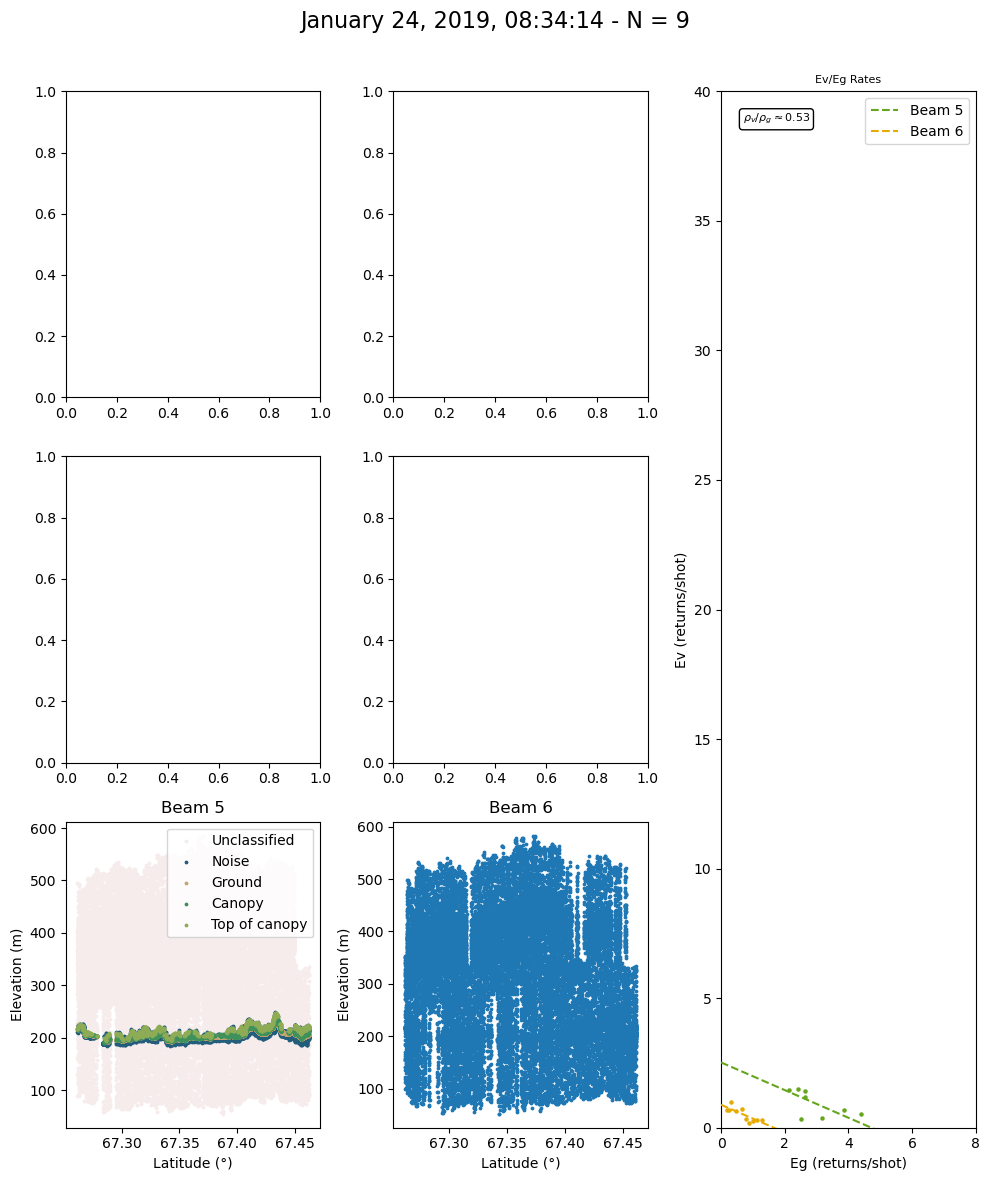

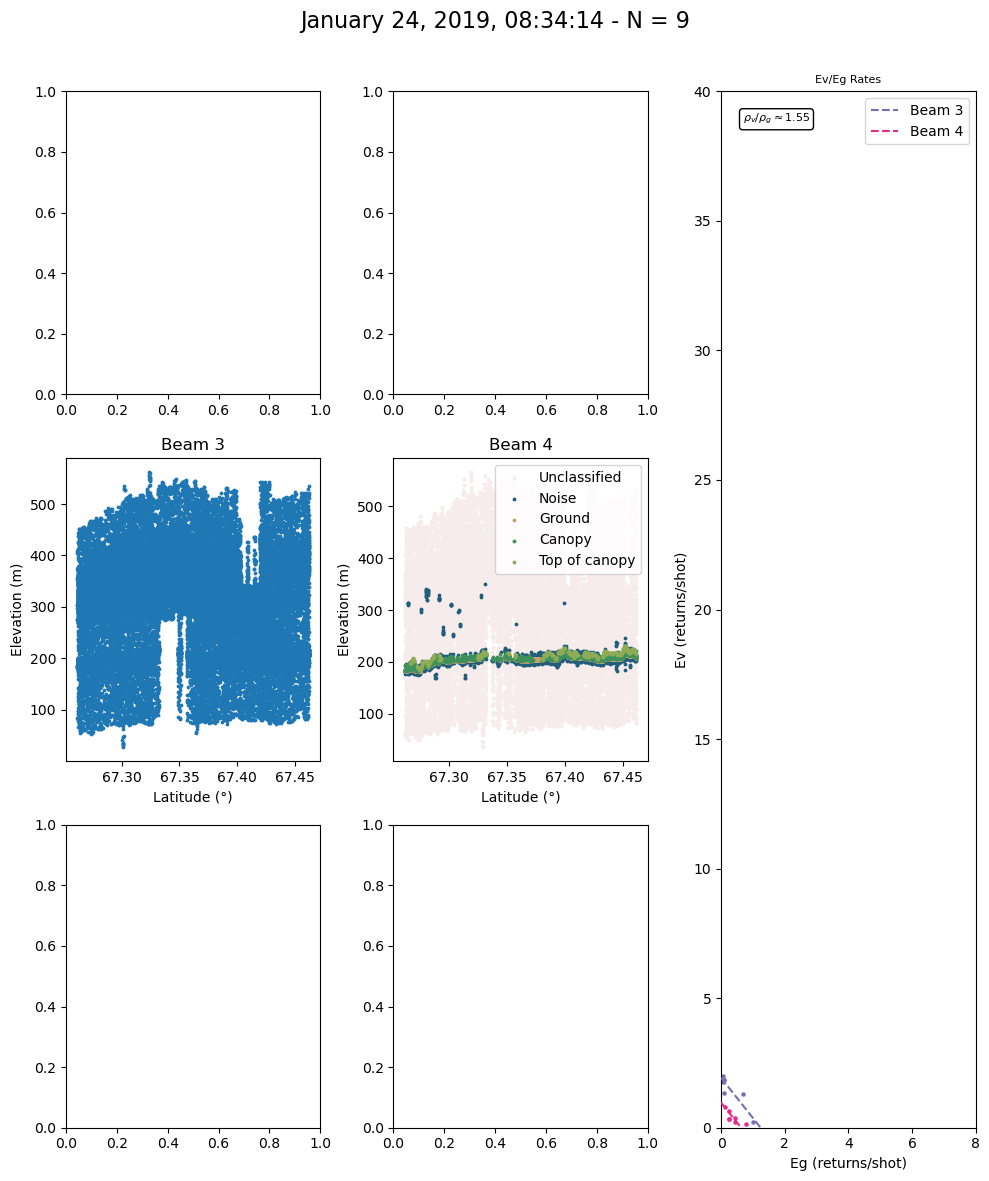

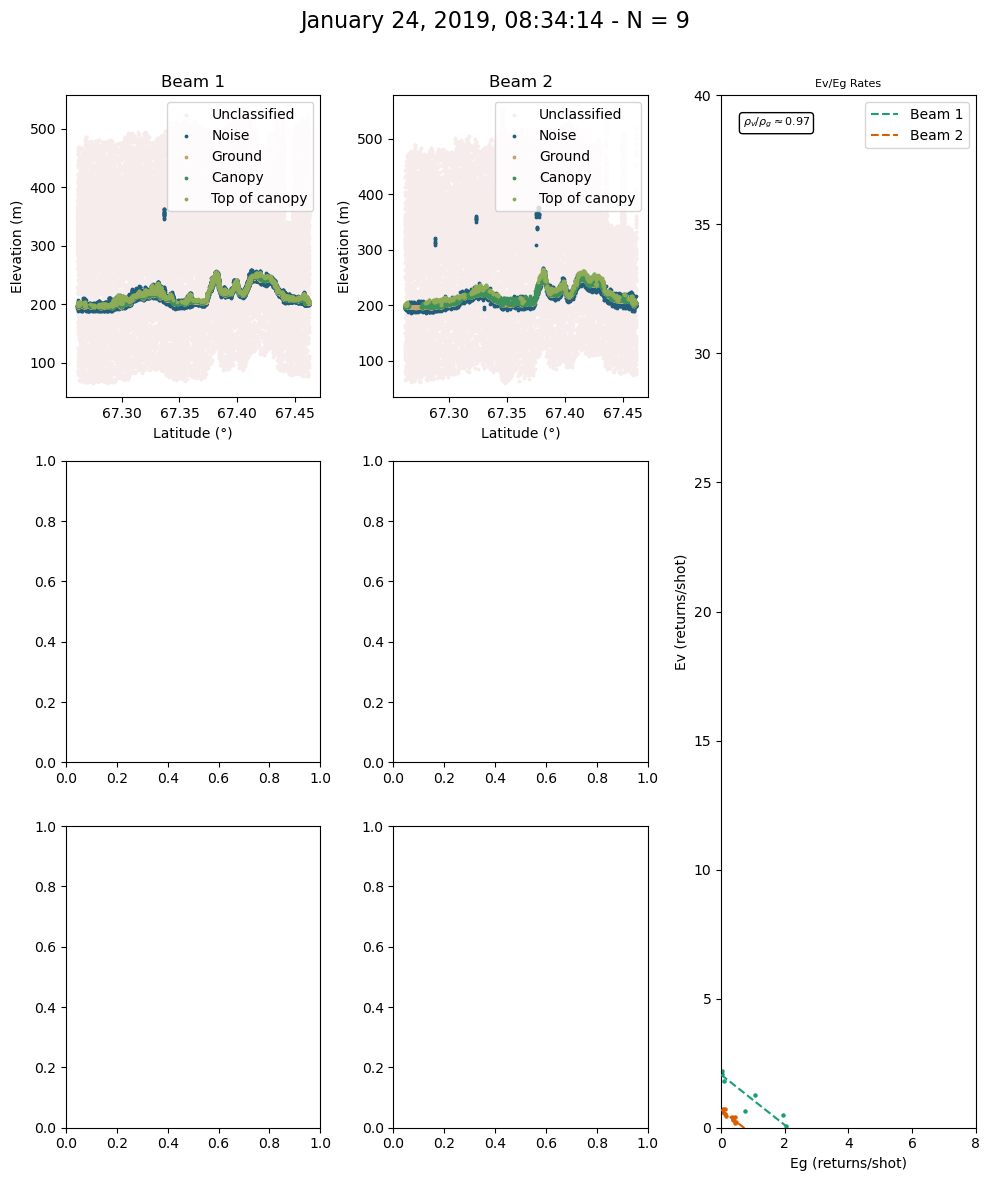

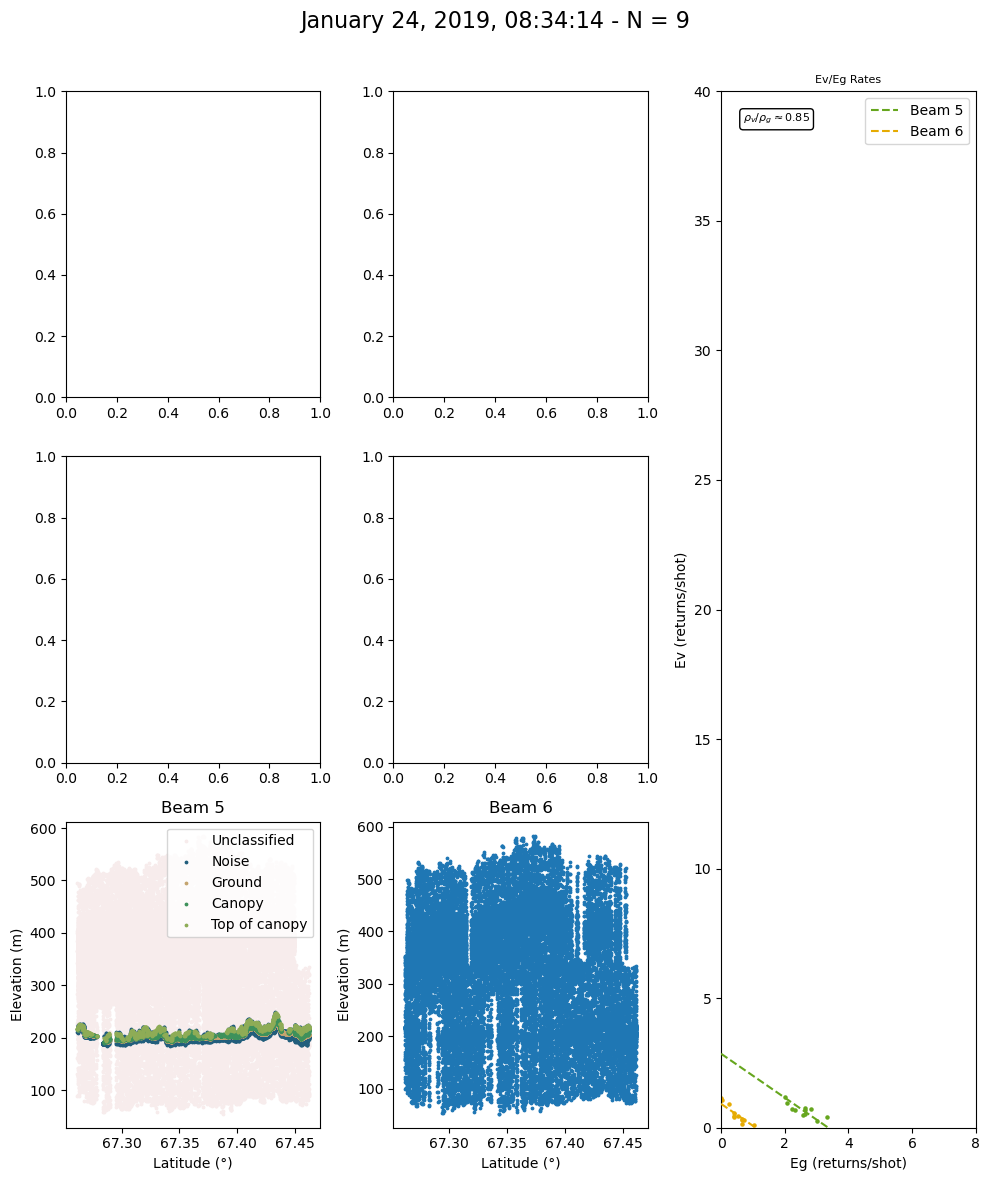

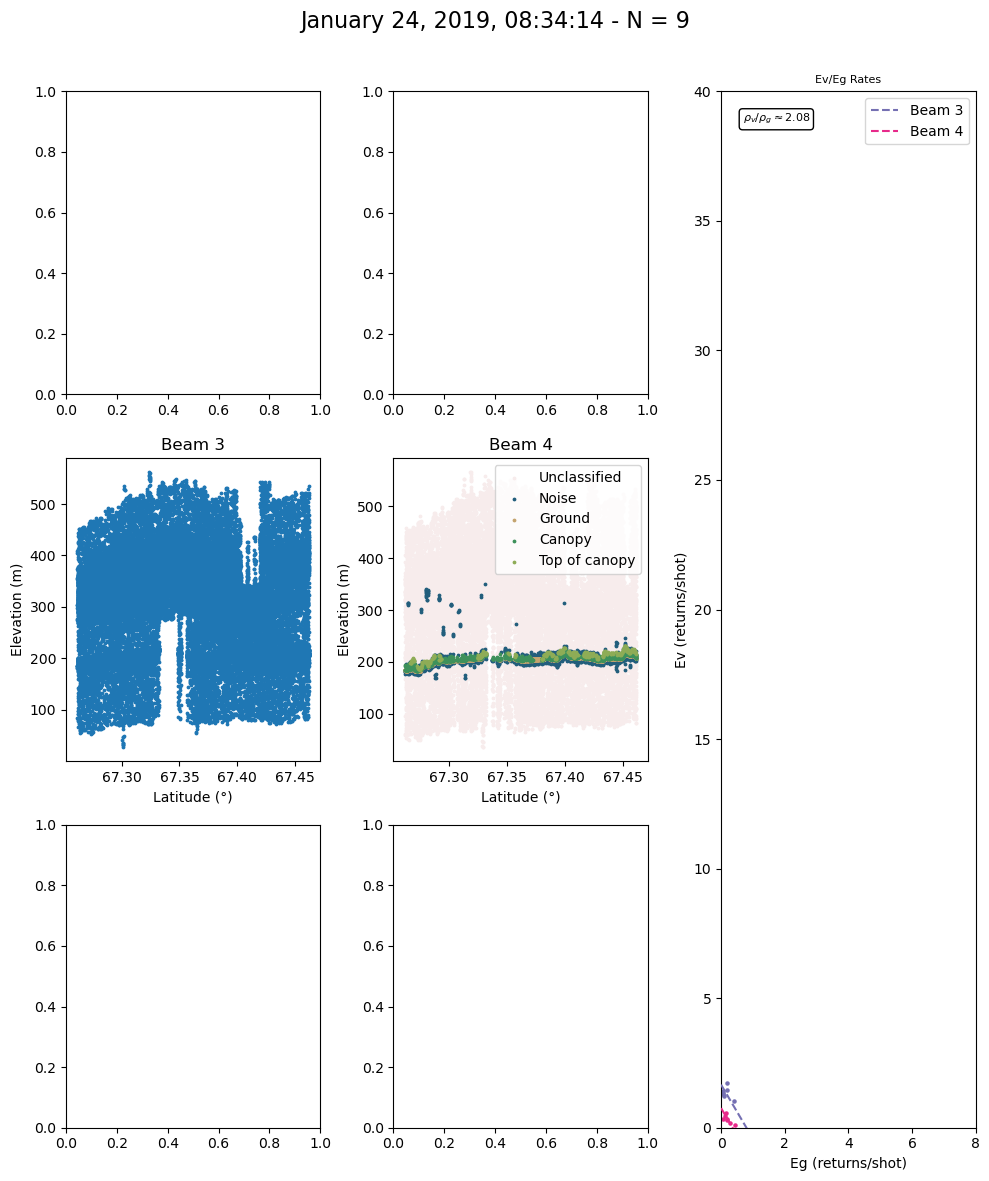

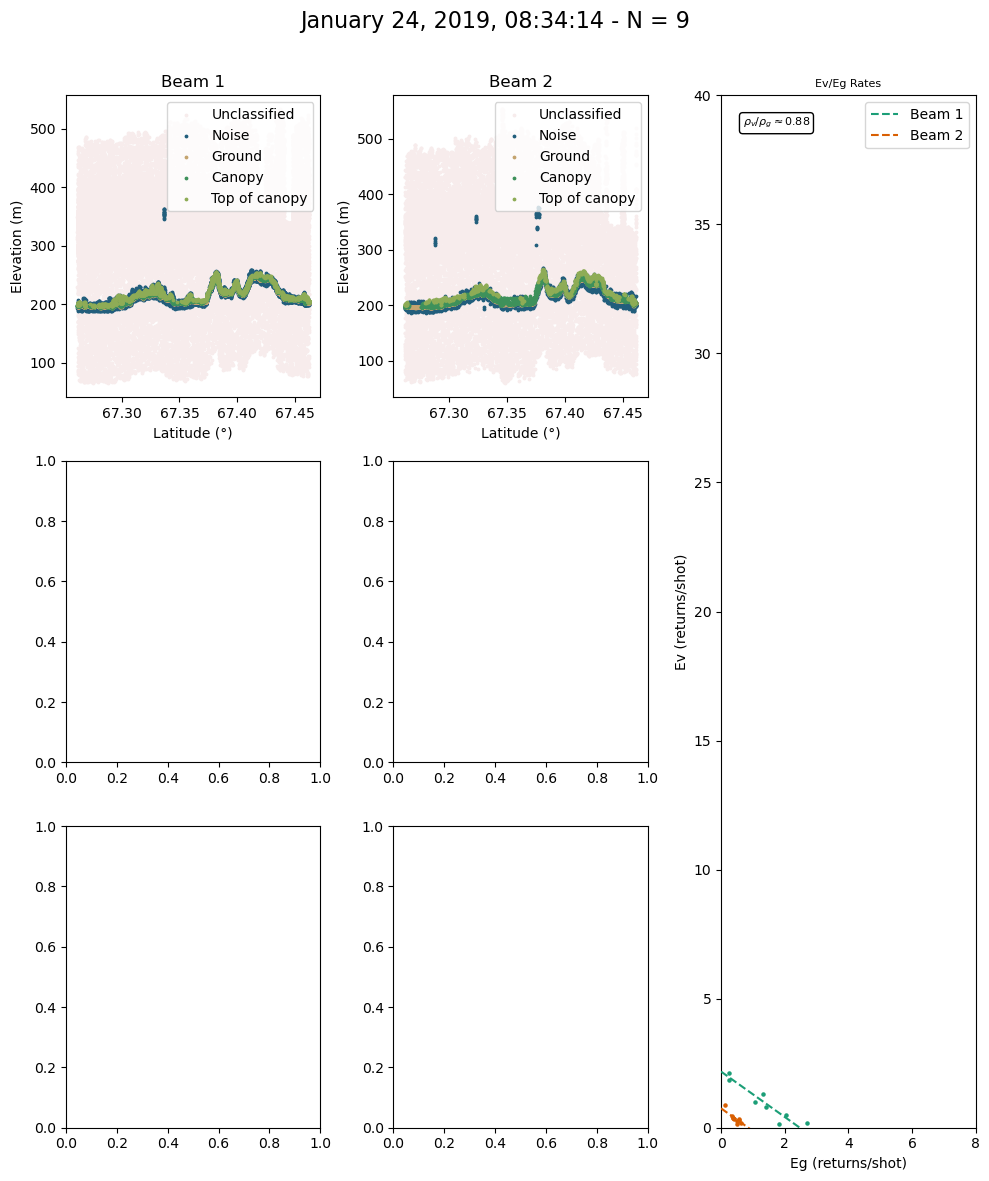

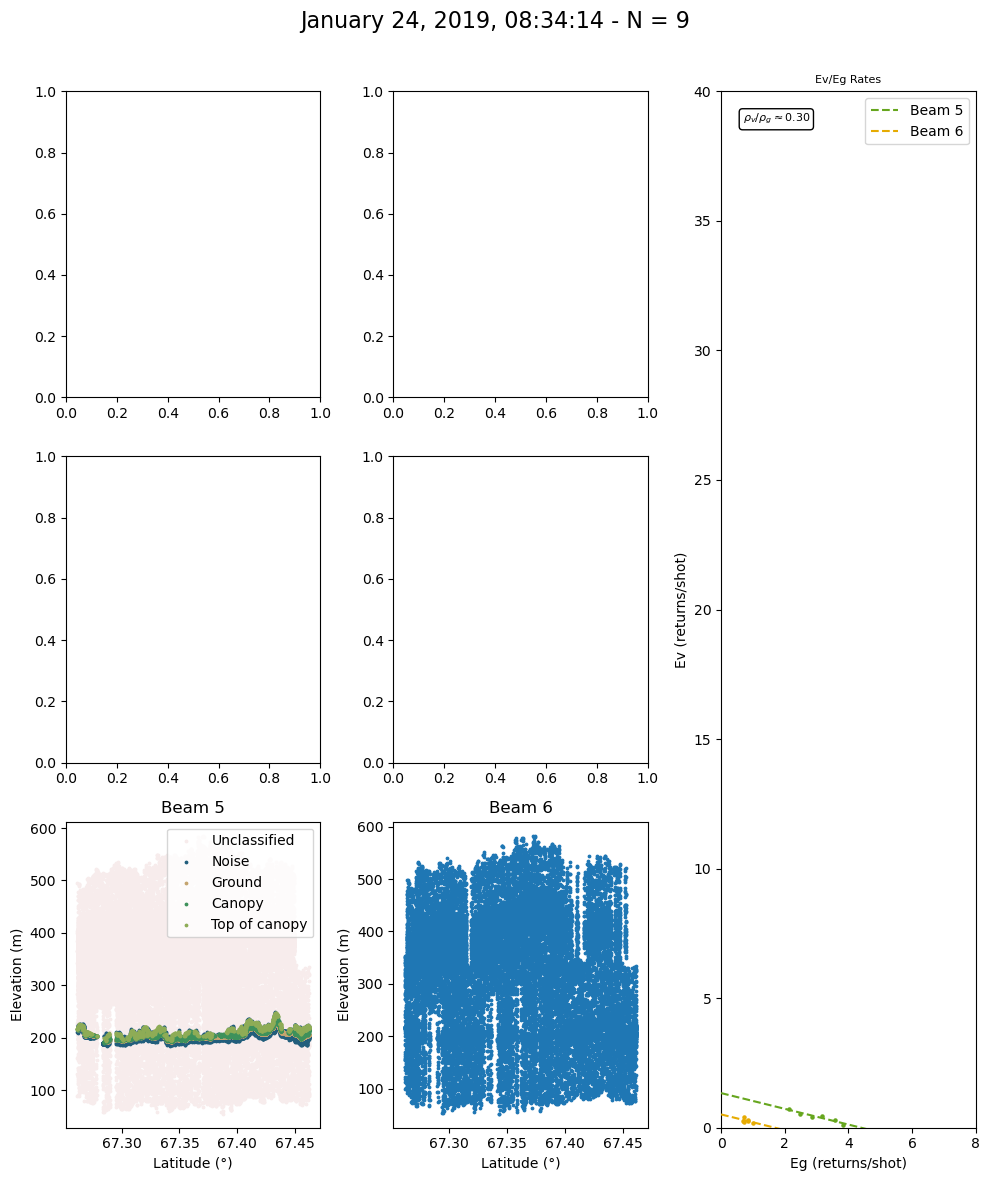

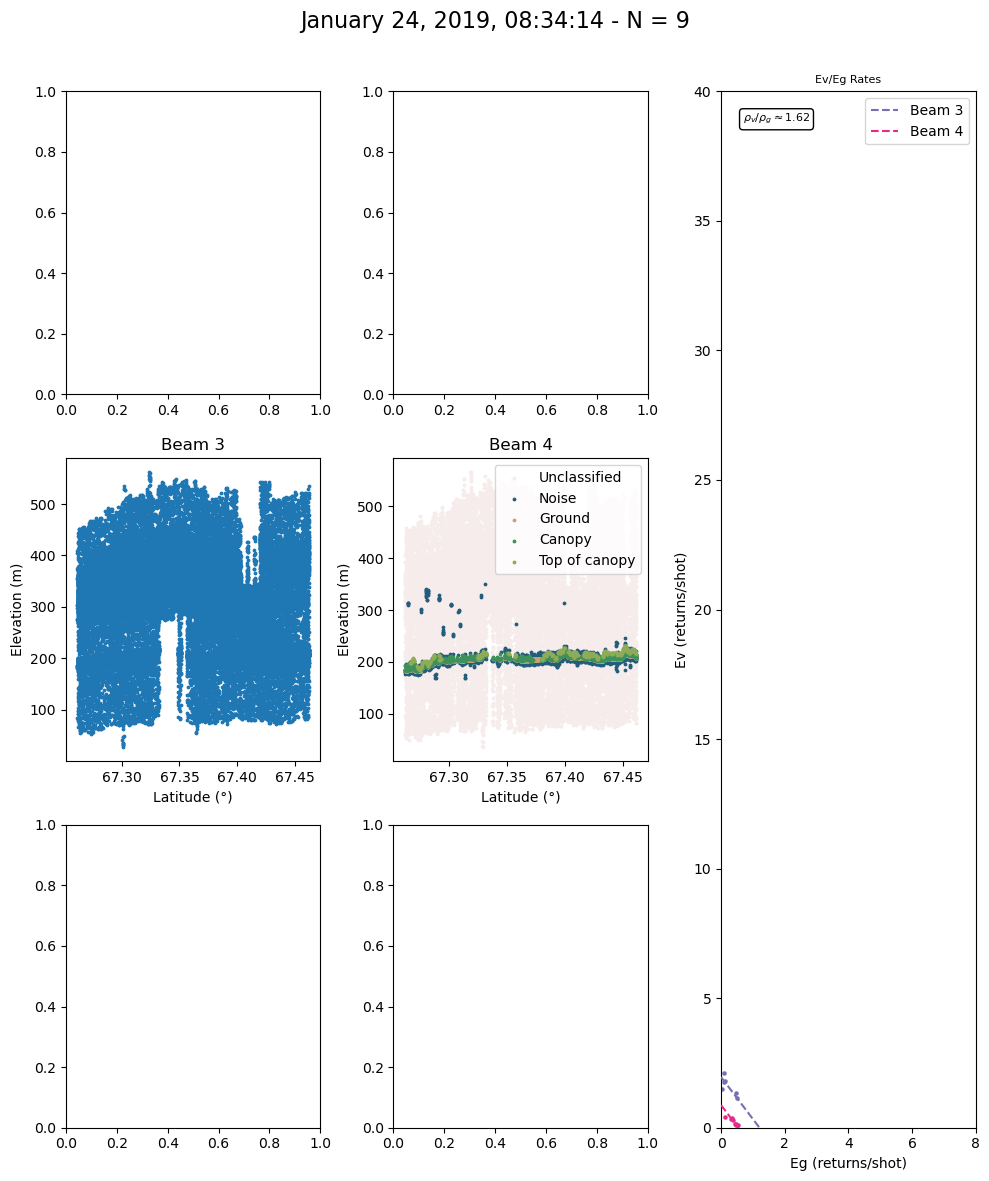

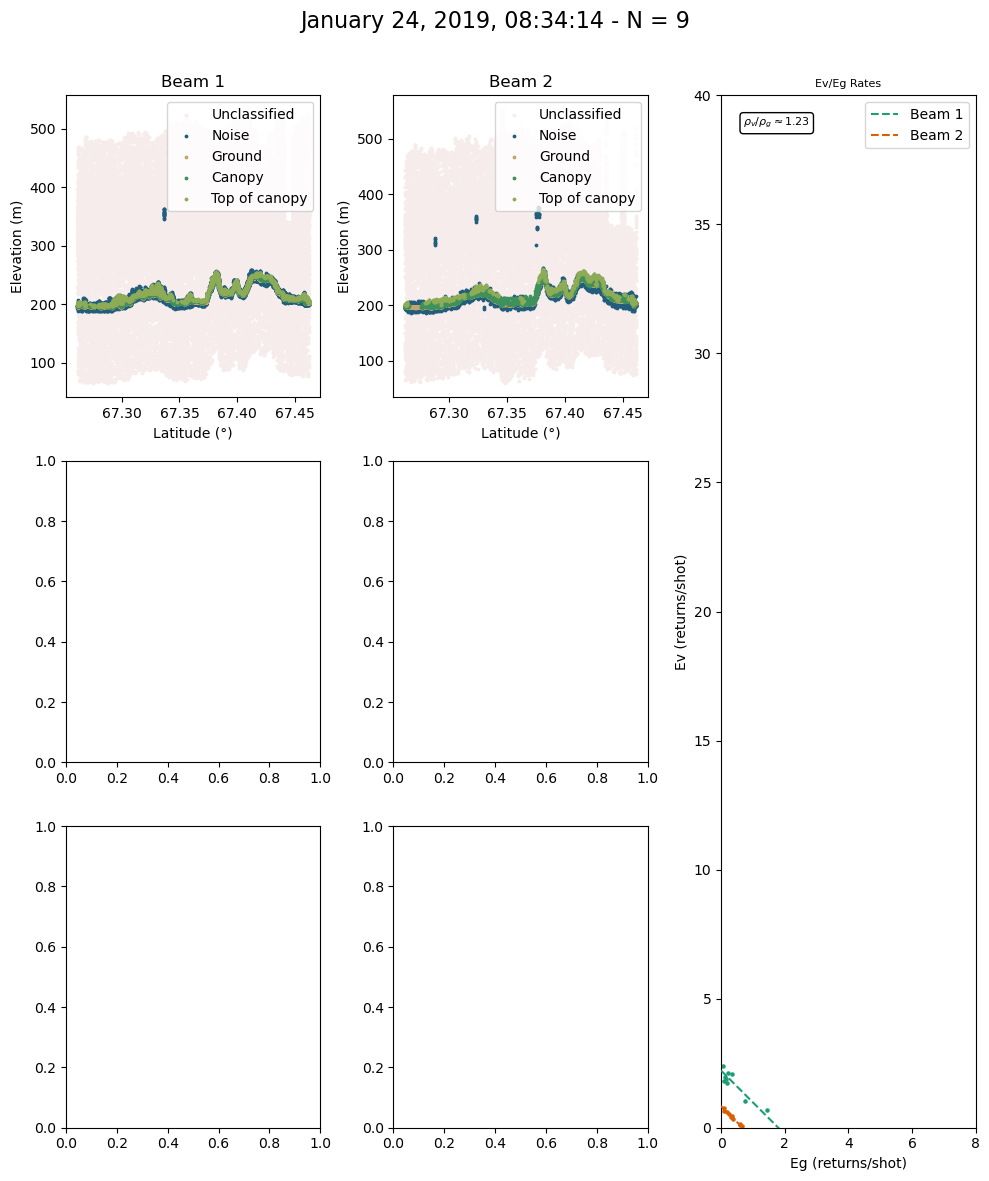

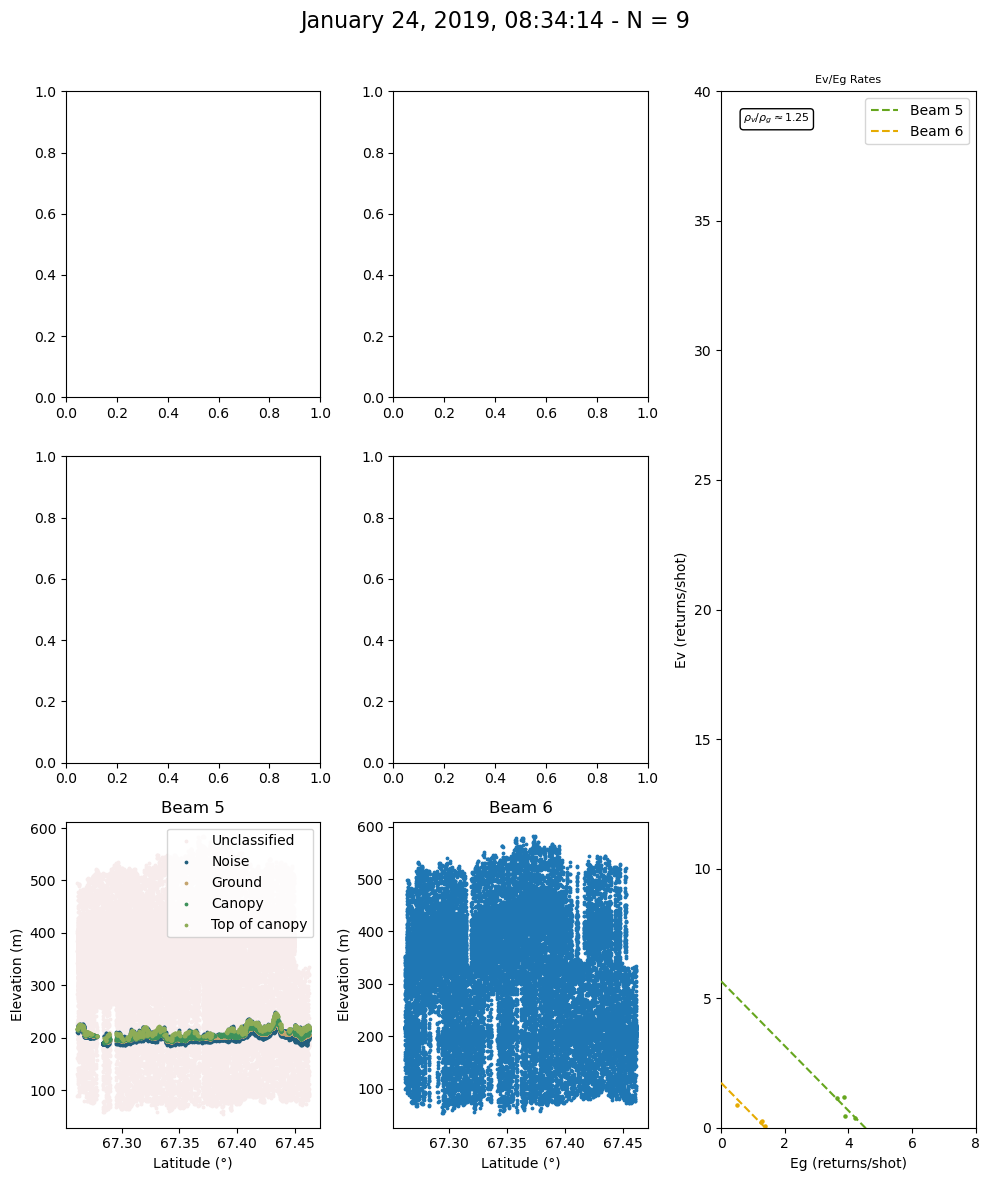

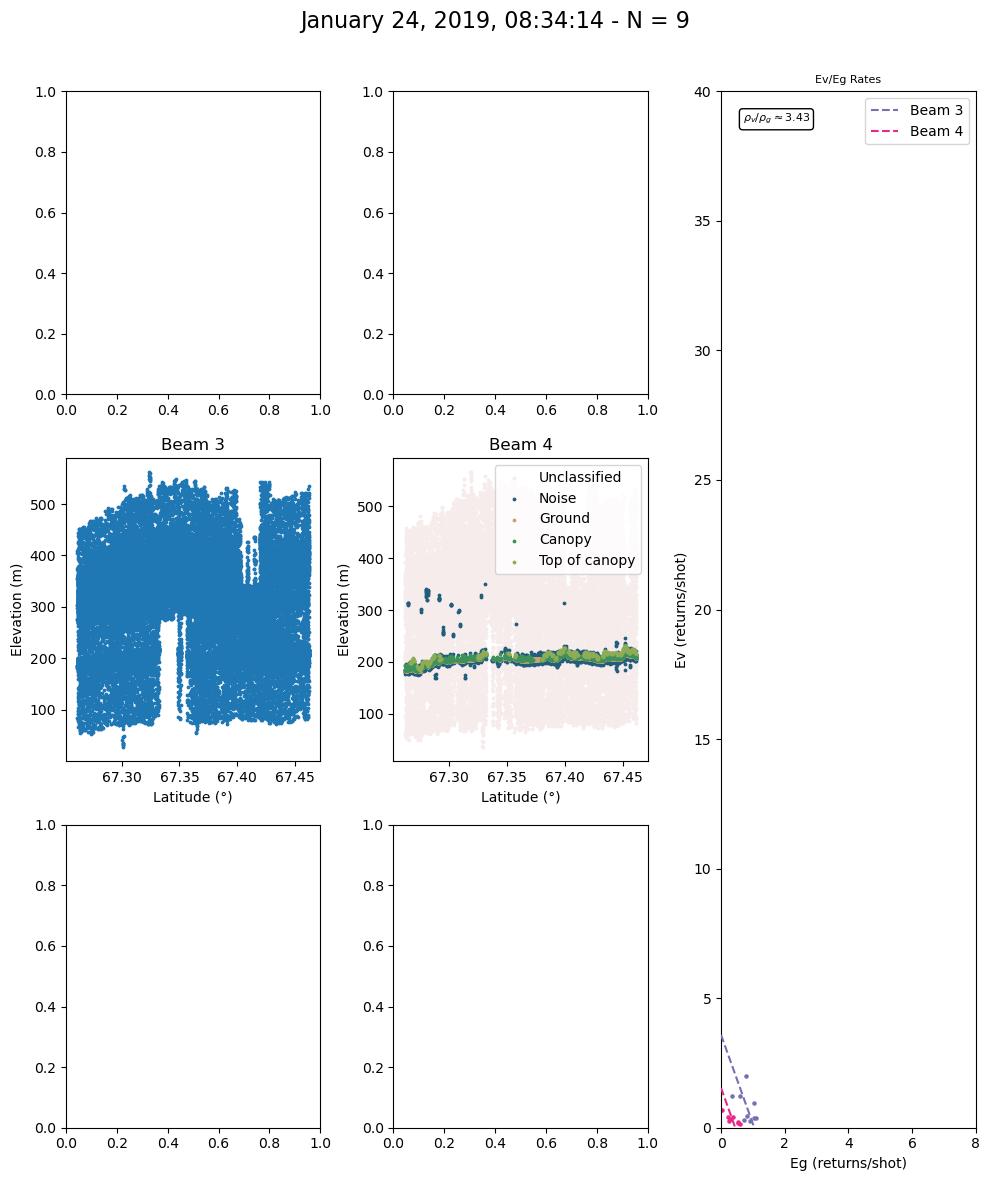

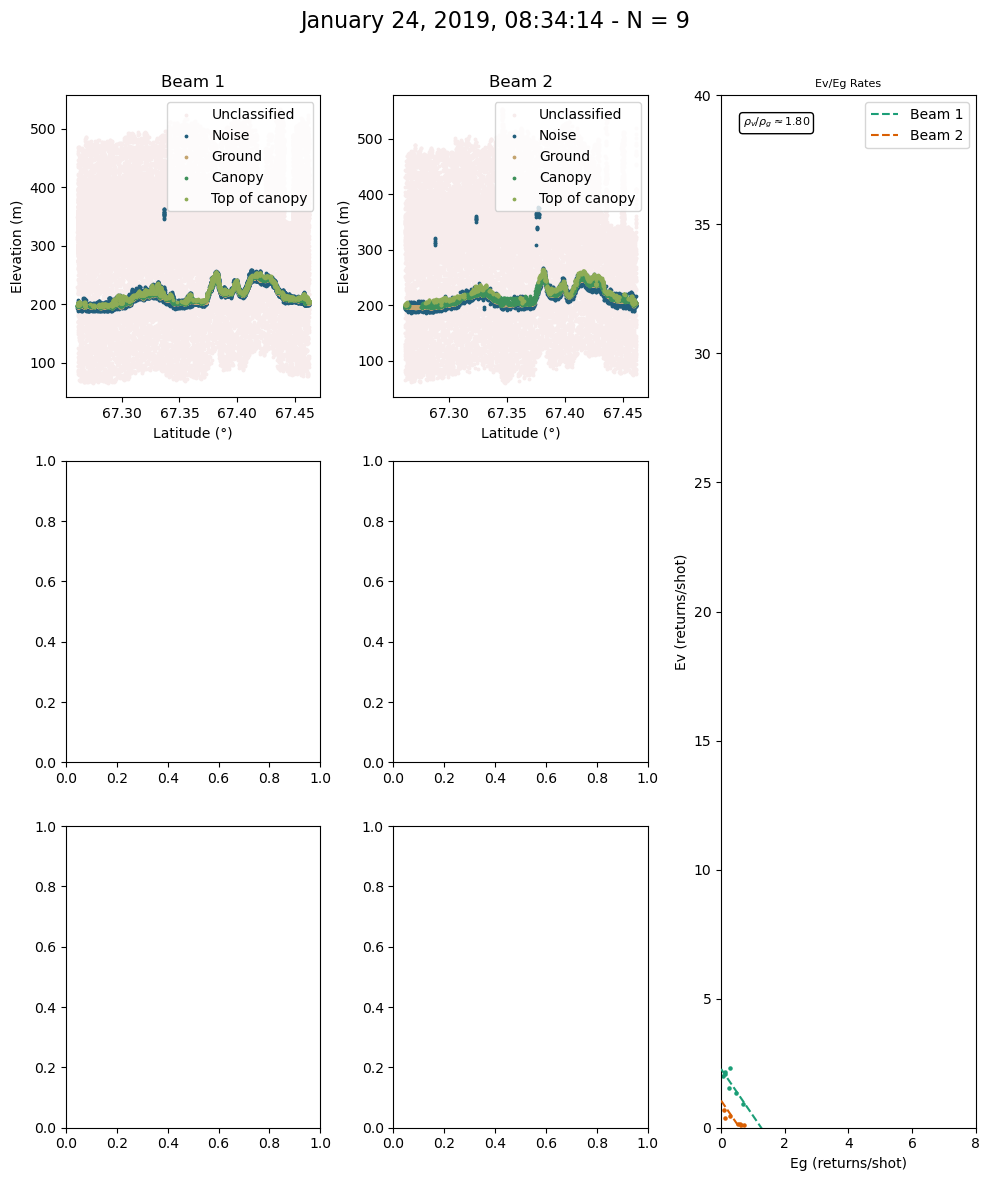

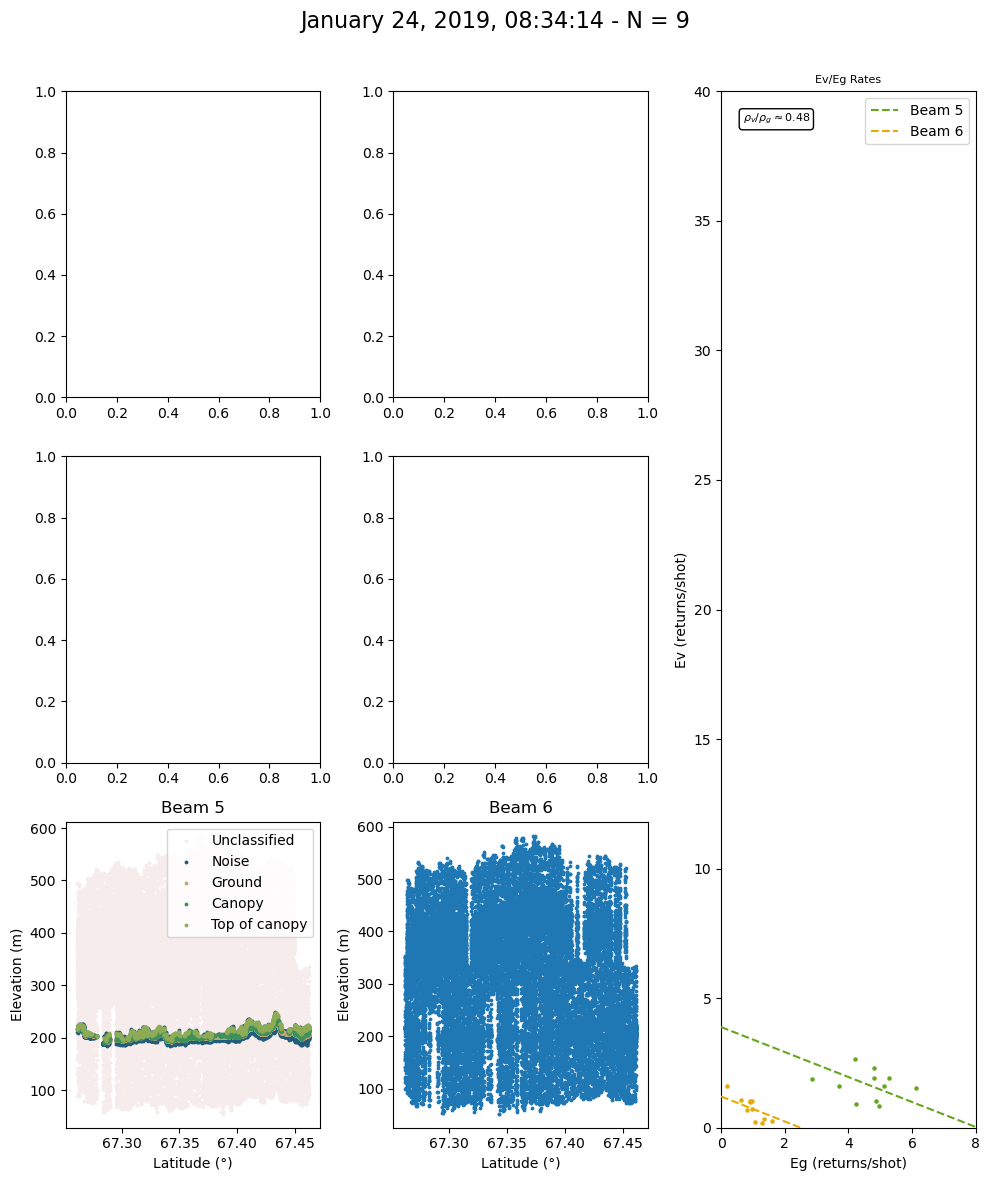

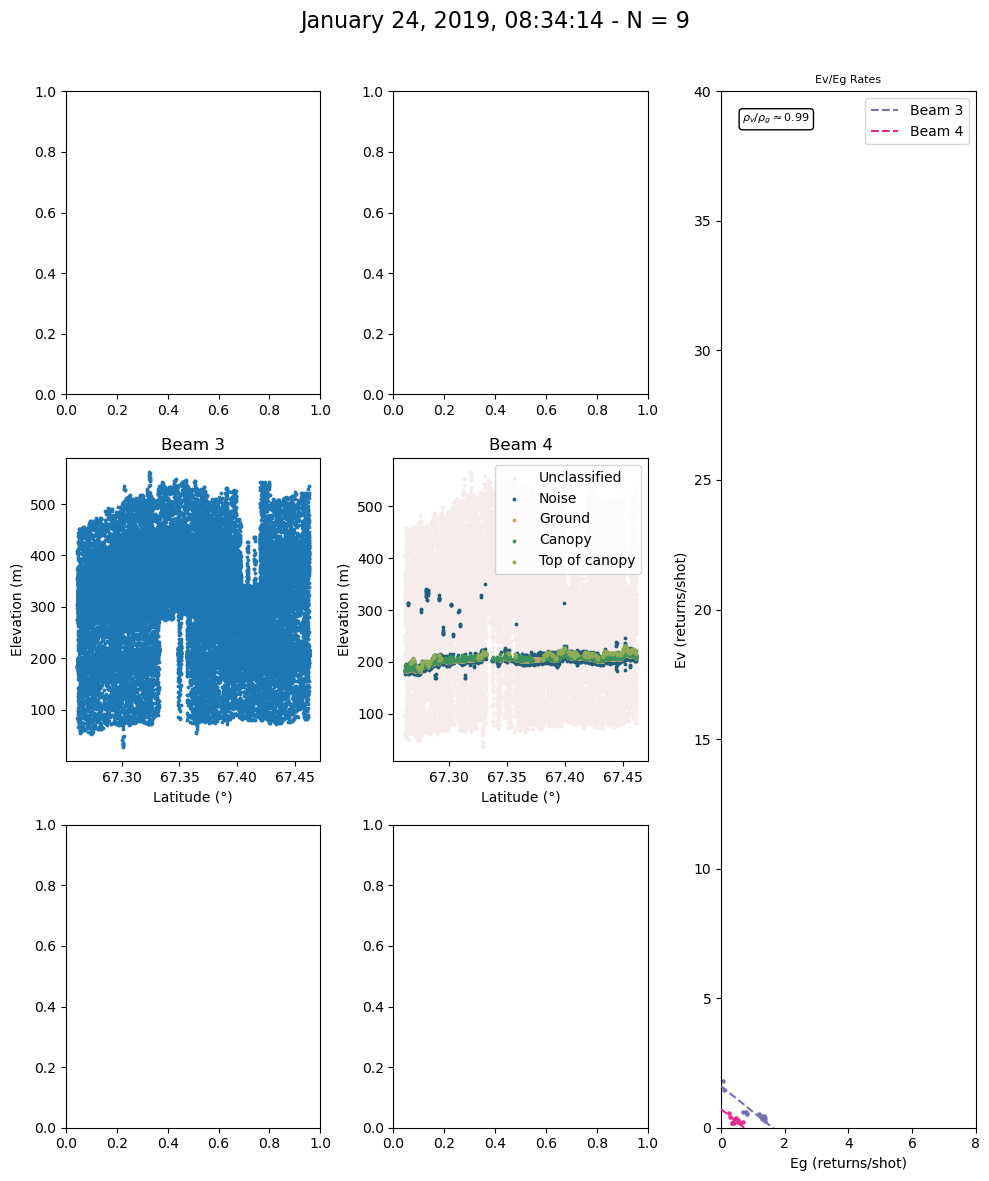

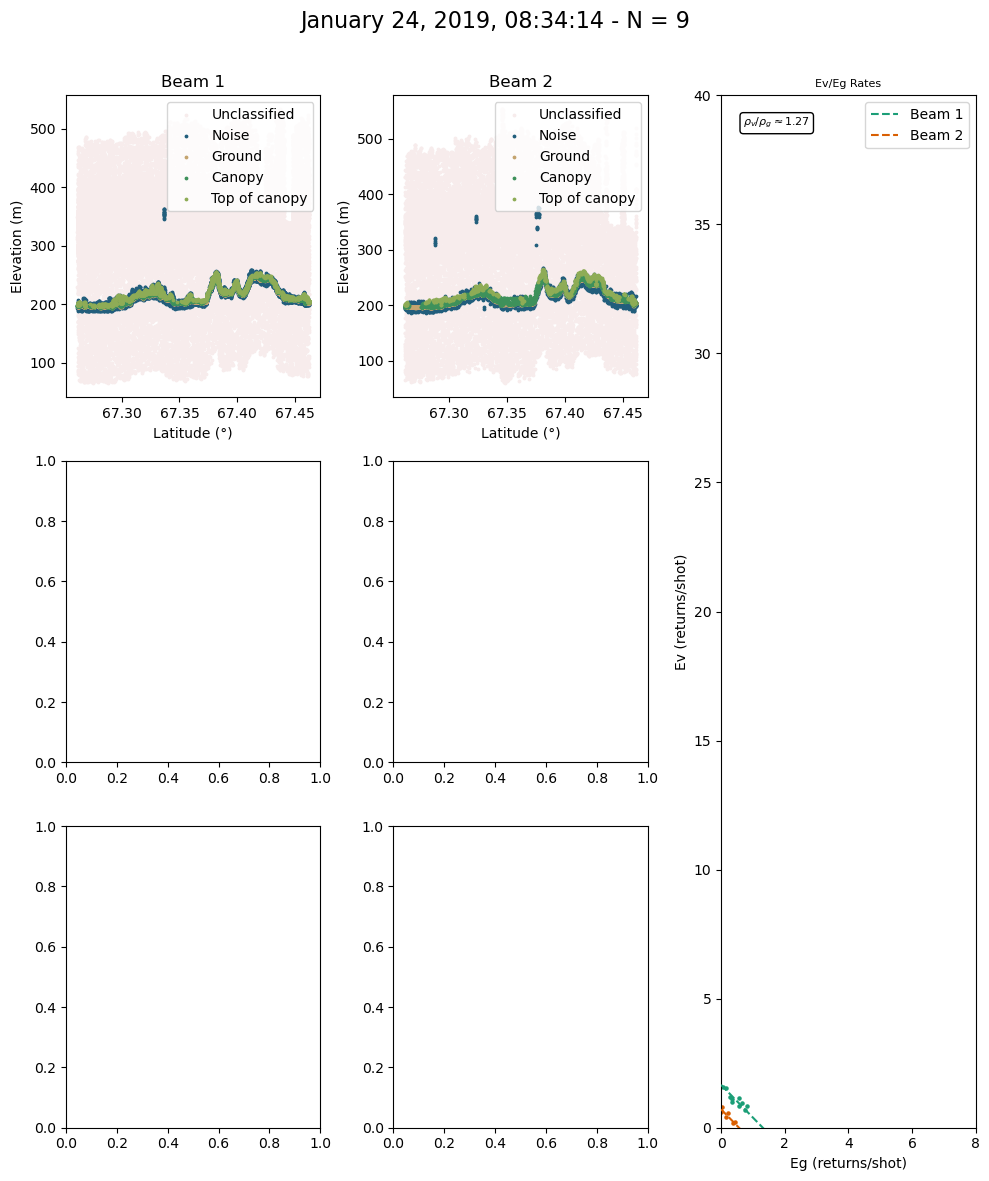

            camera        date          pvpg  y_strong    y_weak  x_strong  \
0   sodankyla_full  24/01/2019 -1.098885e+00  0.976341  0.406716  0.888484   
1   sodankyla_full  24/01/2019 -1.161092e+00  0.885990       NaN  0.763066   
2   sodankyla_full  24/01/2019 -1.047503e+00  1.484033  0.490757  1.416734   
3   sodankyla_full  24/01/2019 -1.045510e+00  0.758635  0.385565  0.725612   
4   sodankyla_full  24/01/2019 -2.000000e+00  1.637037       NaN  0.818518   
5   sodankyla_full  24/01/2019 -8.424006e-01  0.396375       NaN  0.470531   
6   sodankyla_full  24/01/2019 -1.244028e+00  0.776150  0.391625  0.623901   
7   sodankyla_full  24/01/2019 -1.530475e+00  1.335268  0.500580  0.872453   
8   sodankyla_full  24/01/2019 -1.290711e-01  0.192639       NaN  1.492505   
9   sodankyla_full  24/01/2019 -1.083150e+00  0.663639       NaN  0.612693   
10  sodankyla_full  24/01/2019 -1.206037e+00  1.126700  0.450866  0.934216   
11  sodankyla_full  24/01/2019 -1.555307e+00  1.071187  0.500352

In [5]:
# from scripts.FSC_dataframe_phoreal import *
from scripts.parallel_blocks import *

# from scripts.parallel_phoreal import *
# from scripts.parallel_phoreal import *
# from scripts.FSC_dataframe import *
# from scripts.parallel_blocked import *

dirpath = '../data_store/data/sodankyla_full/'
# dirpath = '../data/sodankyla_full/'

all_ATL03, all_ATL08 = track_pairs(dirpath)
N = len(all_ATL03)

coords = (26.634154, 67.361833)

for i in range(9,10):
    data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=.1,height=.1,\
                         graph_detail=2, loss='linear',file_index=i, keep_flagged=1, opsys='bad',f_scale=.1, altitude=185, small_box=0.01)#, small_box=0.01)
    print(data)
    # print(flatten_structure(data))